In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import importlib

import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.datasets import load_breast_cancer


import charts as charts
import evaluations as evals

# Ignore warnings as they make notebook difficult to read (they are mostly useless)
import warnings

warnings.filterwarnings("ignore")

In [2]:
SEED = 42
np.random.seed(SEED)
CV = 5
F1_AVERAGING = 'binary'
F1_SCORE = f'f1_{F1_AVERAGING}'
BREAST_CANCER = f'{os.getcwd()}/figures/breast-cancer'
STEP_1_PATH = f"{BREAST_CANCER}/step-1"
STEP_2_PATH = f"{BREAST_CANCER}/step-2"
STEP_3_PATH = f"{BREAST_CANCER}/step-3"
STEP_4_PATH = f"{BREAST_CANCER}/step-4"
STEP_5_PATH = f"{BREAST_CANCER}/step-5"

charts.setup_plots()

In [3]:
BREAST_CANCER

'/Users/pavponn/gatech/machine-learning/assignment-3/figures/breast-cancer'

In [4]:
dataset = load_breast_cancer(as_frame=True)
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)



In [5]:
scaler = StandardScaler()
X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Combine the normalized data
X_normalized = pd.concat((X_train_normalized, X_test_normalized), axis=0)


In [6]:
X_train = X_train_normalized
X_test = X_test_normalized

In [7]:
importlib.reload(charts)
# avoid creating ths plot again, as it is saved and recreating takes a loooot of time
# charts.pair_plot(X_train, f"{BREAST_CANCER}/pair_plot.png")

<module 'charts' from '/Users/pavponn/gatech/machine-learning/assignment-3/charts.py'>

# Step 1 (Clustering algorithms)

## K-Means

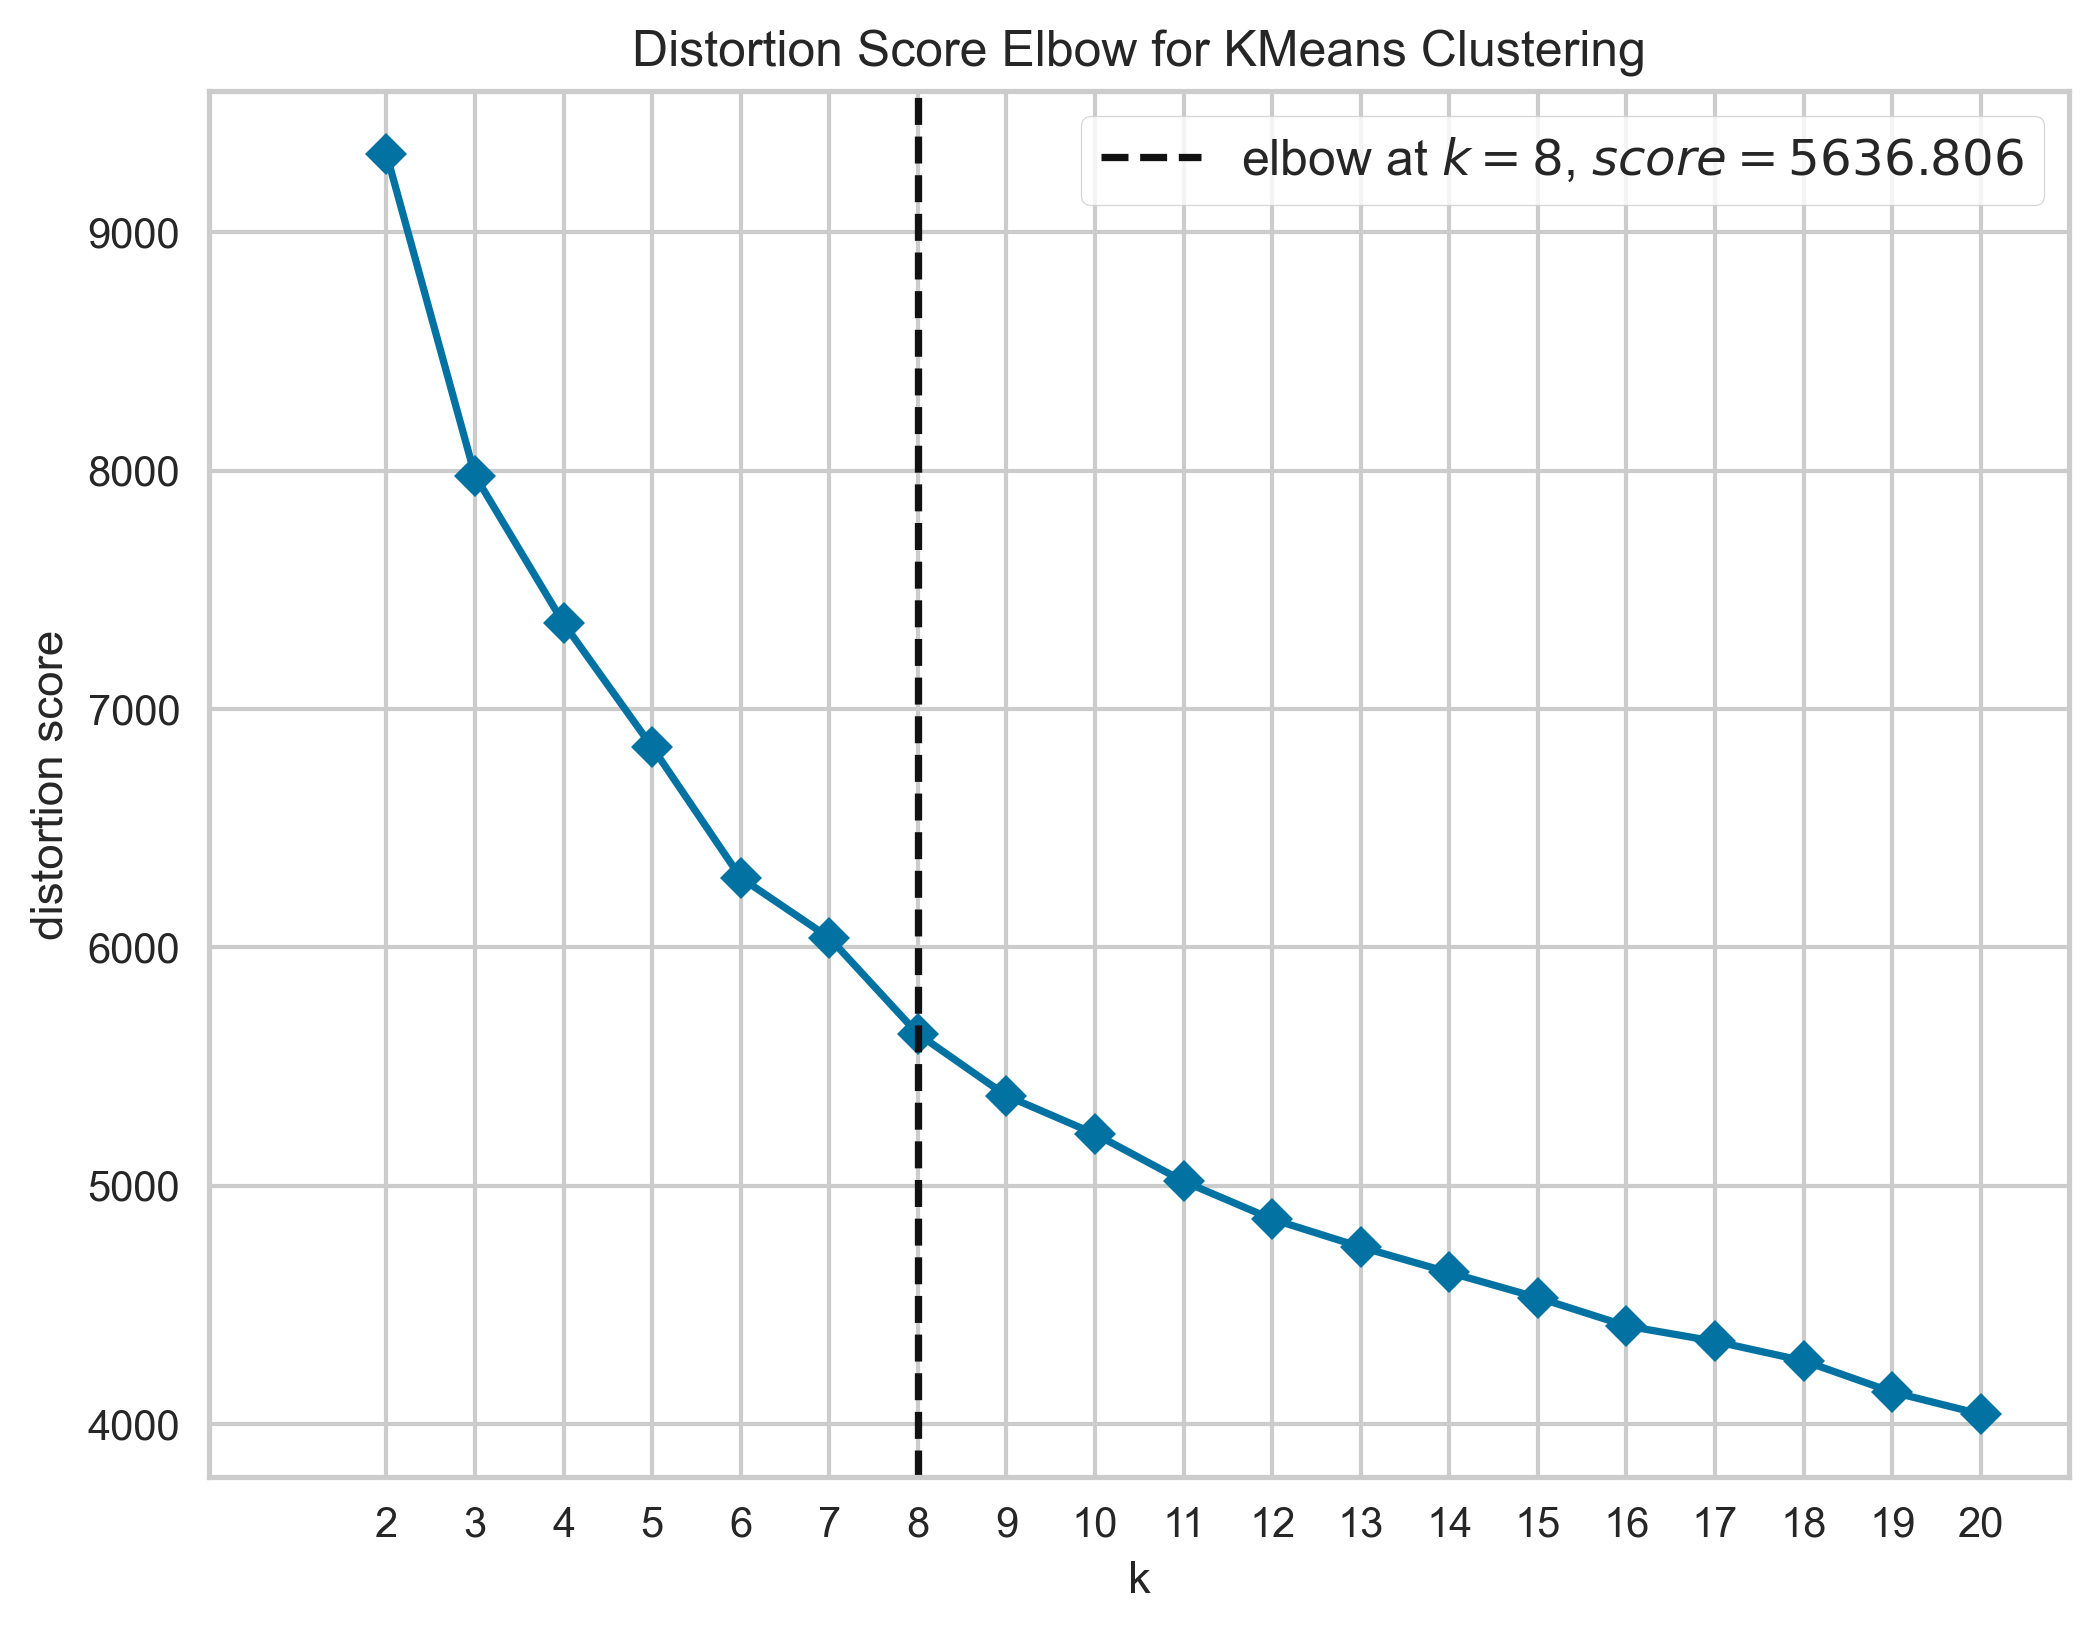

In [8]:
importlib.reload(charts)
# Using distortion/inertia
charts.k_means_visualize(X_train,
                         output_path=f"{STEP_1_PATH}/k_means_distortion.png",
                         seed=SEED,
                         metric='distortion',
                         locate_elbow=True)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


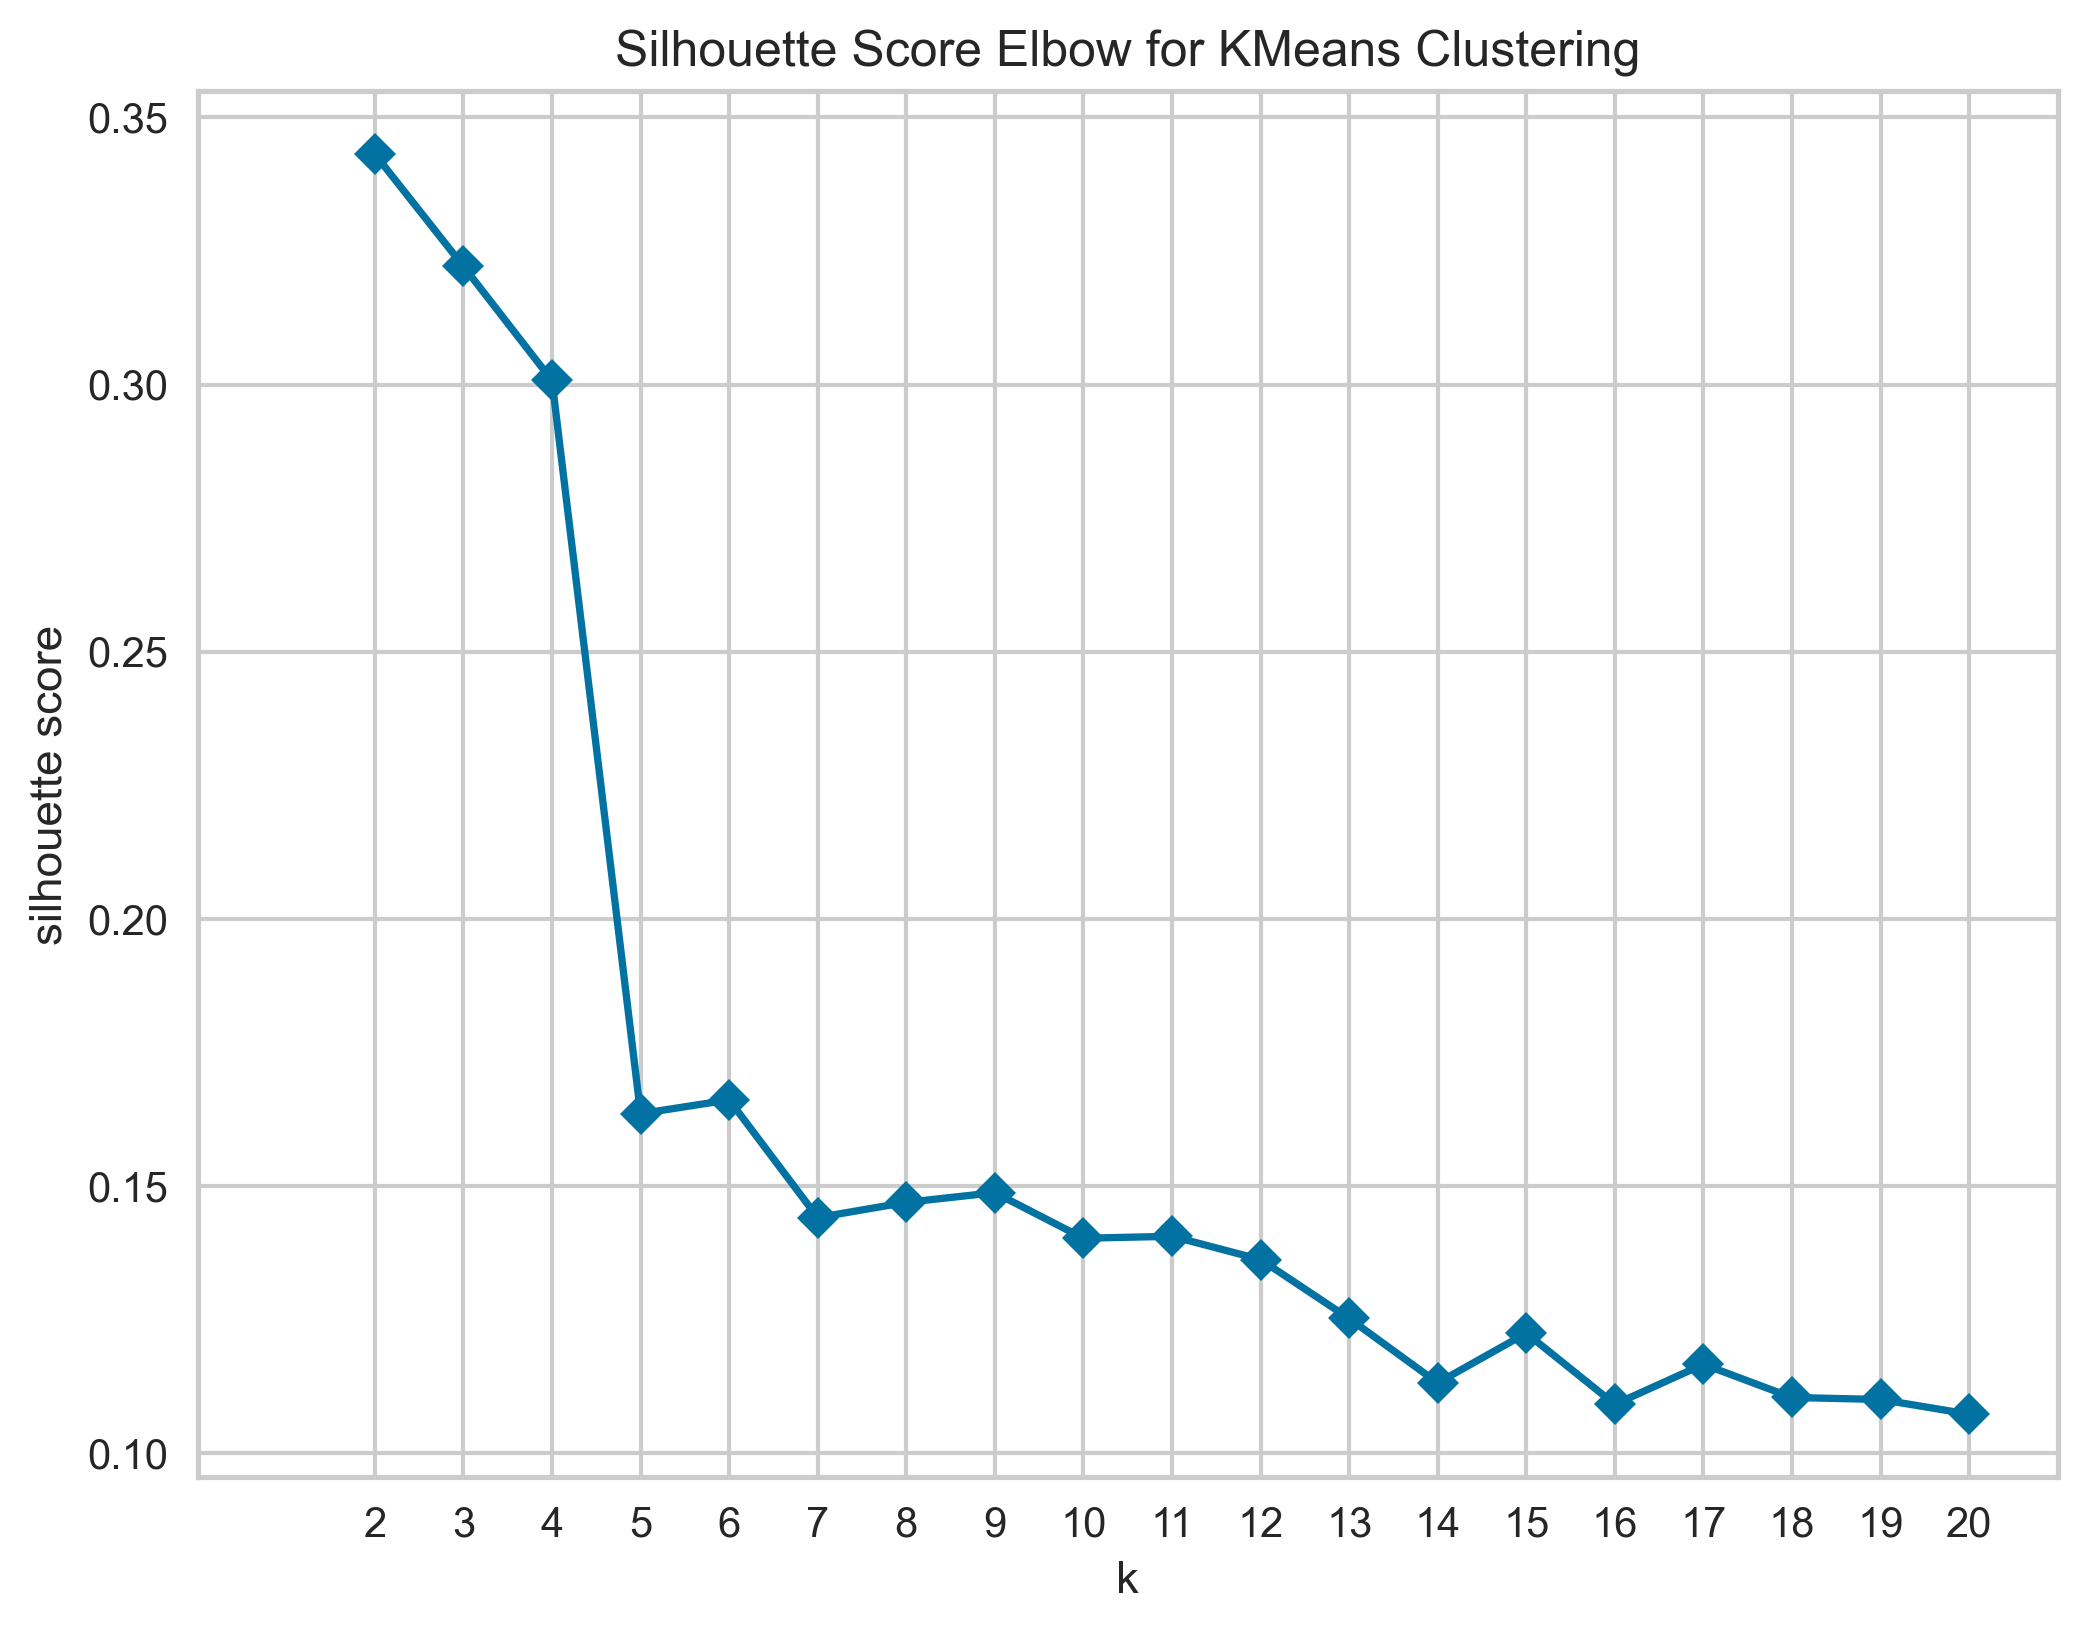

In [9]:
charts.k_means_visualize(X_train,
                         output_path=f"{STEP_1_PATH}/k_means_silhouette.png",
                         seed=SEED,
                         metric='silhouette',
                         locate_elbow=False)

## Expectation Maximization

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


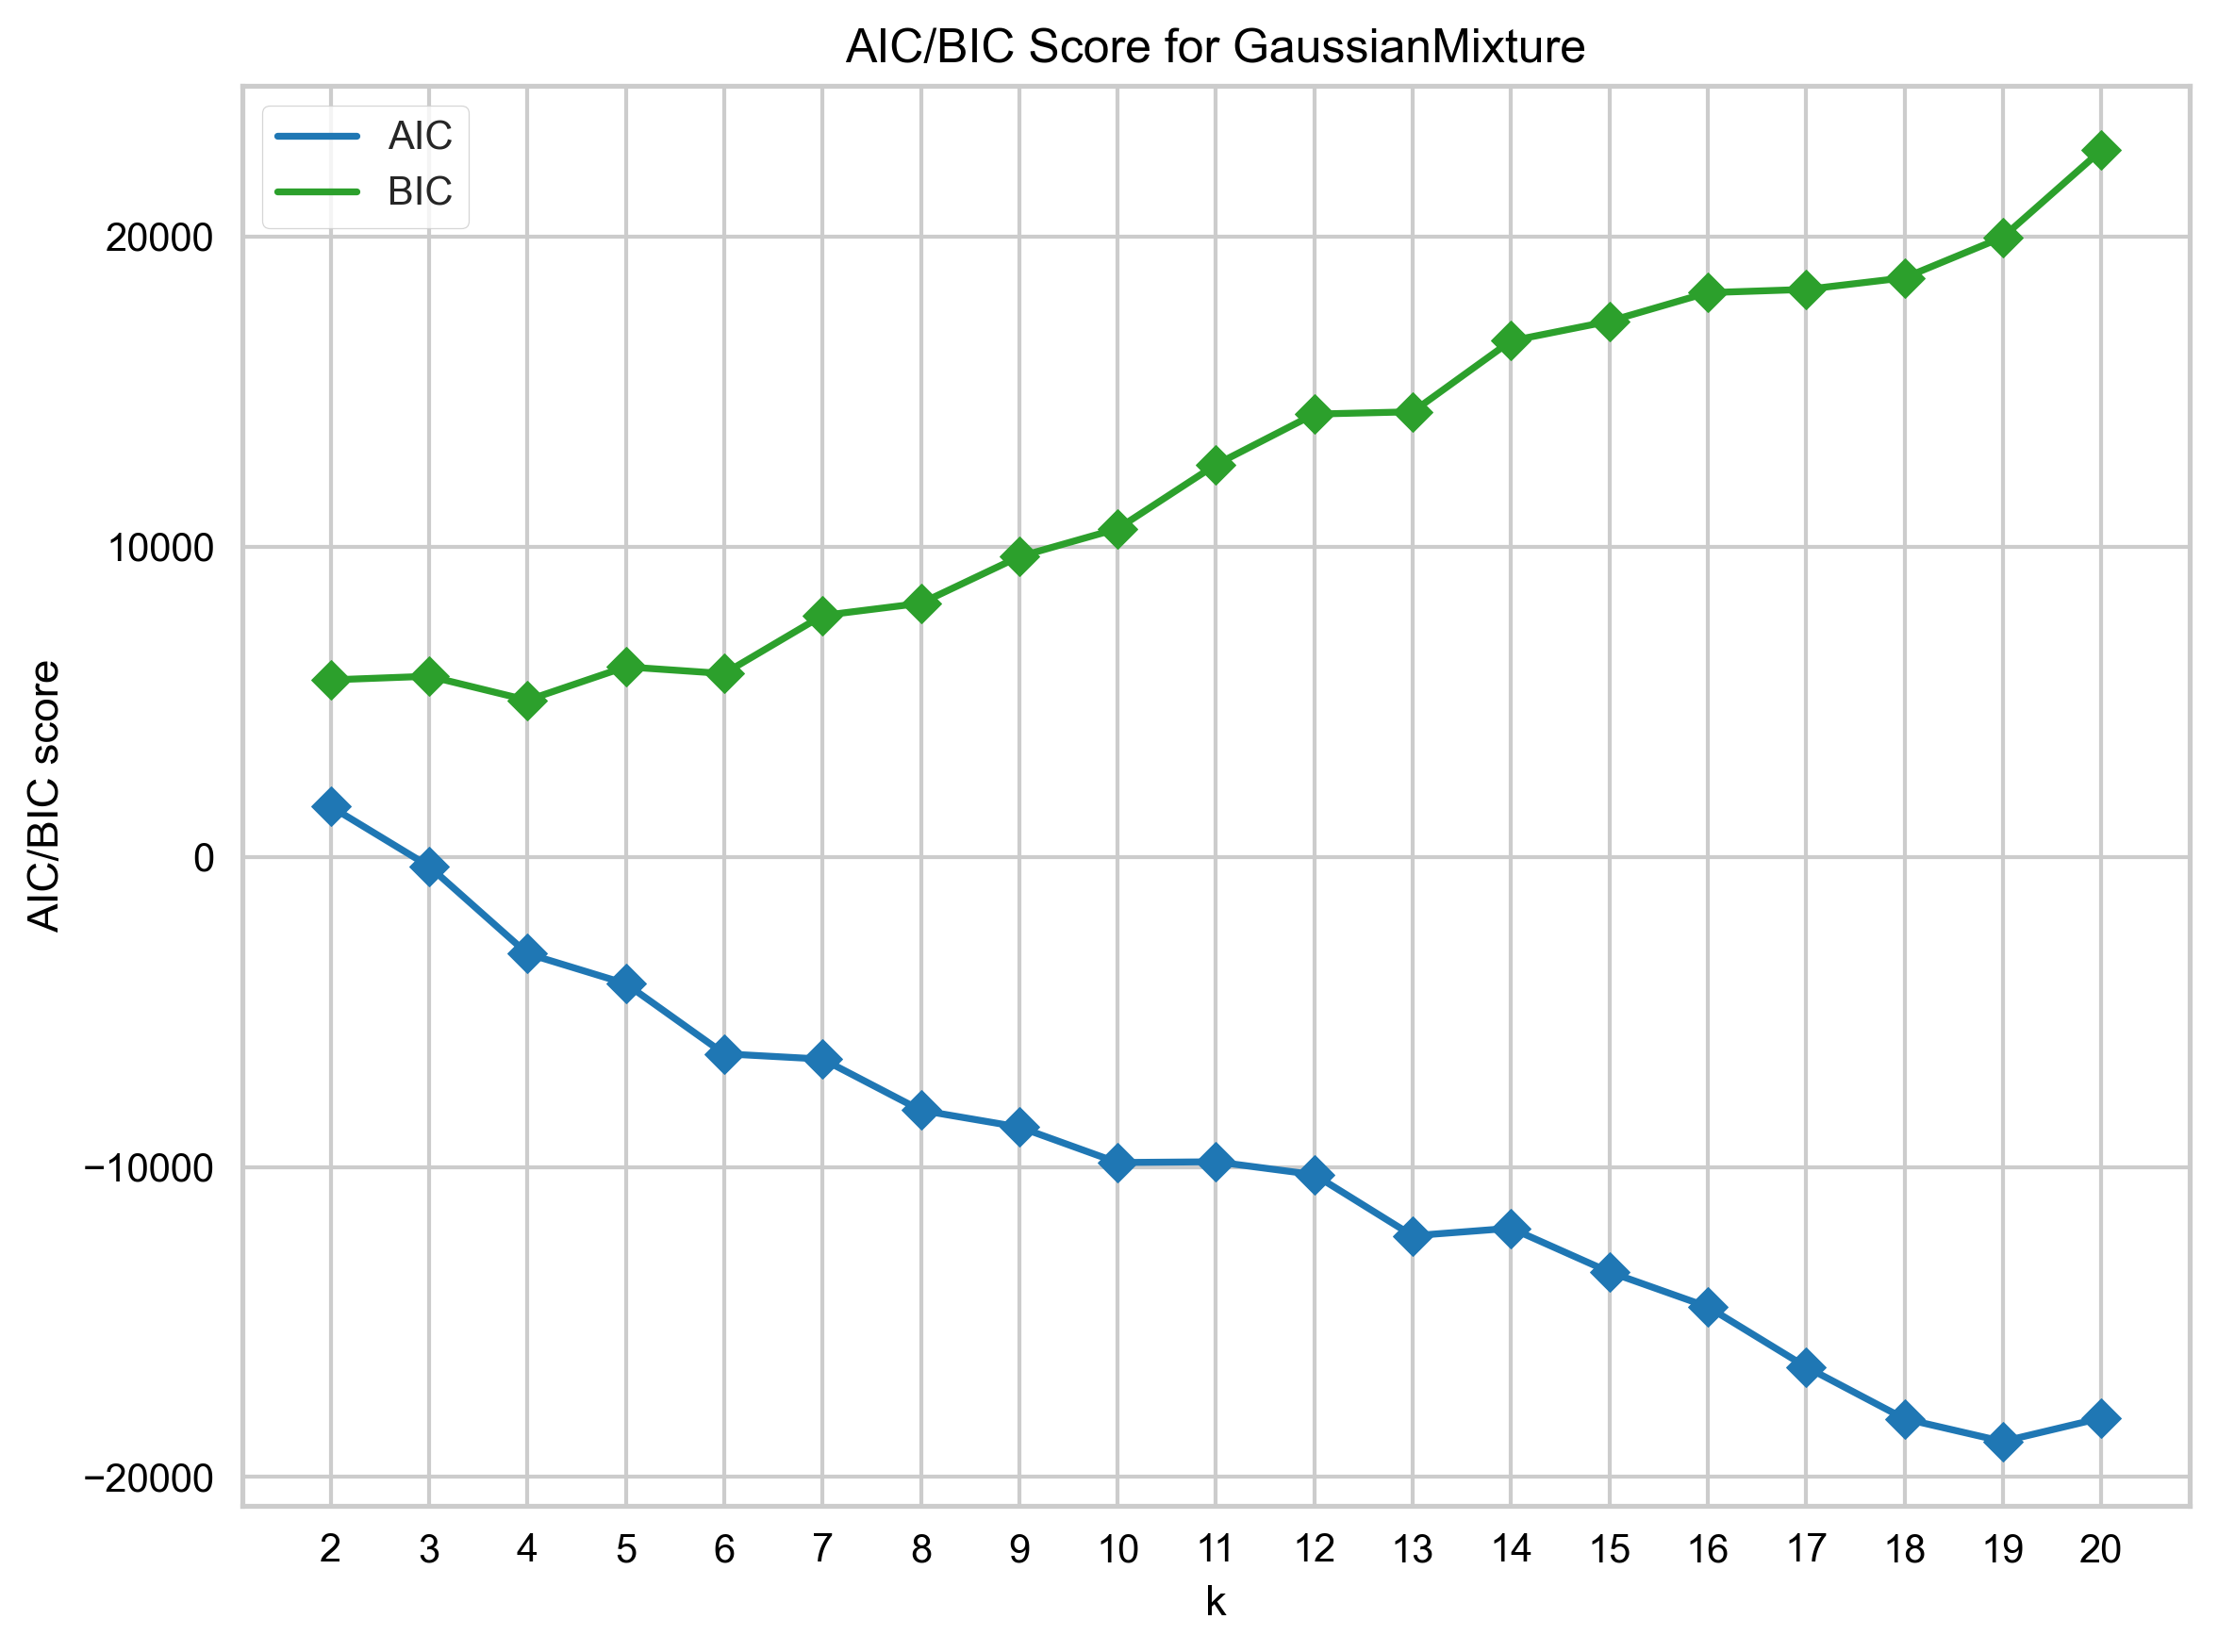

In [10]:
importlib.reload(charts)
charts.gmm_visualize_aic_bic(
    X_data=X_train,
    output_path=f"{STEP_1_PATH}/em_aic_bic.png",
    seed=SEED,
    k_max=20,
    n_init=10,
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


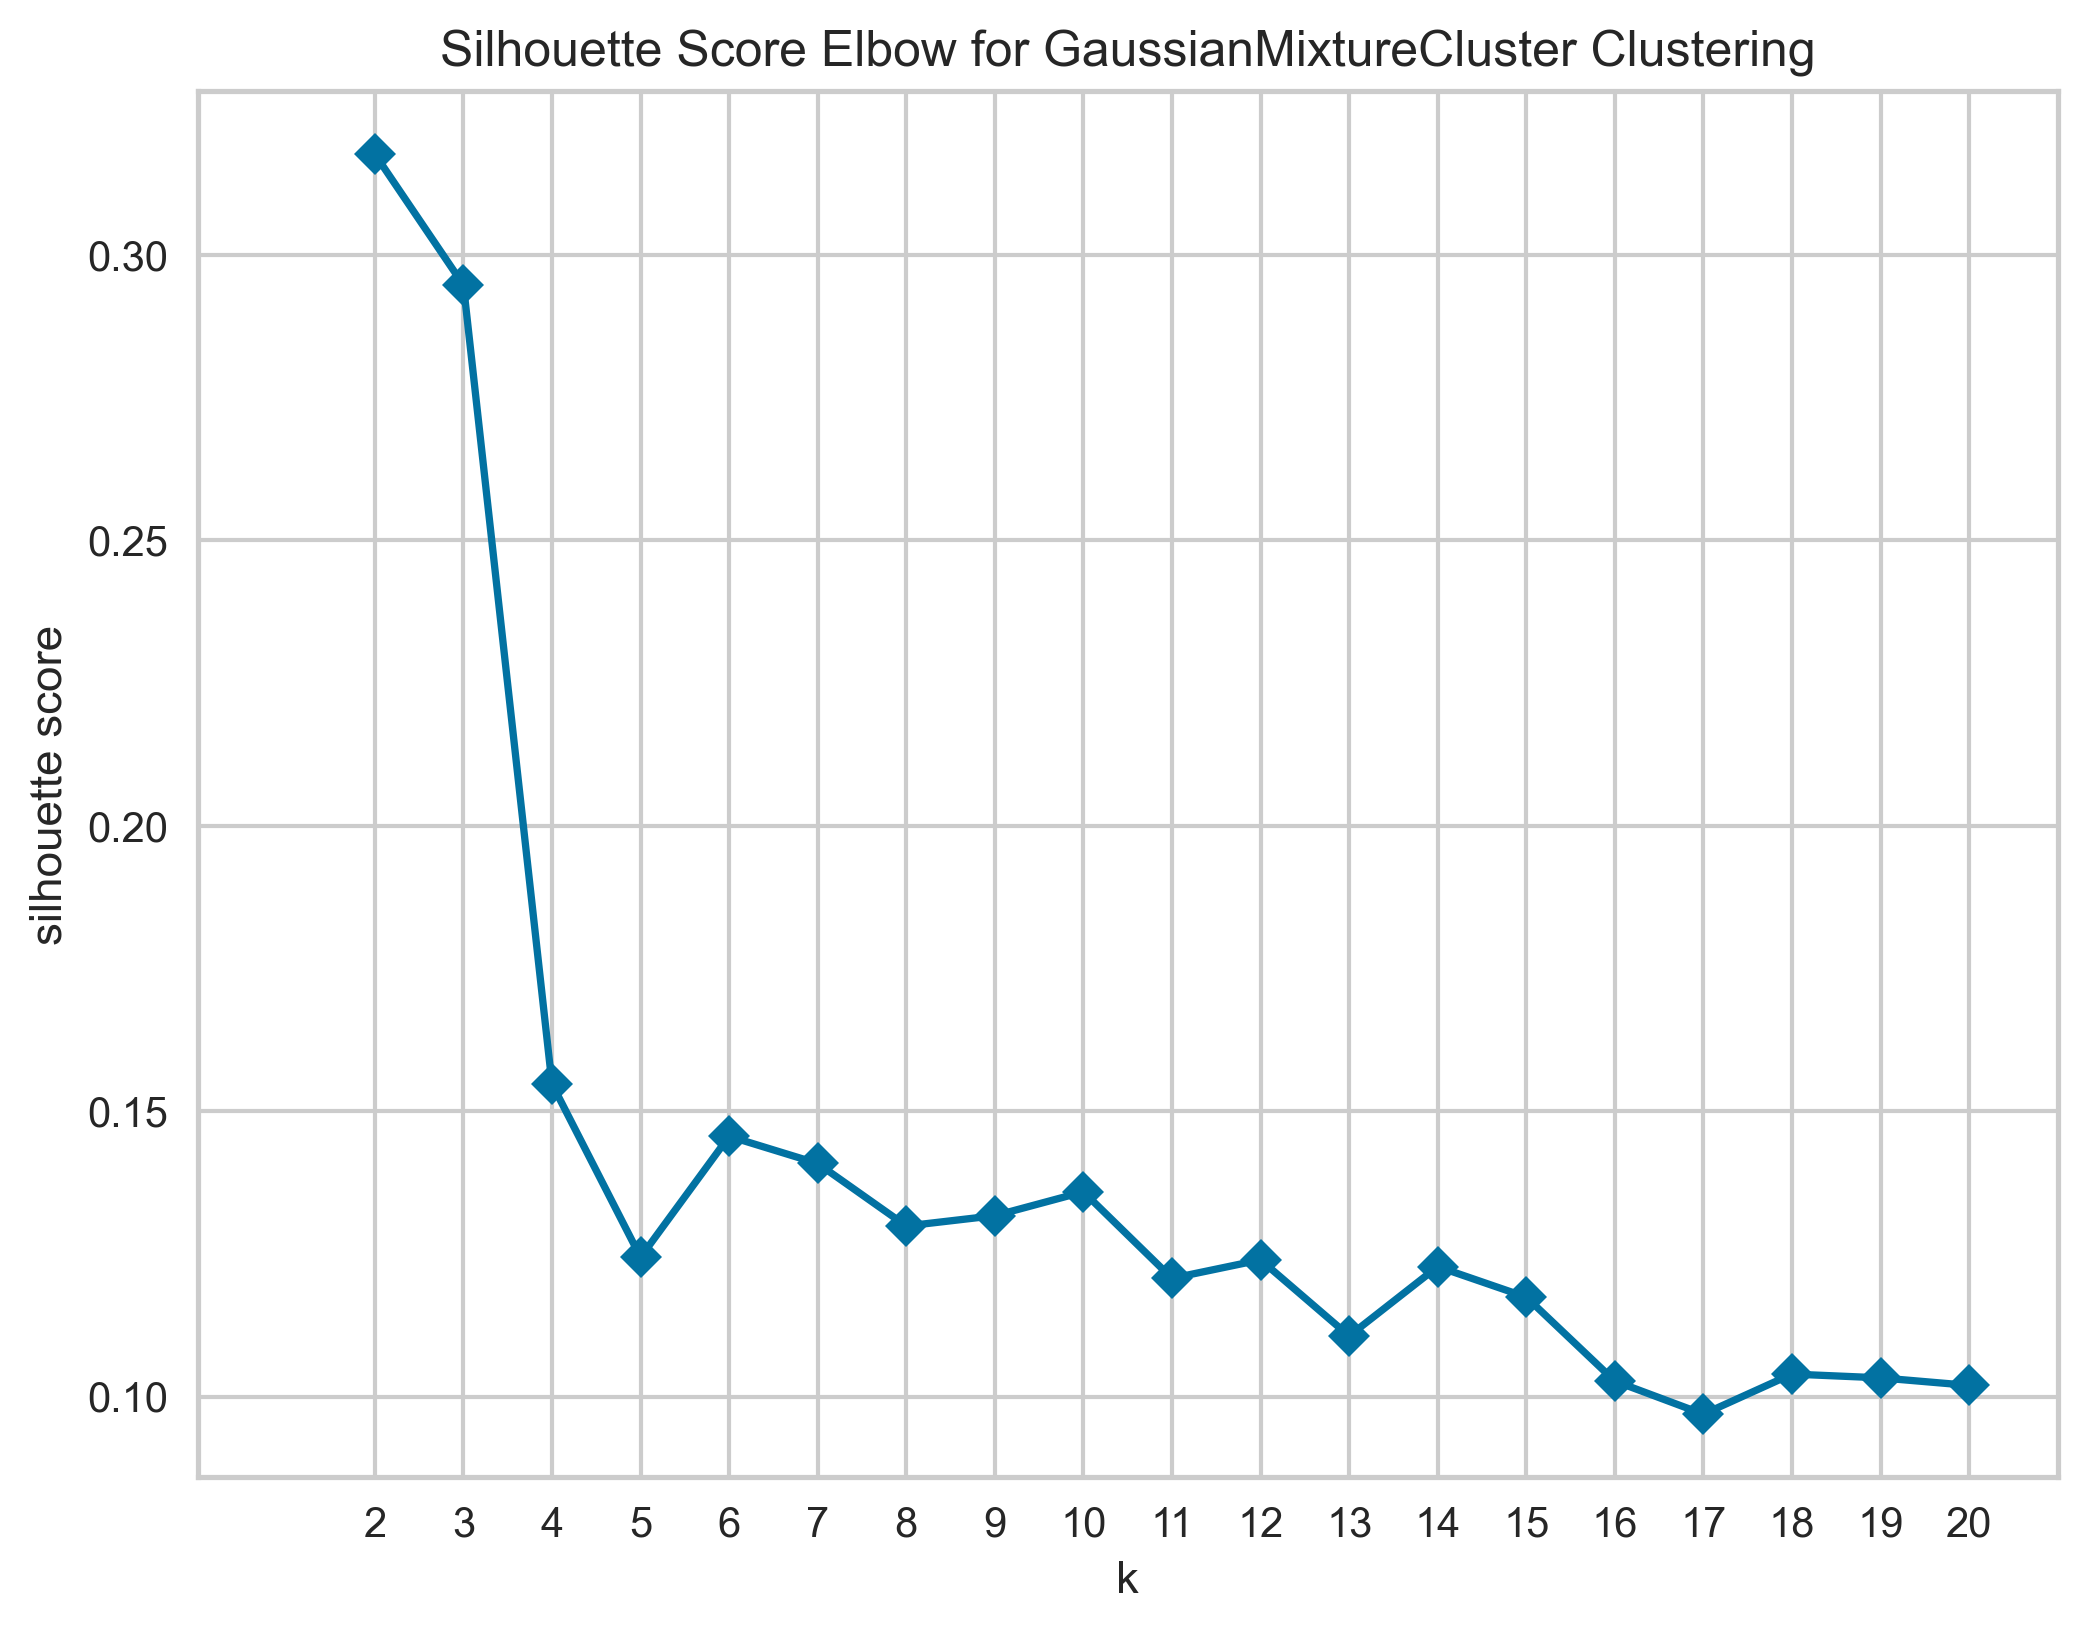

In [11]:
importlib.reload(charts)
charts.gmm_visualize(
    X_data=X_train,
    output_path=f"{STEP_1_PATH}/em_silhouette.png",
    metric='silhouette',
    seed=SEED,
    k_max=20,
    n_init=10,
    locate_elbow=False,
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


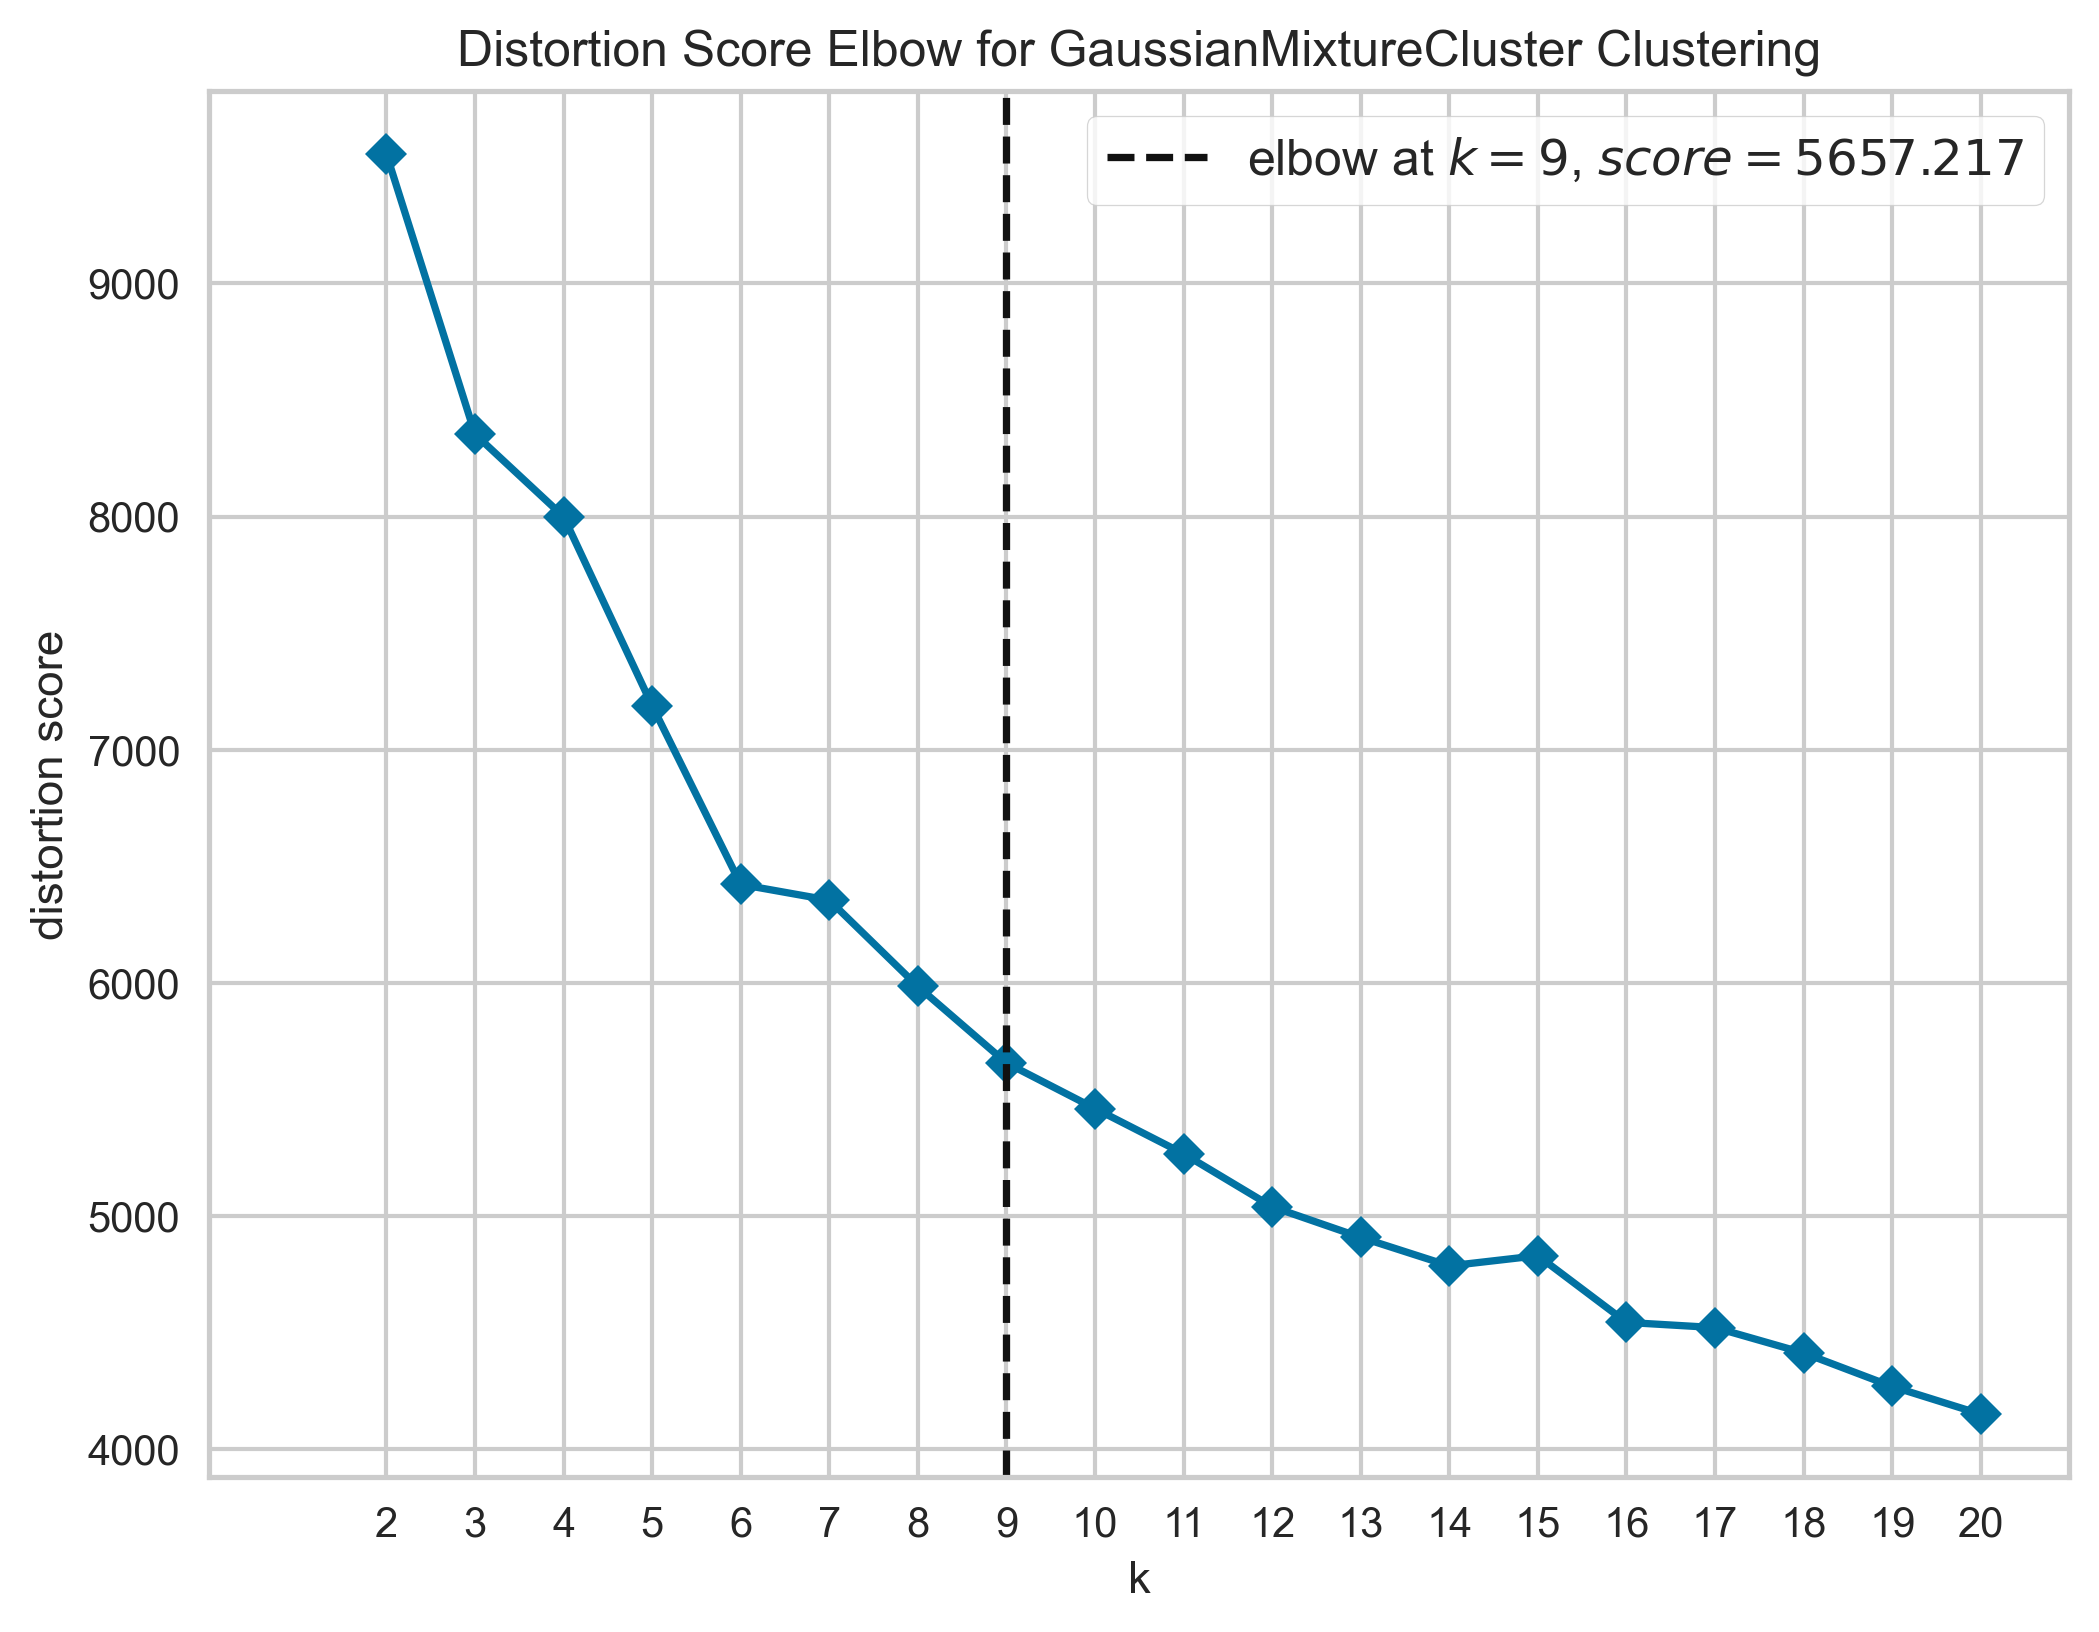

In [12]:
importlib.reload(charts)
charts.gmm_visualize(
    X_data=X_train,
    output_path=f"{STEP_1_PATH}/em_distortion_do_not_use.png",
    metric='distortion',
    seed=SEED,
    k_max=20,
    n_init=10,
)

## Evaluation

In [13]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

importlib.reload(evals)

#  evaluation
evals.evaluate_models(
    models=[
        ('KMeans (k=7)', KMeans(random_state=SEED, n_clusters=8)),
        ('KMeans (k=2)', KMeans(random_state=SEED, n_clusters=2)),
        ('GMM (k=8)', GaussianMixture(random_state=SEED, n_components=4, n_init=10)),
        ('GMM (k=2)', GaussianMixture(random_state=SEED, n_components=2, n_init=10)),
    ],
    X_data=X_train,
    labels=y_train
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Rand Index  V Measure  Mutual Information  \
KMeans (k=7) 0    0.606061   0.369802            0.454612   
KMeans (k=2) 0    0.821368   0.516719            0.337273   
GMM (k=8)    0    0.697255   0.390991            0.358556   
GMM (k=2)    0    0.865169   0.610962            0.404090   

                Fowlkes-Mallows index  
KMeans (k=7) 0               0.514962  
KMeans (k=2) 0               0.834313  
GMM (k=8)    0               0.669846  
GMM (k=2)    0               0.872896

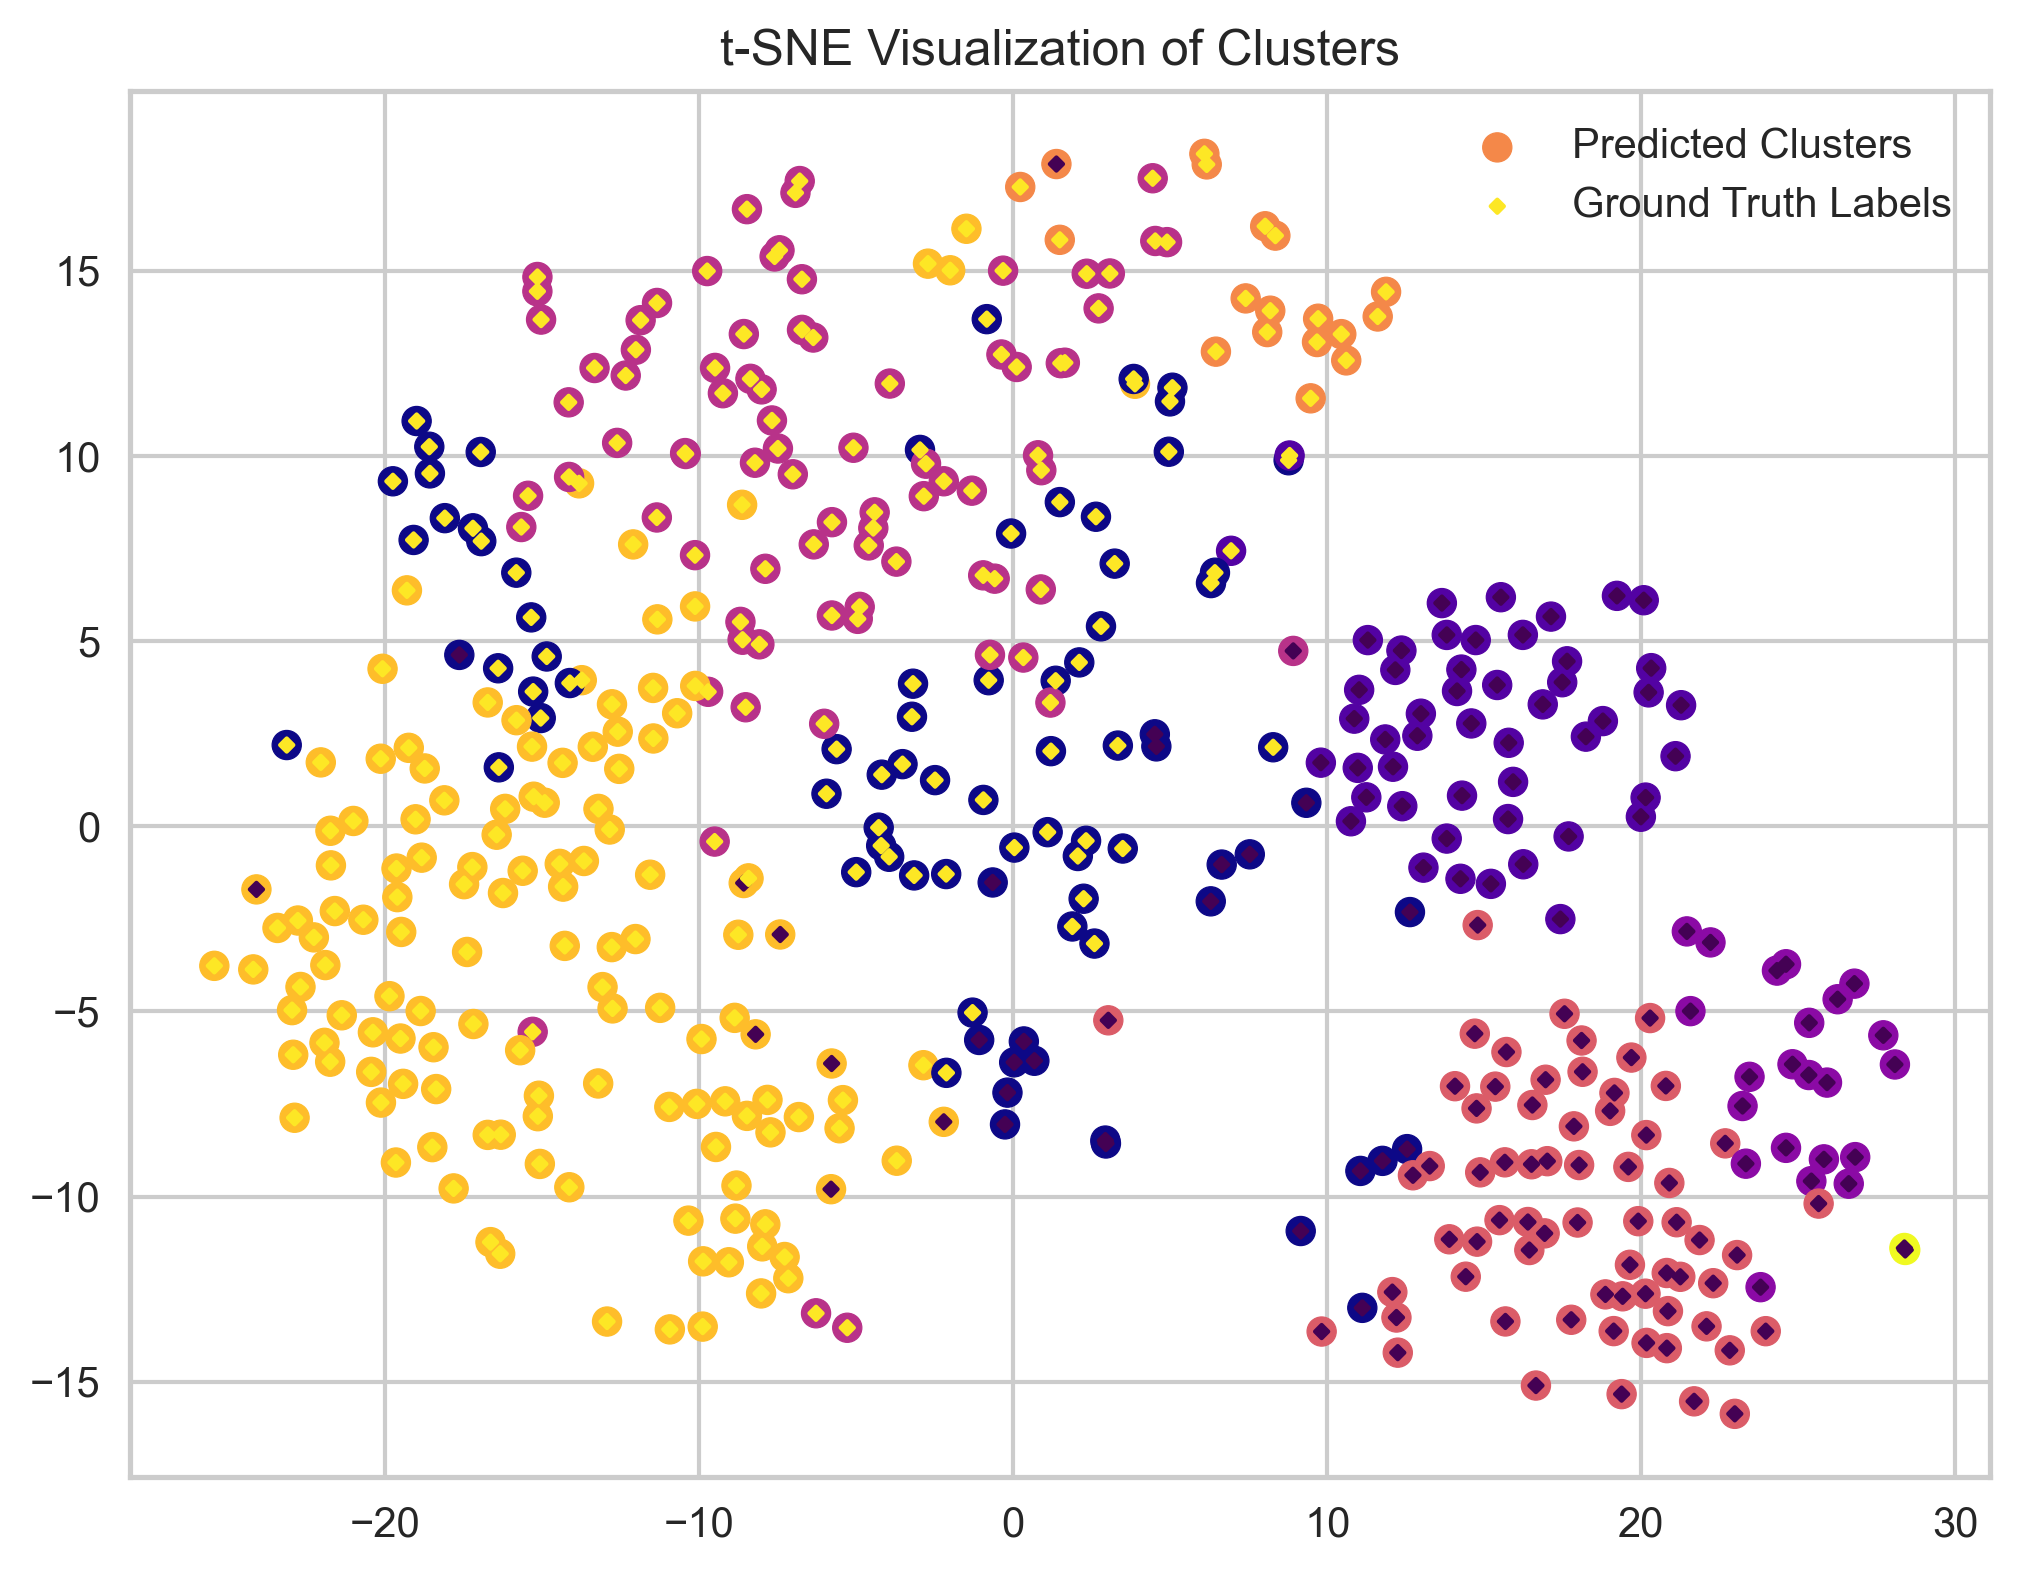

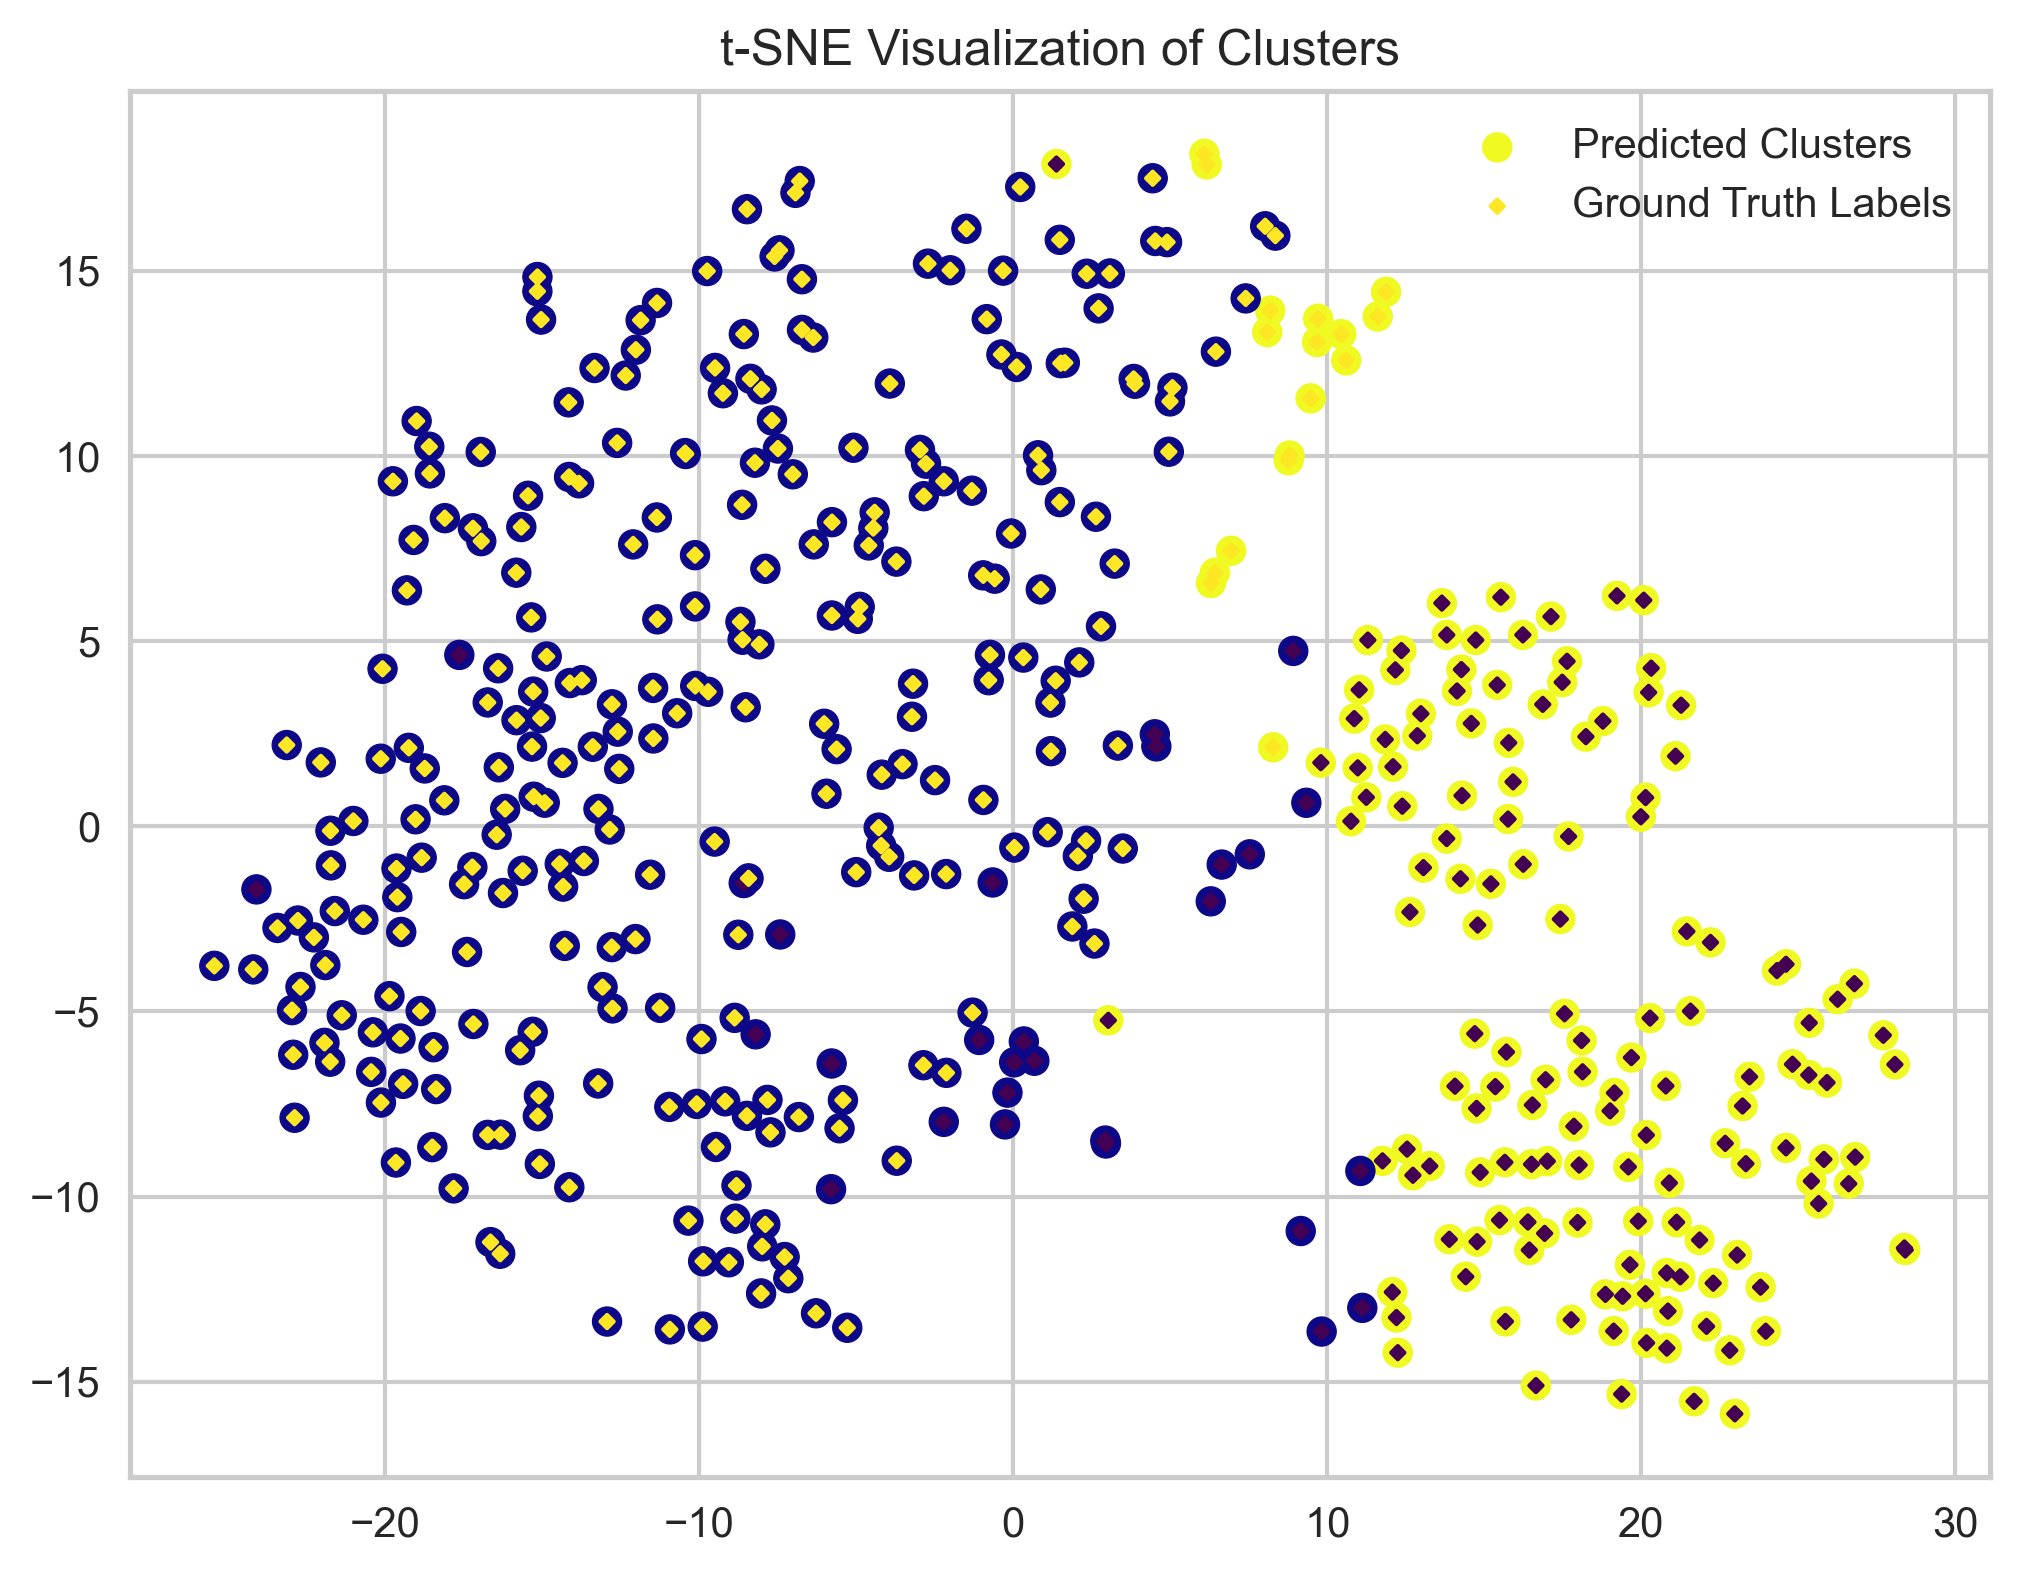

In [14]:
importlib.reload(charts)
charts.visualize_clusters_with_tsne(
    model=KMeans(random_state=SEED, n_clusters=8),
    X_data=X_train,
    labels=y_train,  # Otherwise it is so-so
    output_path=f"{STEP_1_PATH}/k_means_clusters_visualization_k_8.png",
    seed=SEED,
)
importlib.reload(charts)
charts.visualize_clusters_with_tsne(
    model=KMeans(random_state=SEED, n_clusters=2),
    X_data=X_train,
    labels=y_train,  # Otherwise it is so-so
    output_path=f"{STEP_1_PATH}/k_means_clusters_visualization_k_2.png",
    seed=SEED,
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


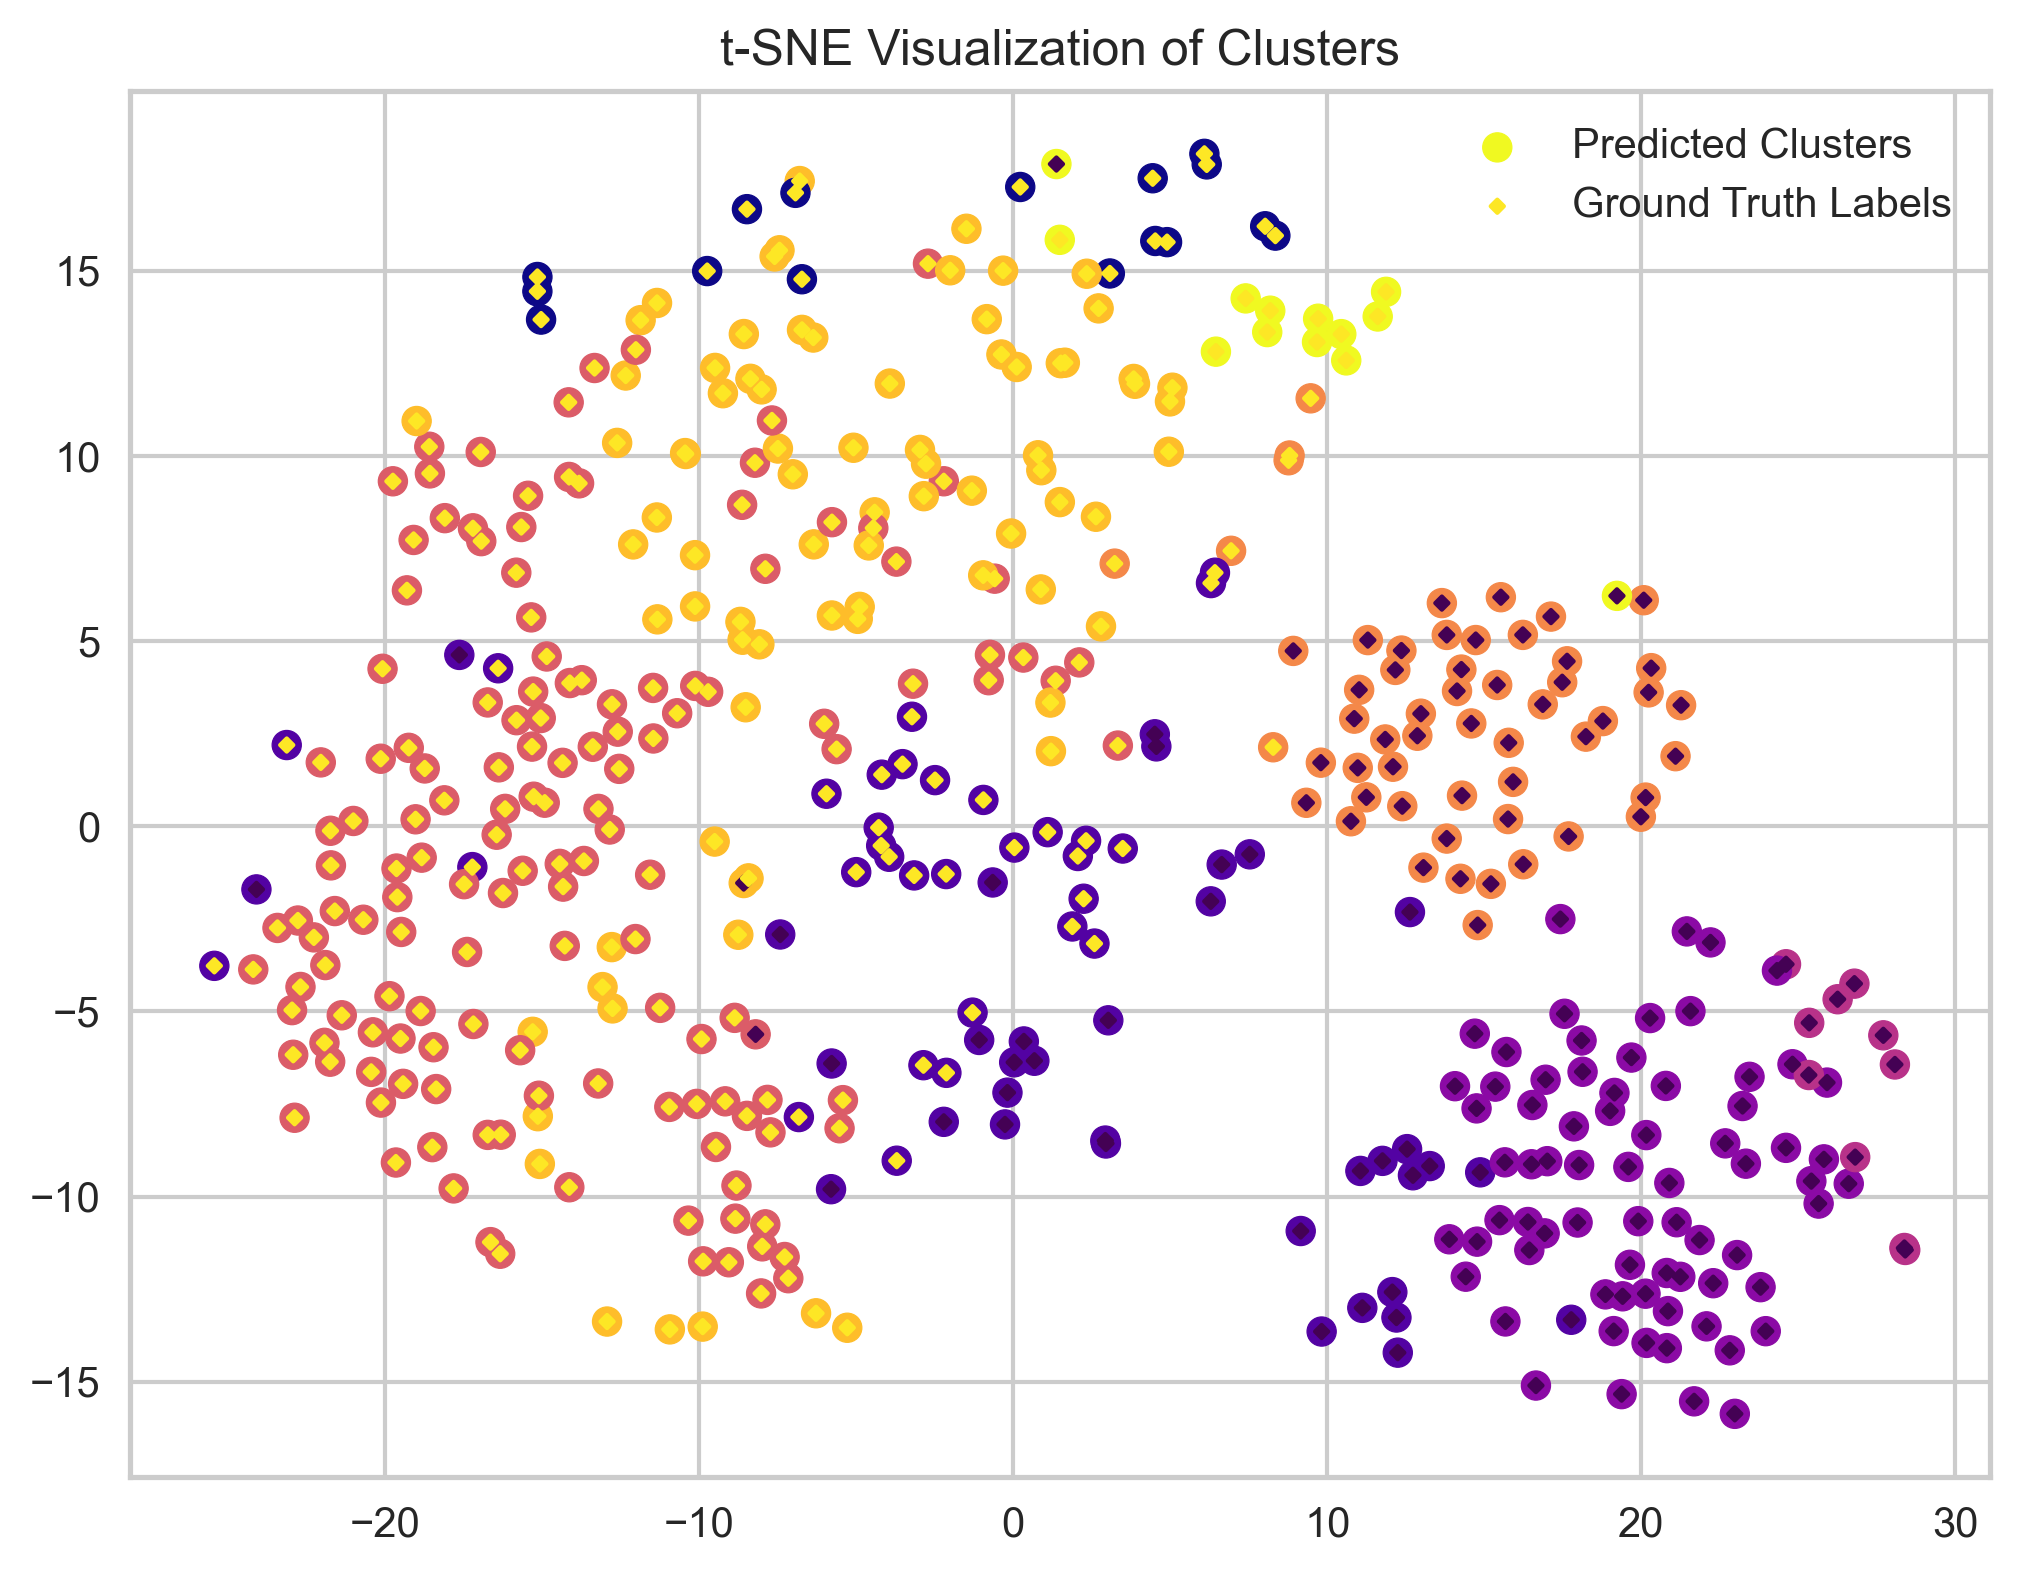

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


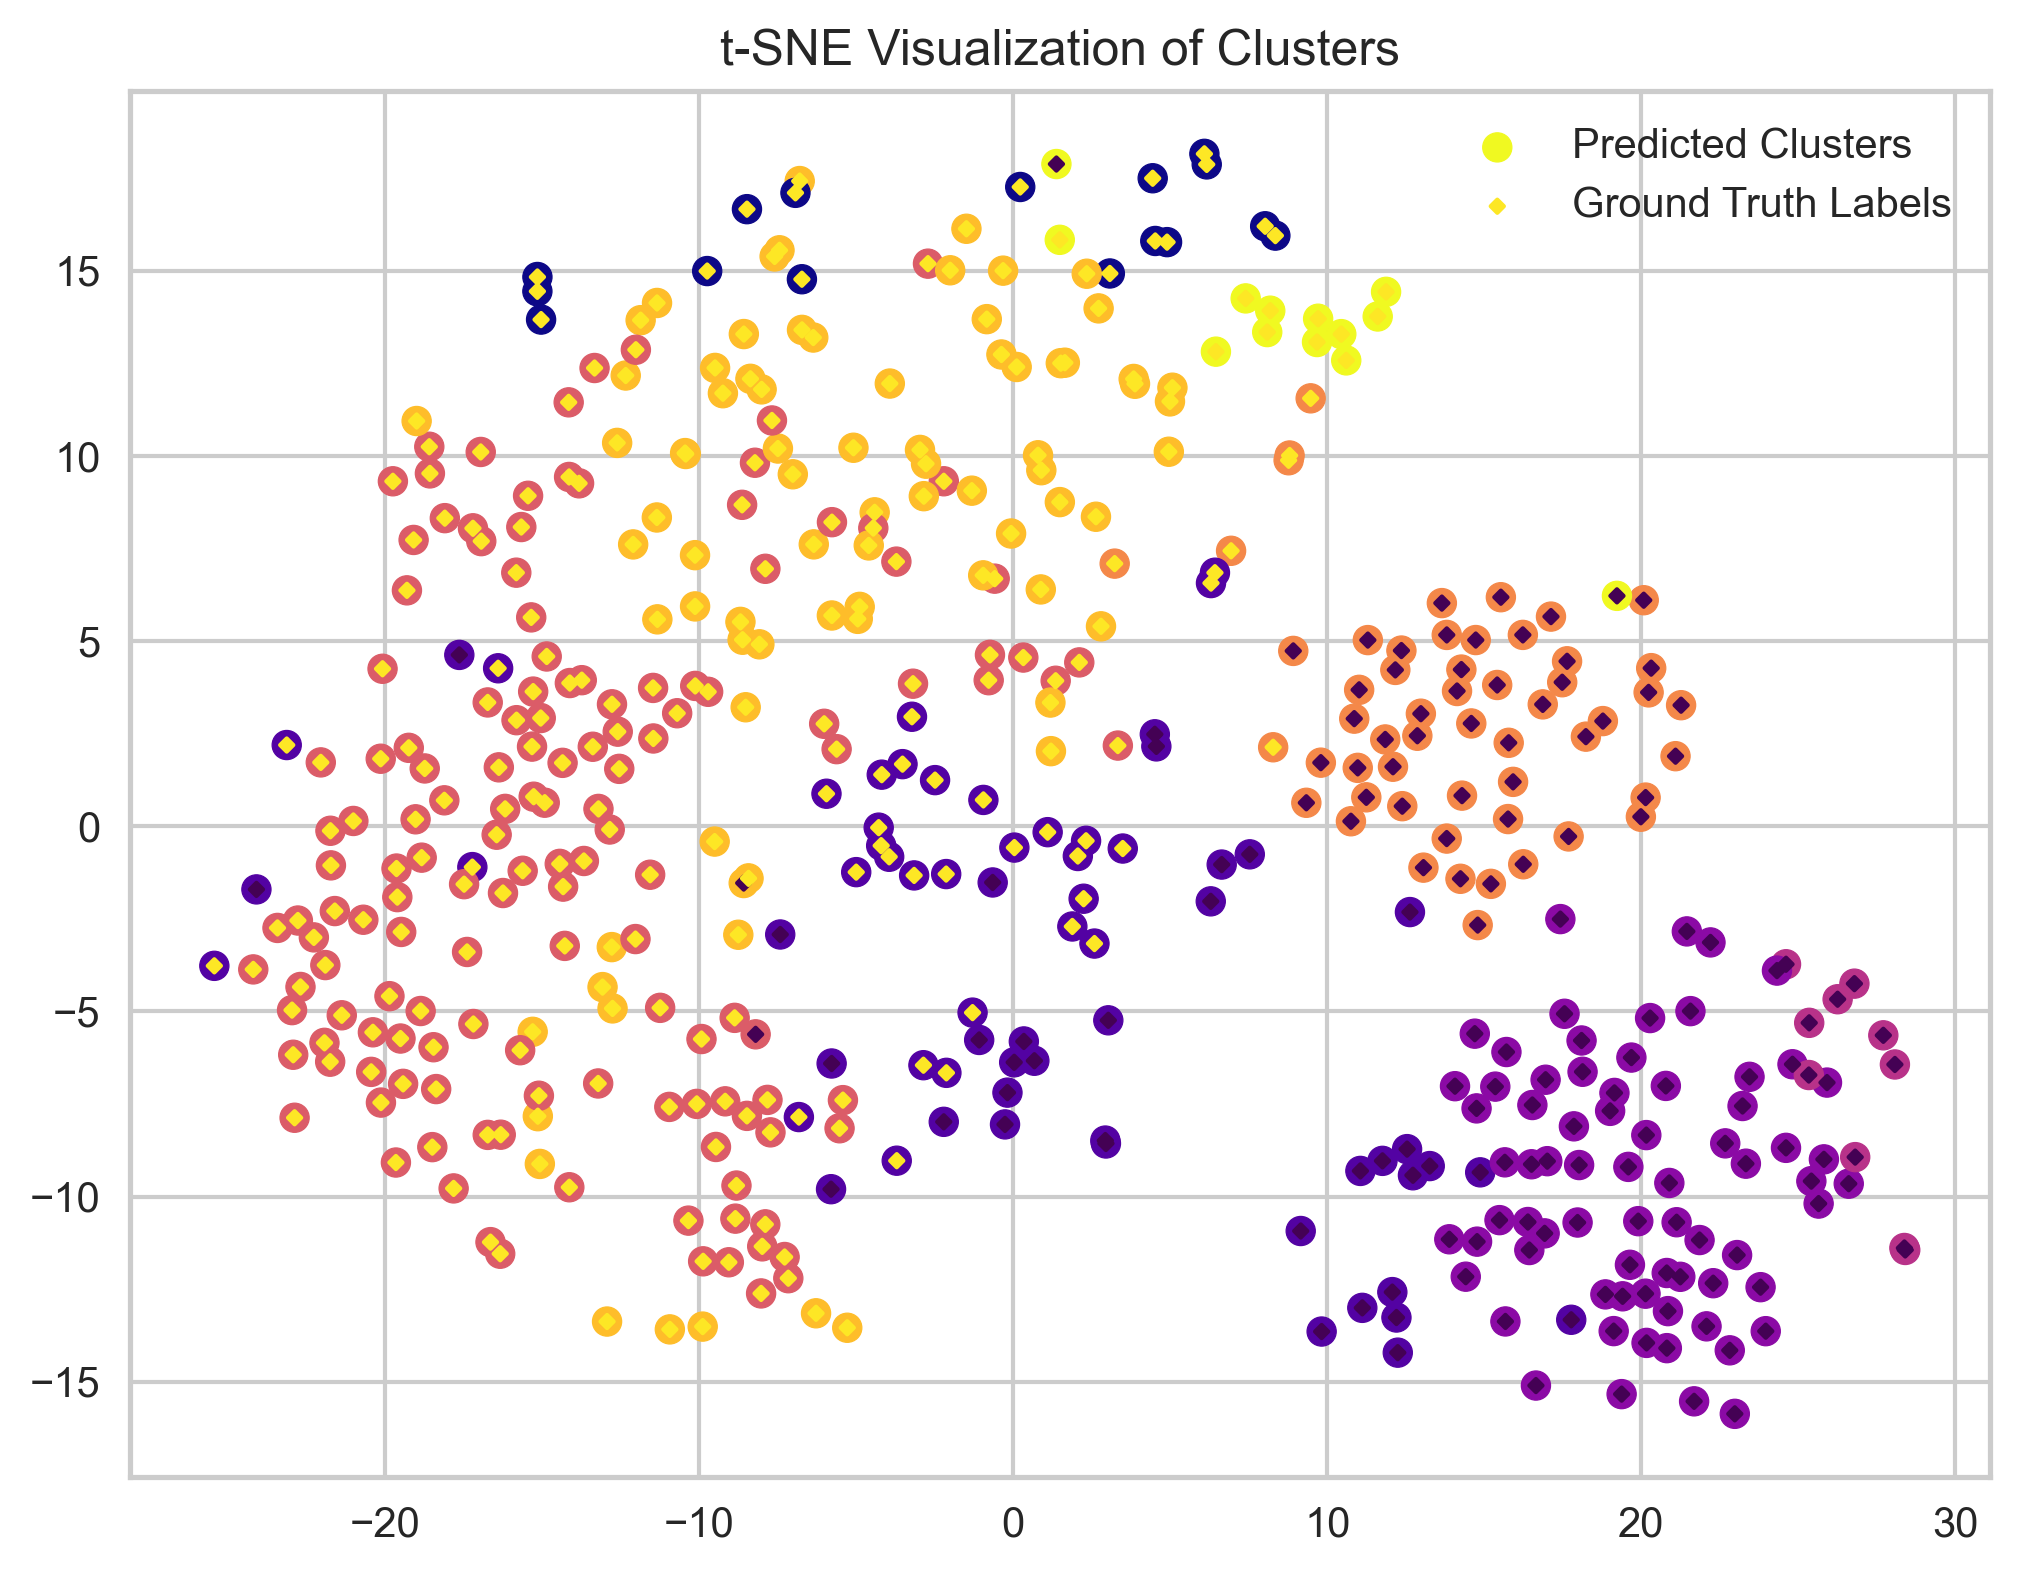

In [15]:
importlib.reload(charts)
charts.visualize_clusters_with_tsne(
    model=GaussianMixture(random_state=SEED, n_components=8, n_init=10),
    X_data=X_train,
    labels=y_train,  # Otherwise it is so-so
    output_path=f"{STEP_1_PATH}/em_clusters_visualization_k_4.png",
    seed=SEED,
)

charts.visualize_clusters_with_tsne(
    model=GaussianMixture(random_state=SEED, n_components=8, n_init=10),
    X_data=X_train,
    labels=y_train,  # Otherwise it is so-so
    output_path=f"{STEP_1_PATH}/em_clusters_visualization_k_2.png",
    seed=SEED,
)

# Step 2

## PCA

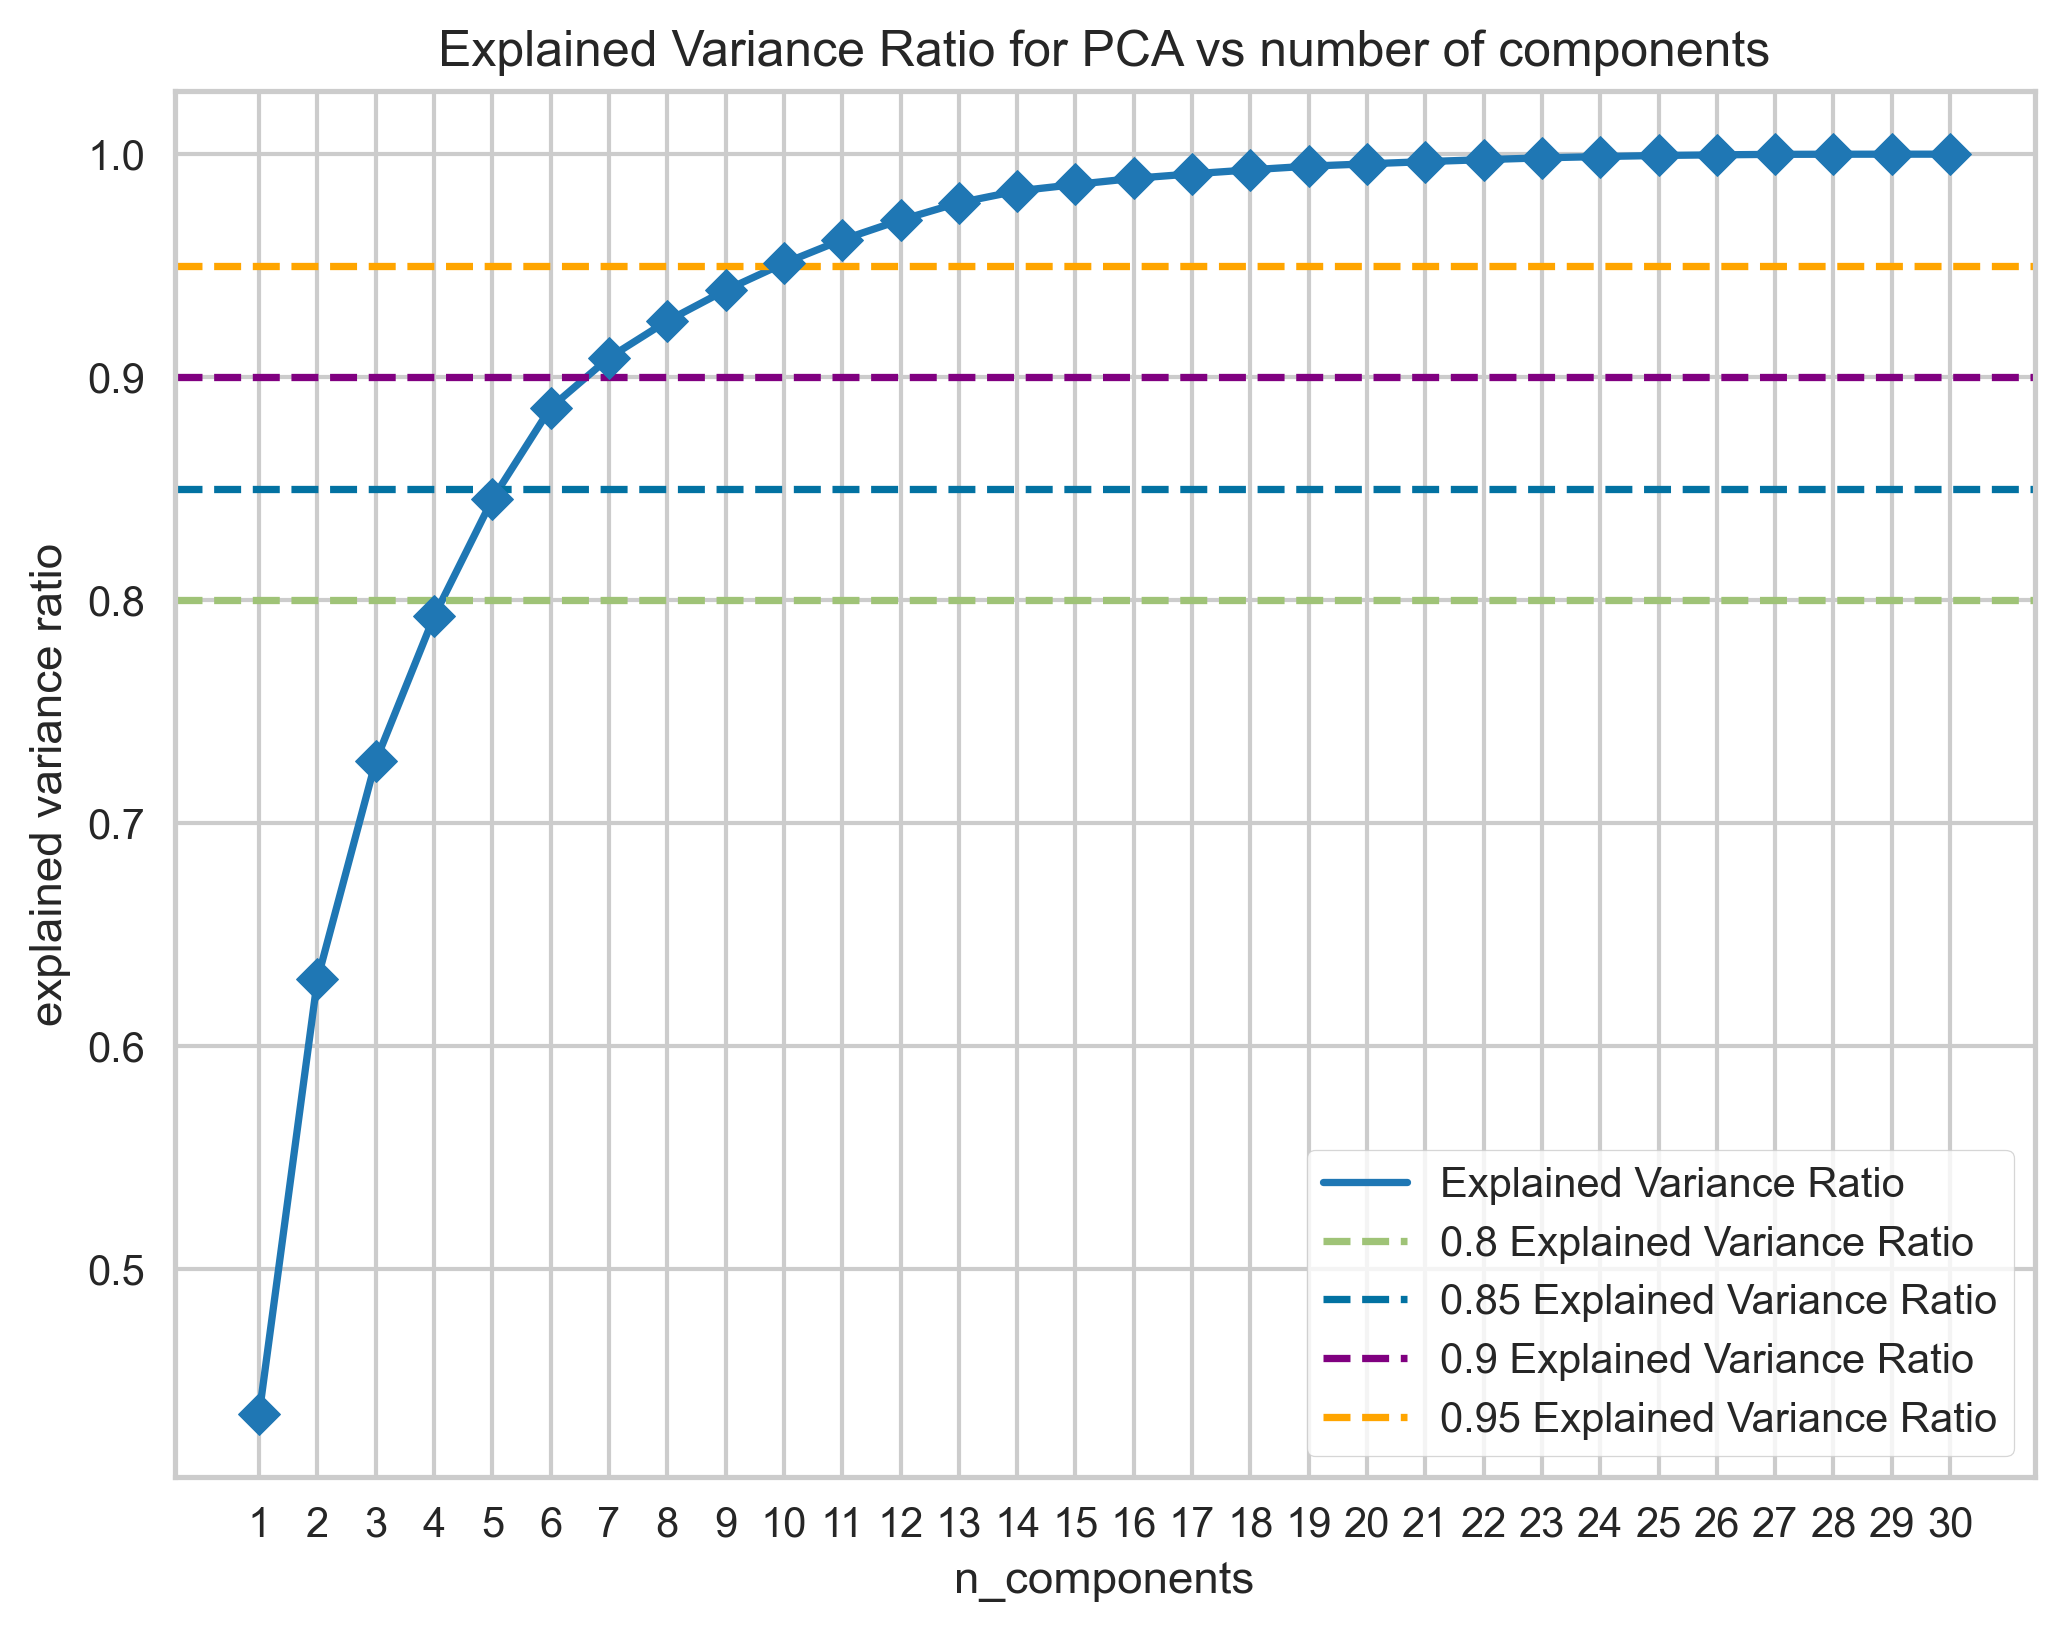

In [18]:
importlib.reload(charts)
charts.pca_visualize_explained_variance_ratio(X_train, f"{STEP_2_PATH}/pca_explained_variance_ratio.png")

Eigen values: [1.30795808e+01 5.86288753e+00 2.94091922e+00 1.95020901e+00
 1.57948467e+00 1.23655760e+00 6.72154363e-01 4.95474613e-01
 4.14927499e-01 3.62375076e-01 3.17667767e-01 2.65630196e-01
 2.32225690e-01 1.59858052e-01 8.72024257e-02 8.26408171e-02
 6.07697261e-02 5.45134242e-02 4.92191229e-02 3.12451064e-02
 3.00216975e-02 2.64231415e-02 2.43480901e-02 1.73381143e-02
 1.49216721e-02 8.30696920e-03 6.78932006e-03 1.52633753e-03
 7.39282339e-04 1.21955095e-04]


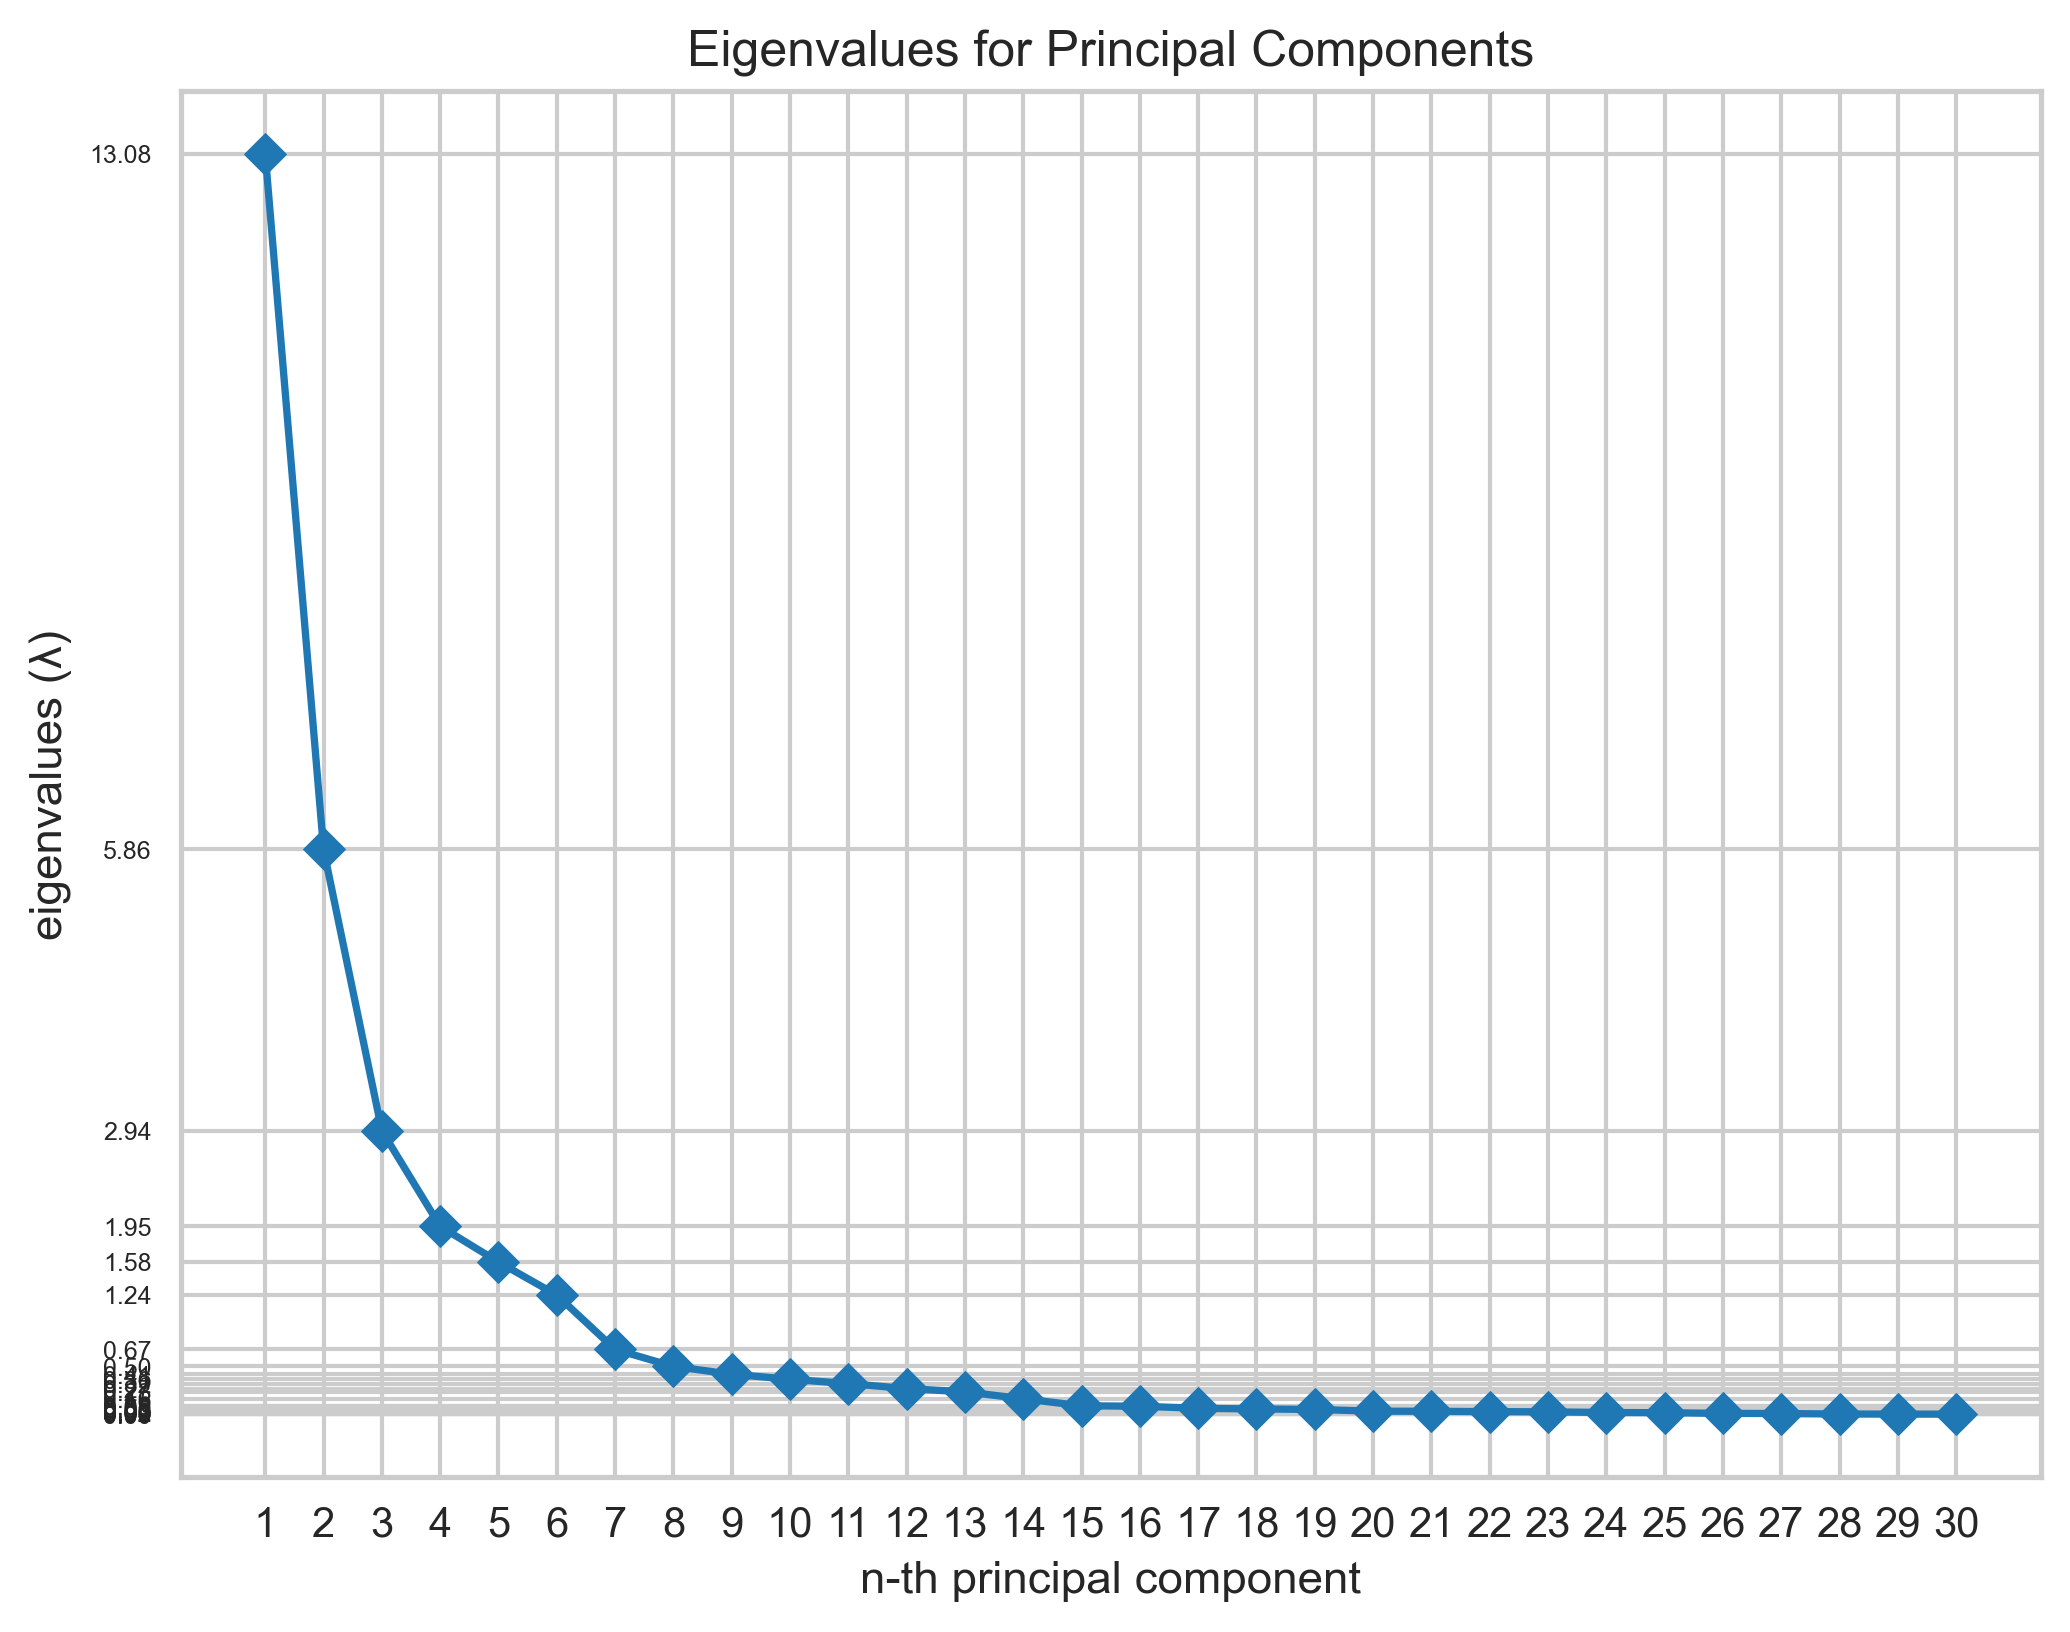

In [19]:
importlib.reload(charts)
charts.pca_visualize_eigenvalues(X_train, f"{STEP_2_PATH}/pca_eigenvalues.png")

## ICA

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


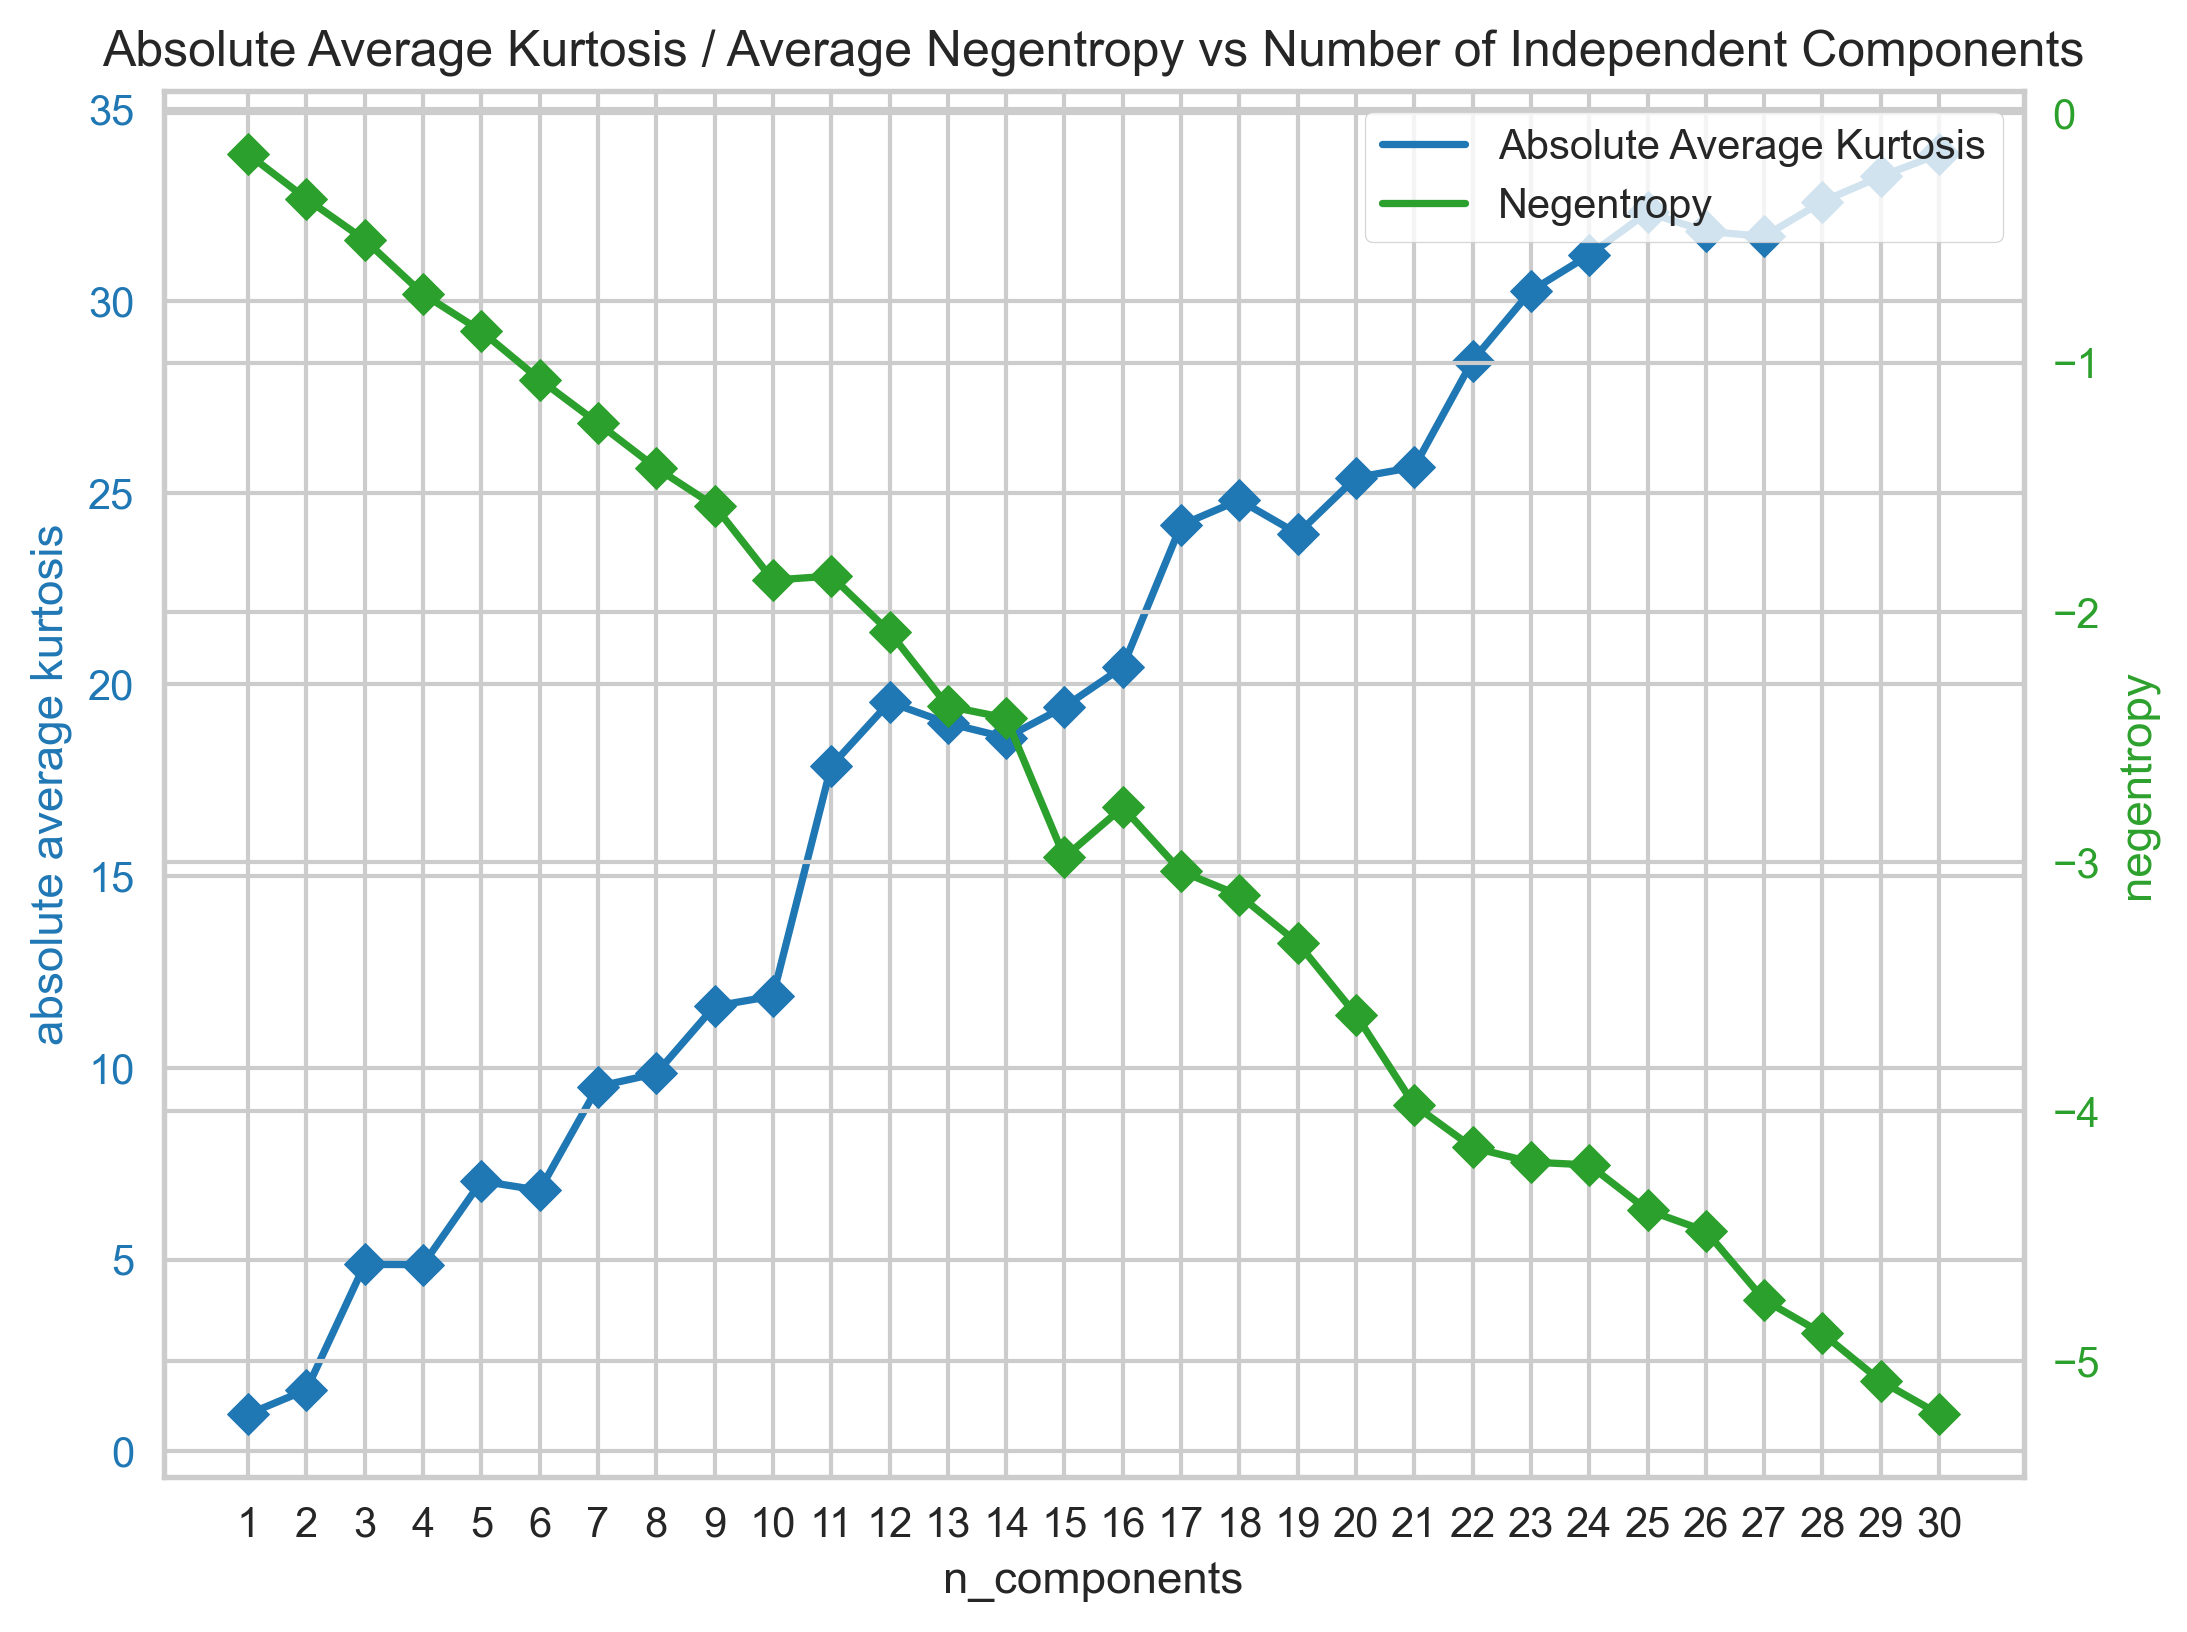

In [16]:
importlib.reload(charts)
charts.ica_visualize_absolute_mean_kurtosis(
    X_data=X_train,
    output_path=f"{STEP_2_PATH}/ica_absolute_mean_kurtosis_negentropy.png",
    seed=SEED,
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


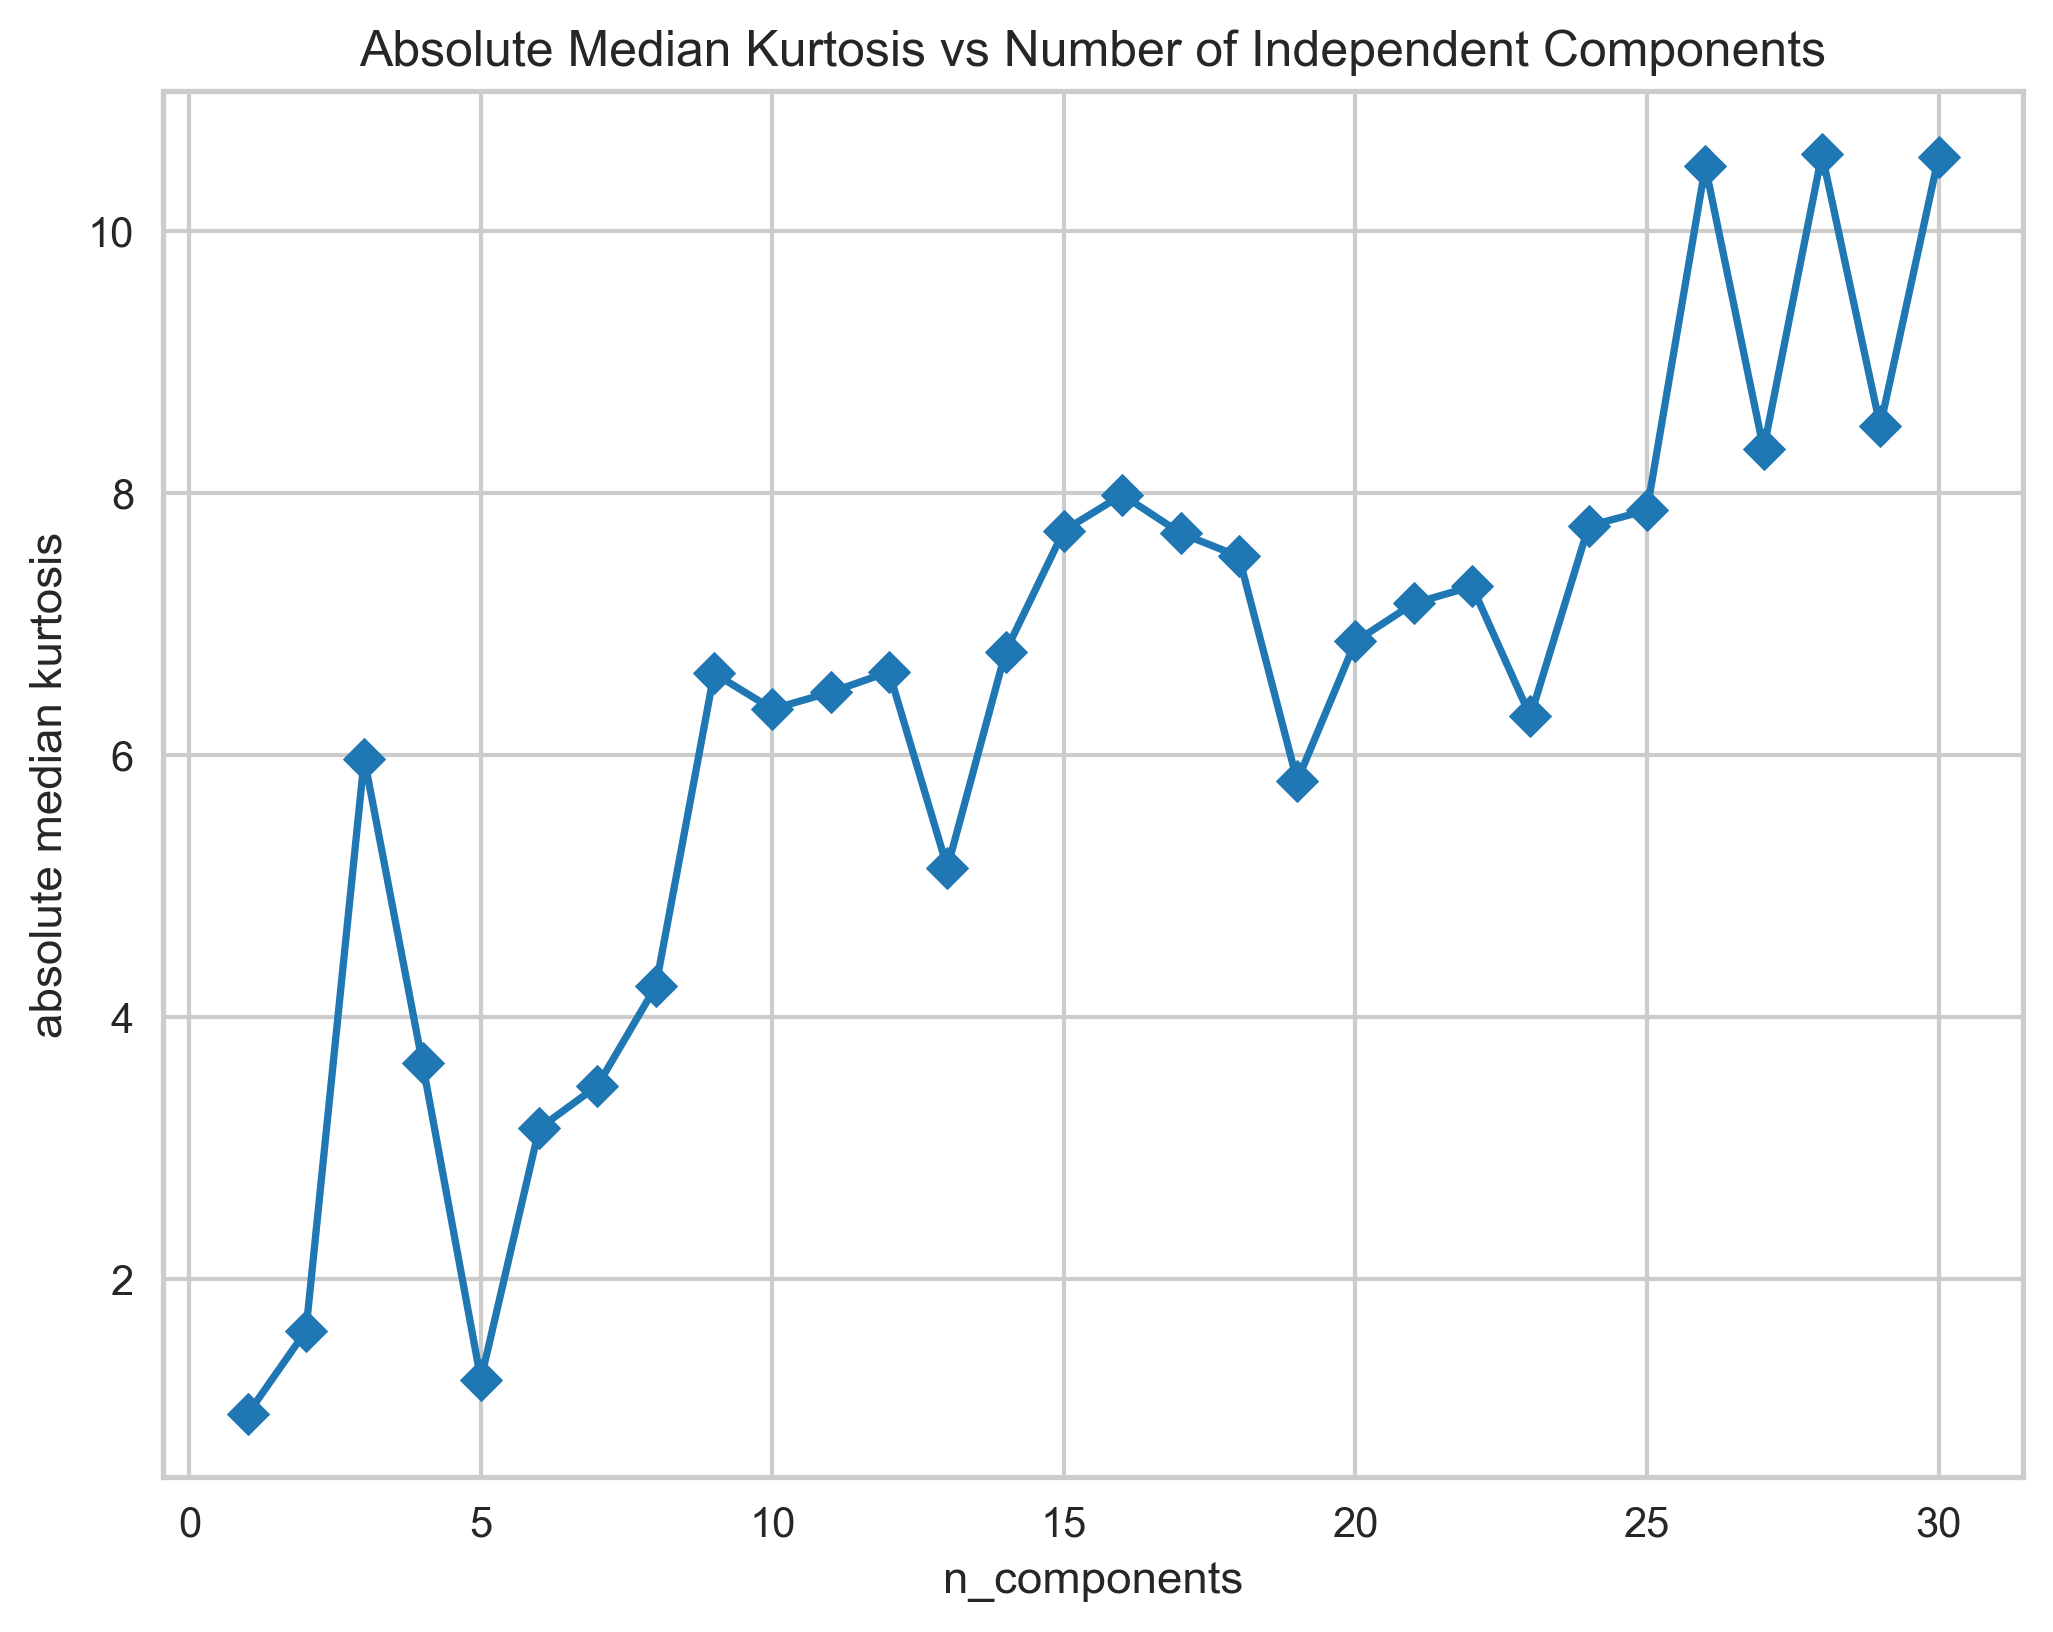

In [17]:
importlib.reload(charts)
charts.ica_visualize_absolute_median_kurtosis(
    X_data=X_train,
    output_path=f"{STEP_2_PATH}/ica_absolute_median_kurtosis.png",
    seed=SEED,
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


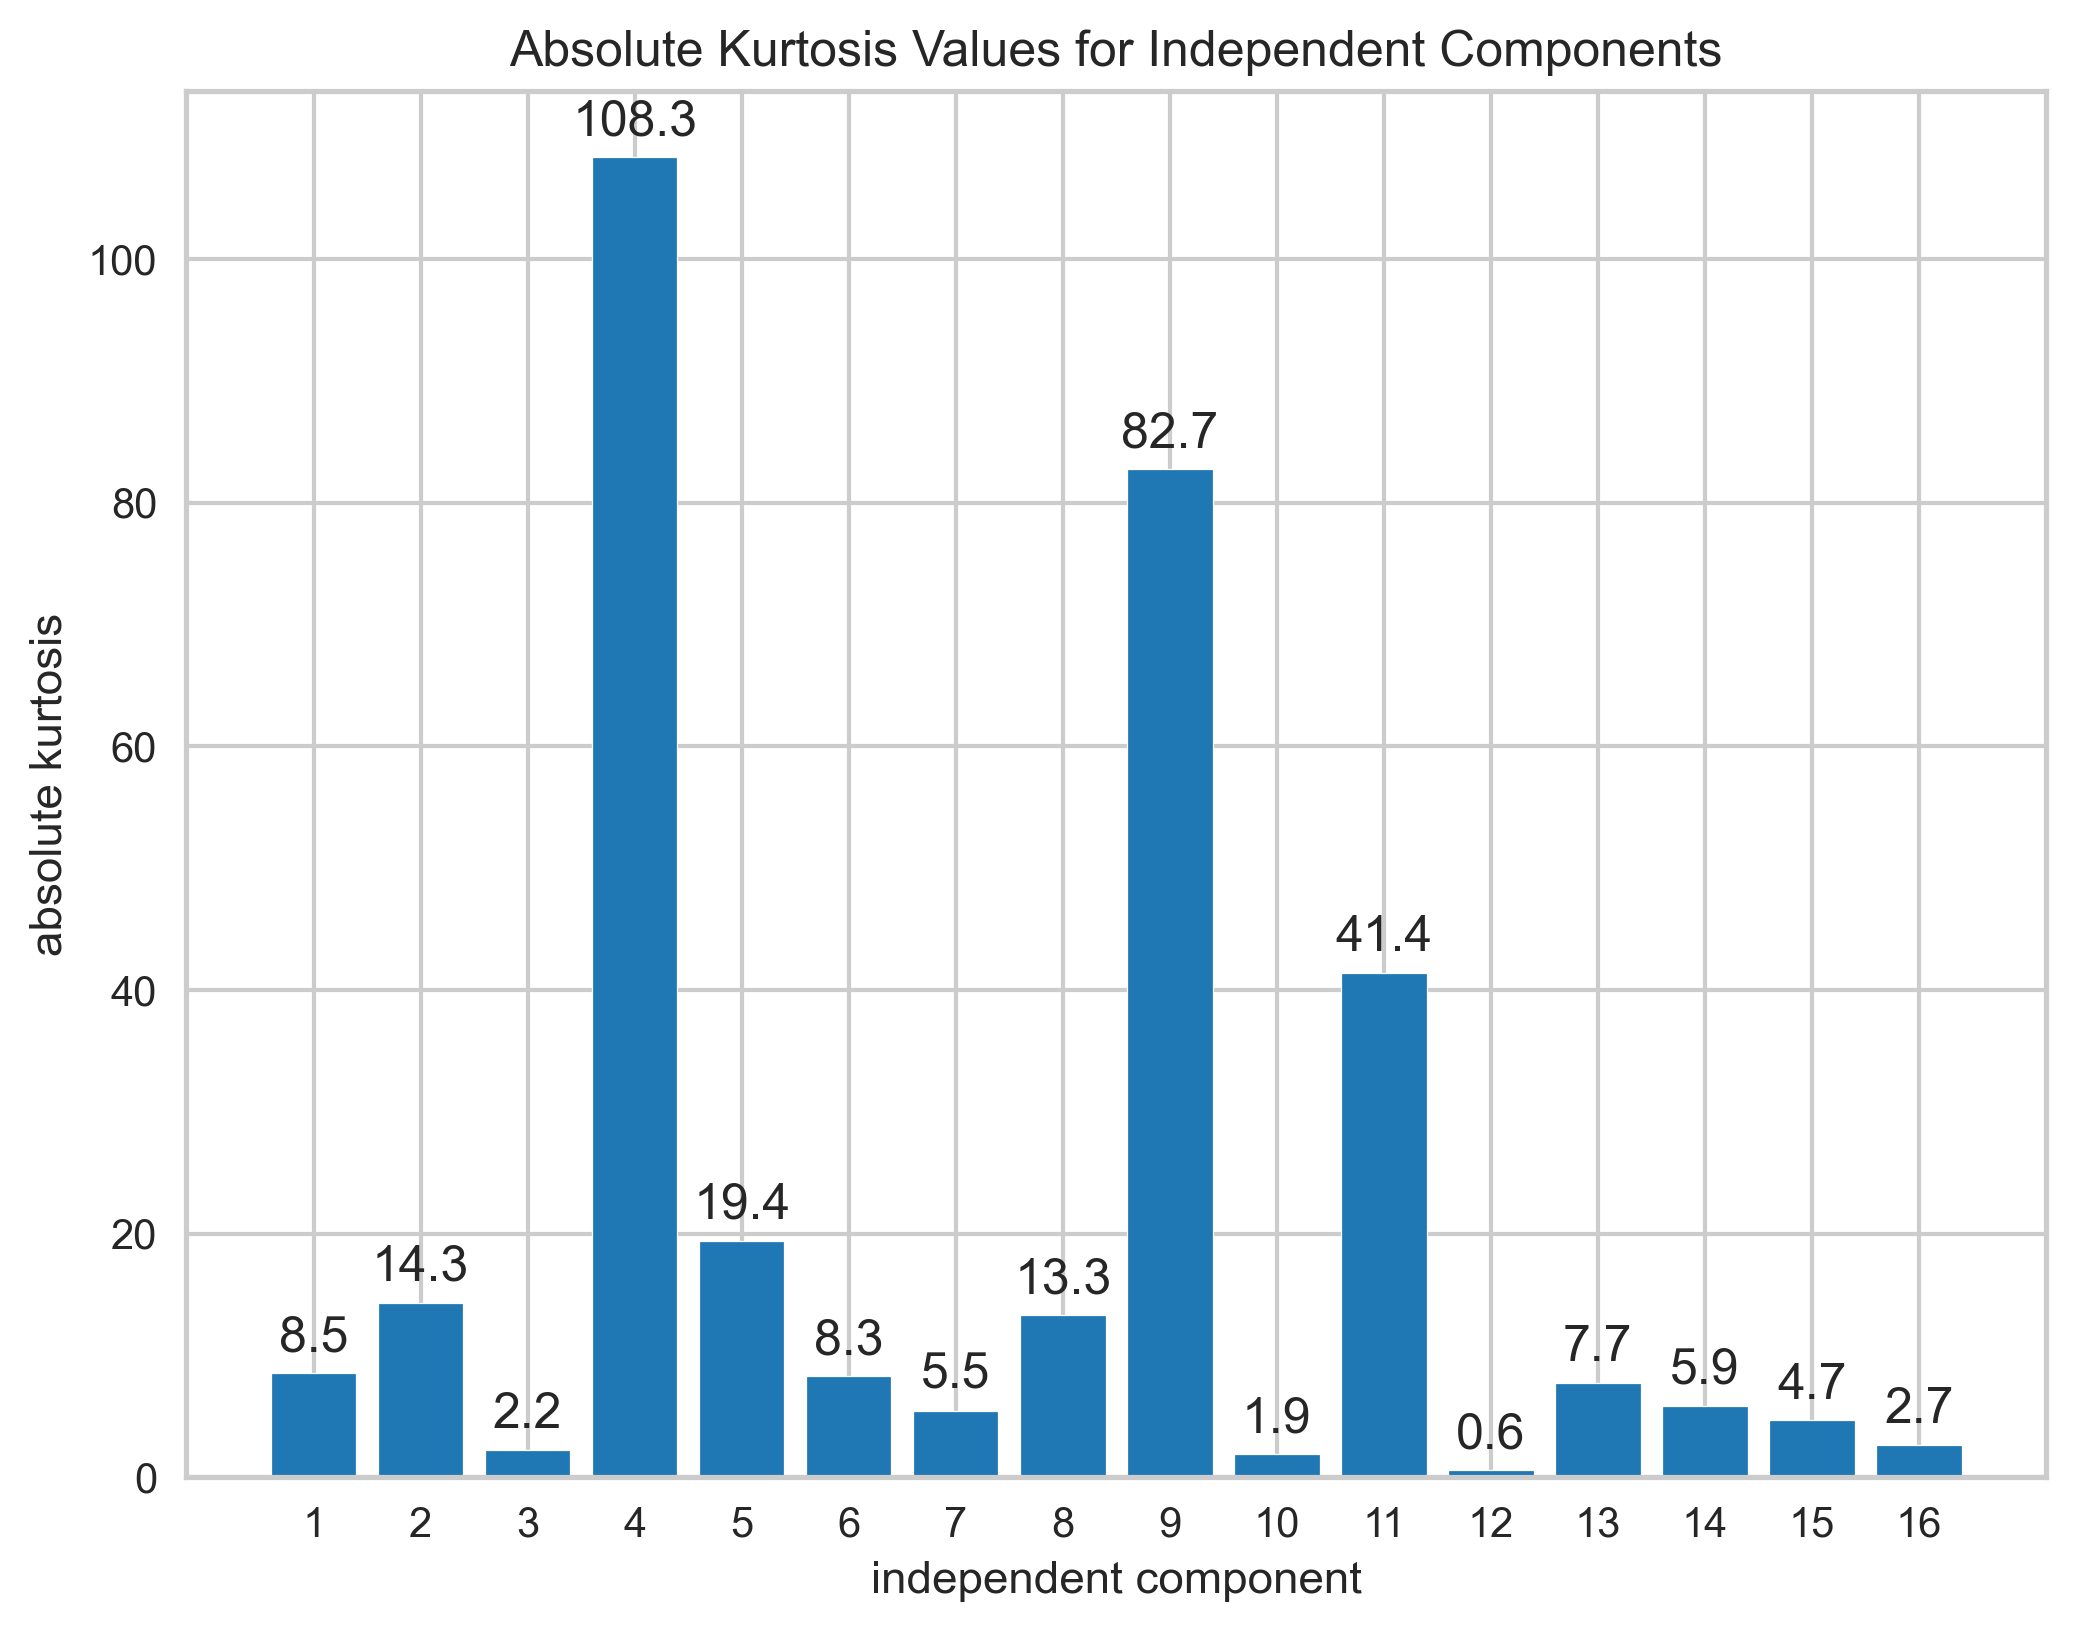

In [22]:
importlib.reload(charts)
charts.ica_visualize_absolute_kurtosis_distribution(
    X_data=X_train,
    k=16,
    output_path=f"{STEP_2_PATH}/ica_kurtosis_values_components.png",
    seed=SEED,

)

## RP

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


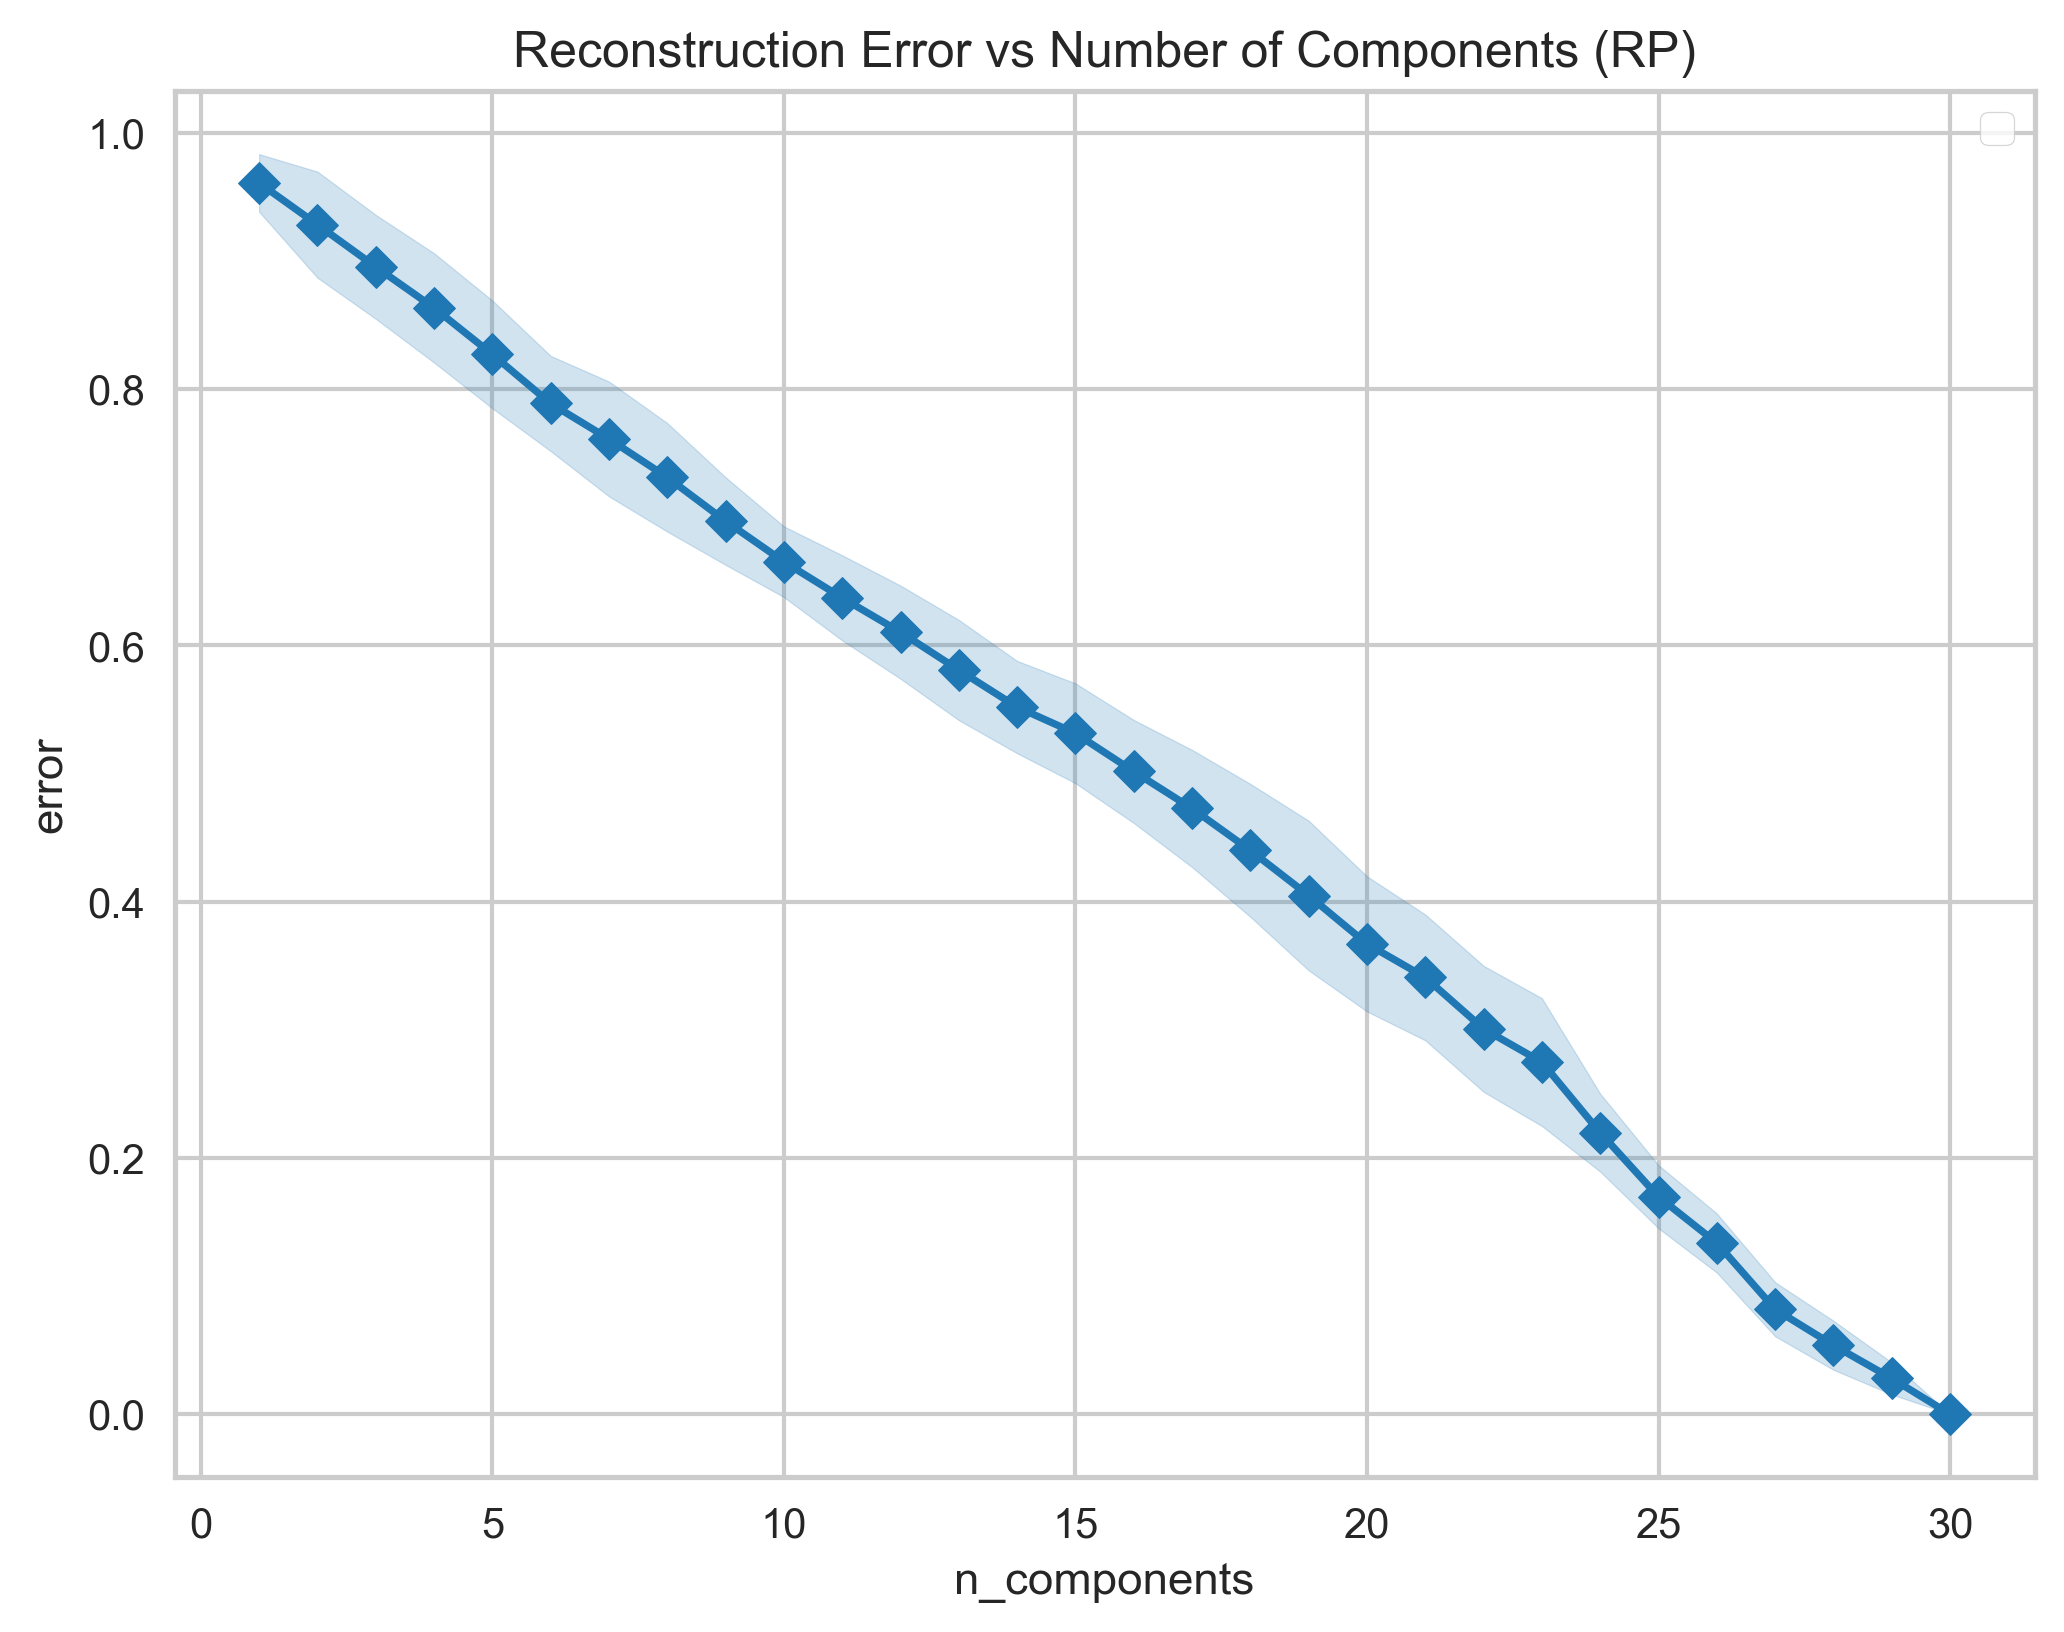

In [19]:
importlib.reload(charts)
charts.rp_reconstruction_error(
    X_data=X_train,
    output_path=f"{STEP_2_PATH}/rp_reconstruction_error.png",
)

## Isomap

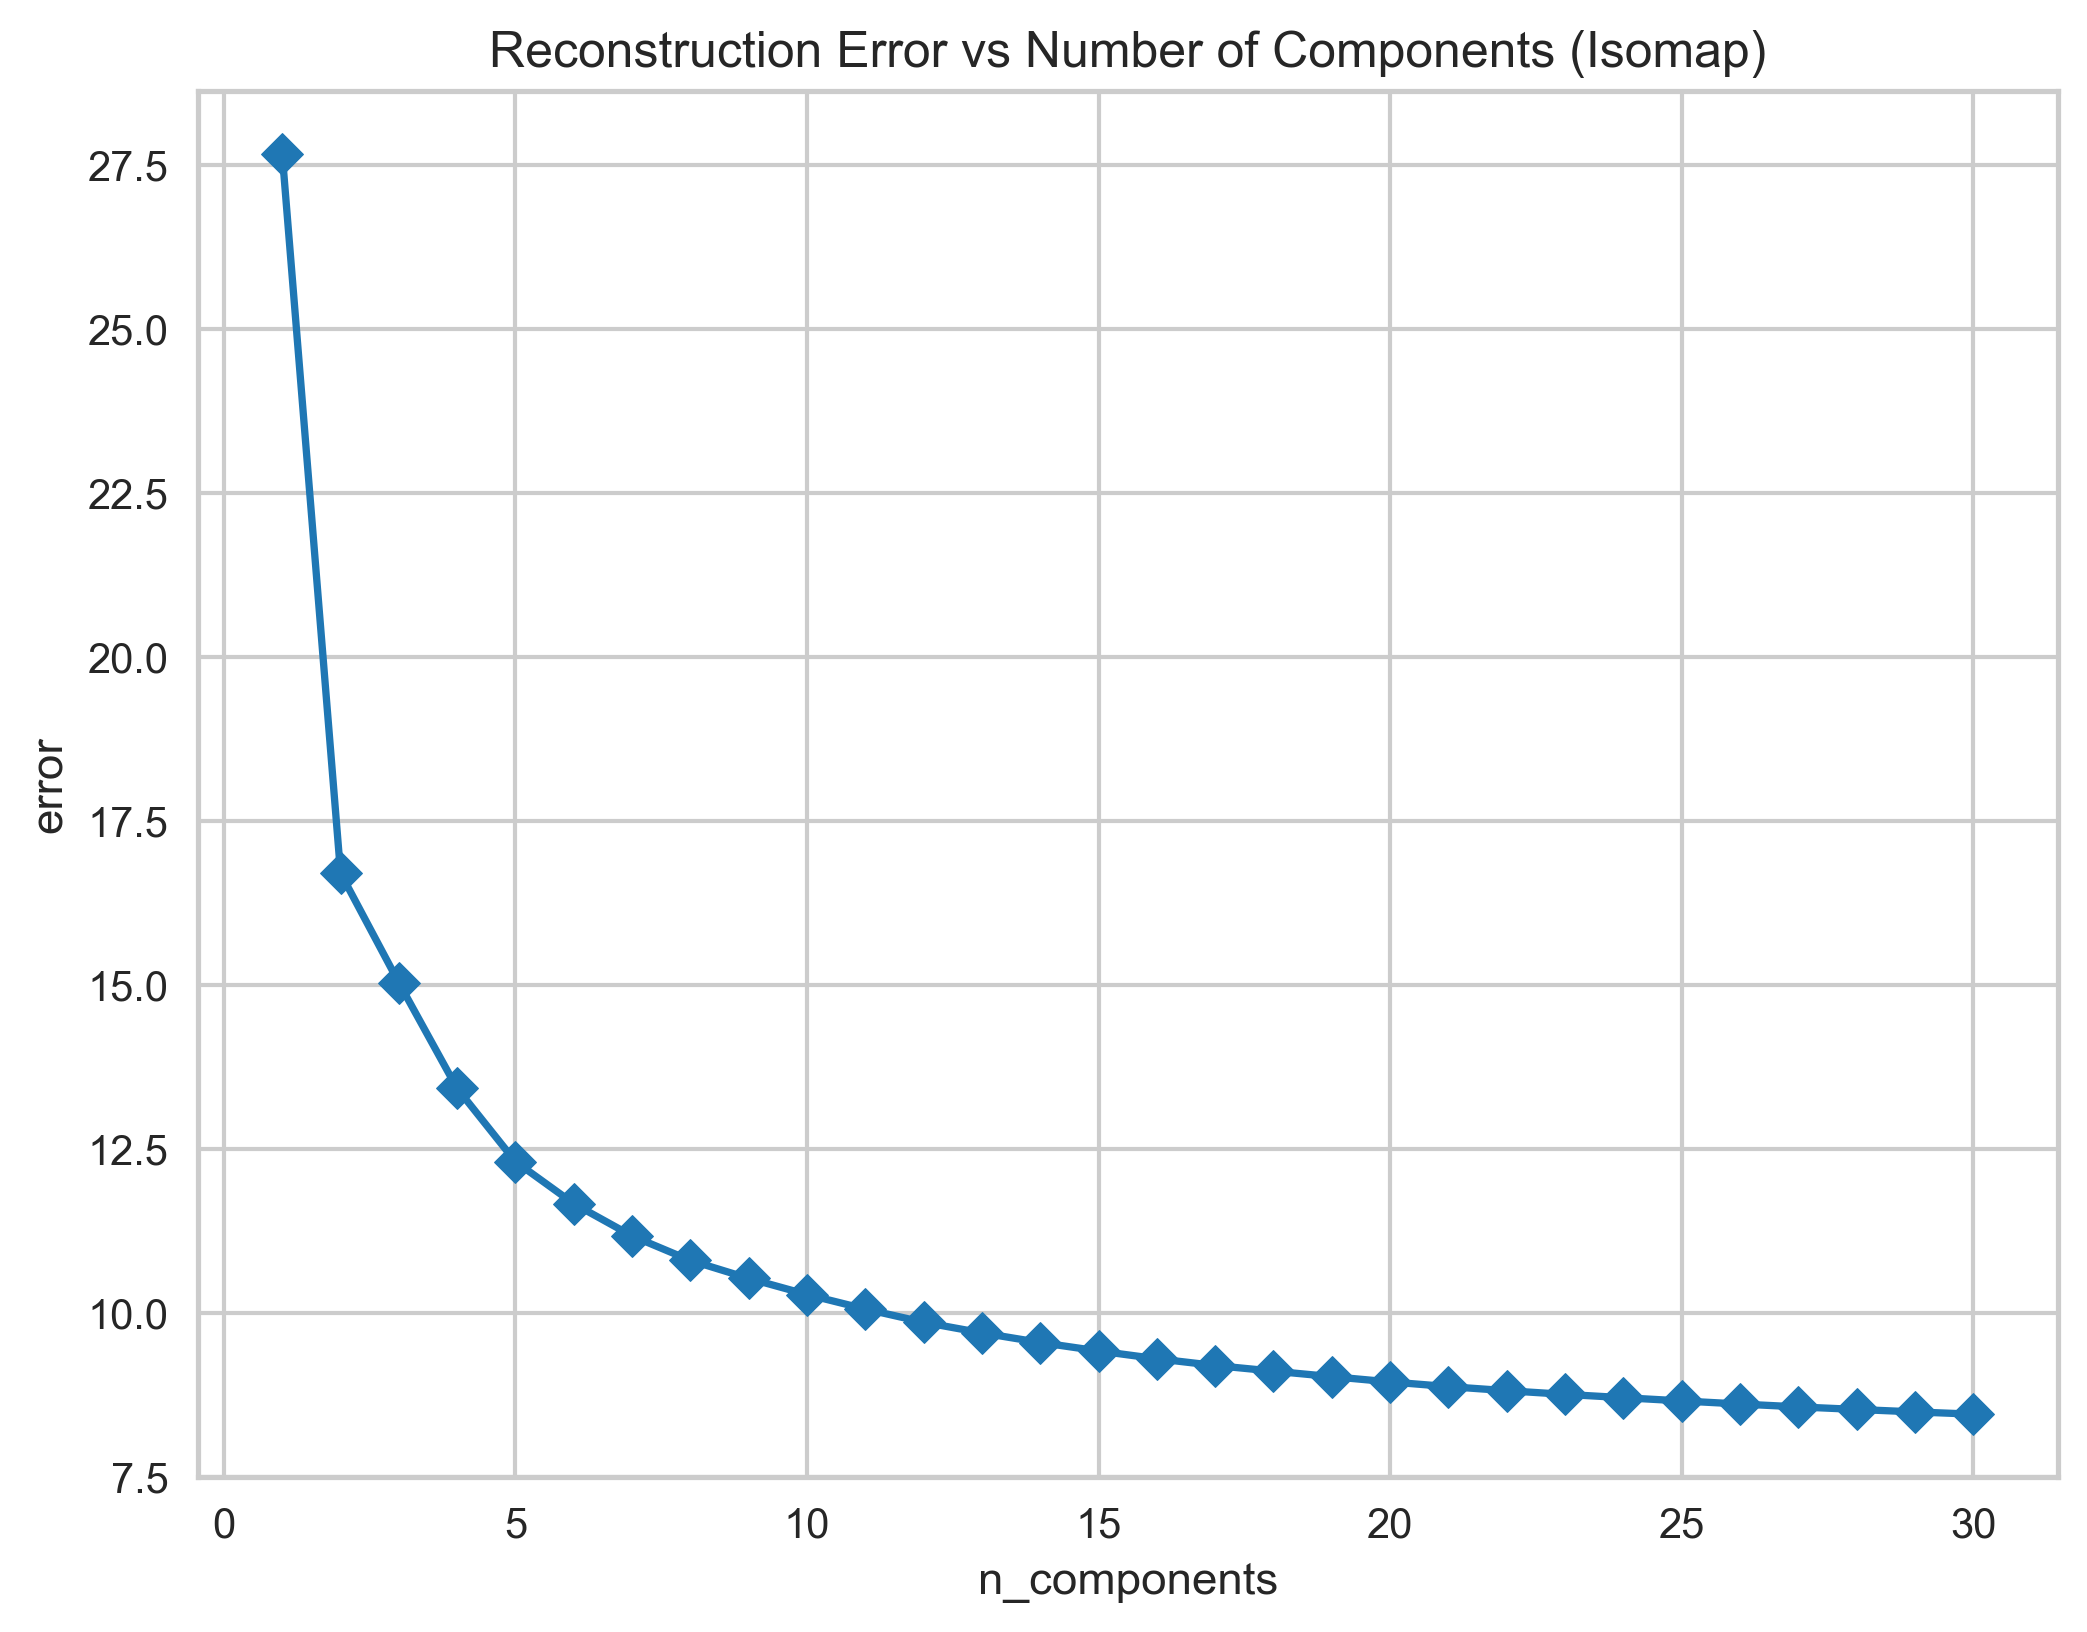

In [20]:
importlib.reload(charts)
charts.isomap_reconstruction_error(
    X_data=X_train,
    output_path=f"{STEP_2_PATH}/isomap_reconstruction_error.png",
)

## Evaluation

In [28]:
from sklearn.manifold import Isomap
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA, FastICA
from DummyTransformer import DummyTransformer

importlib.reload(evals)
evals.evaluate_dim_reduction(
    [
        ("Baseline", DummyTransformer()),
        ("PCA (n_components=7)", PCA(n_components=7)),
        ("ICA (n_components=16)", FastICA(n_components=16, random_state=SEED)),
        ("RP (n_components=25)", GaussianRandomProjection(n_components=10, random_state=SEED)),
        ("Isomap (n_components=5)", Isomap(n_components=5)),
    ],
    X_data=X_train,
    labels=y_train,
    scoring='f1',
)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


DecisionTreeClassifier  RandomForestClassifier  \
Baseline                0                0.936865                0.965391   
PCA (n_components=7)    0                0.935490                0.960233   
ICA (n_components=16)   0                0.846385                0.936636   
RP (n_components=25)    0                0.915440                0.950364   
Isomap (n_components=5) 0                0.943966                0.965681   

                           BaggingClassifier  LinearSVC  SGDClassifier  \
Baseline                0           0.958005   0.977511       0.968232   
PCA (n_components=7)    0           0.953237   0.970372       0.973820   
ICA (n_components=16)   0           0.905972   0.947153       0.956836   
RP (n_components=25)    0           0.944219   0.970703       0.968504   
Isomap (n_components=5) 0           0.961500   0.975800       0.954596   

                           LogisticRegression  
Baseline                0            0.979219  
PCA (n_components=7)    0            0.977326  
ICA (n_components=16)   0            0.788041  
RP (n_components=25)    0            0.962213  
Isomap (n_components=5) 0            0.974151

# Step 3

In [29]:
projections = [
    ("pca", "PCA (n_components=7)", PCA(n_components=7)),
    ("ica", "ICA (n_components=16)", FastICA(n_components=16, random_state=SEED)),
    ("rp", "RP (n_components=25)", GaussianRandomProjection(n_components=25, random_state=SEED)),
    ("isomap", "Isomap (n_components=5)", Isomap(n_components=5)),
]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


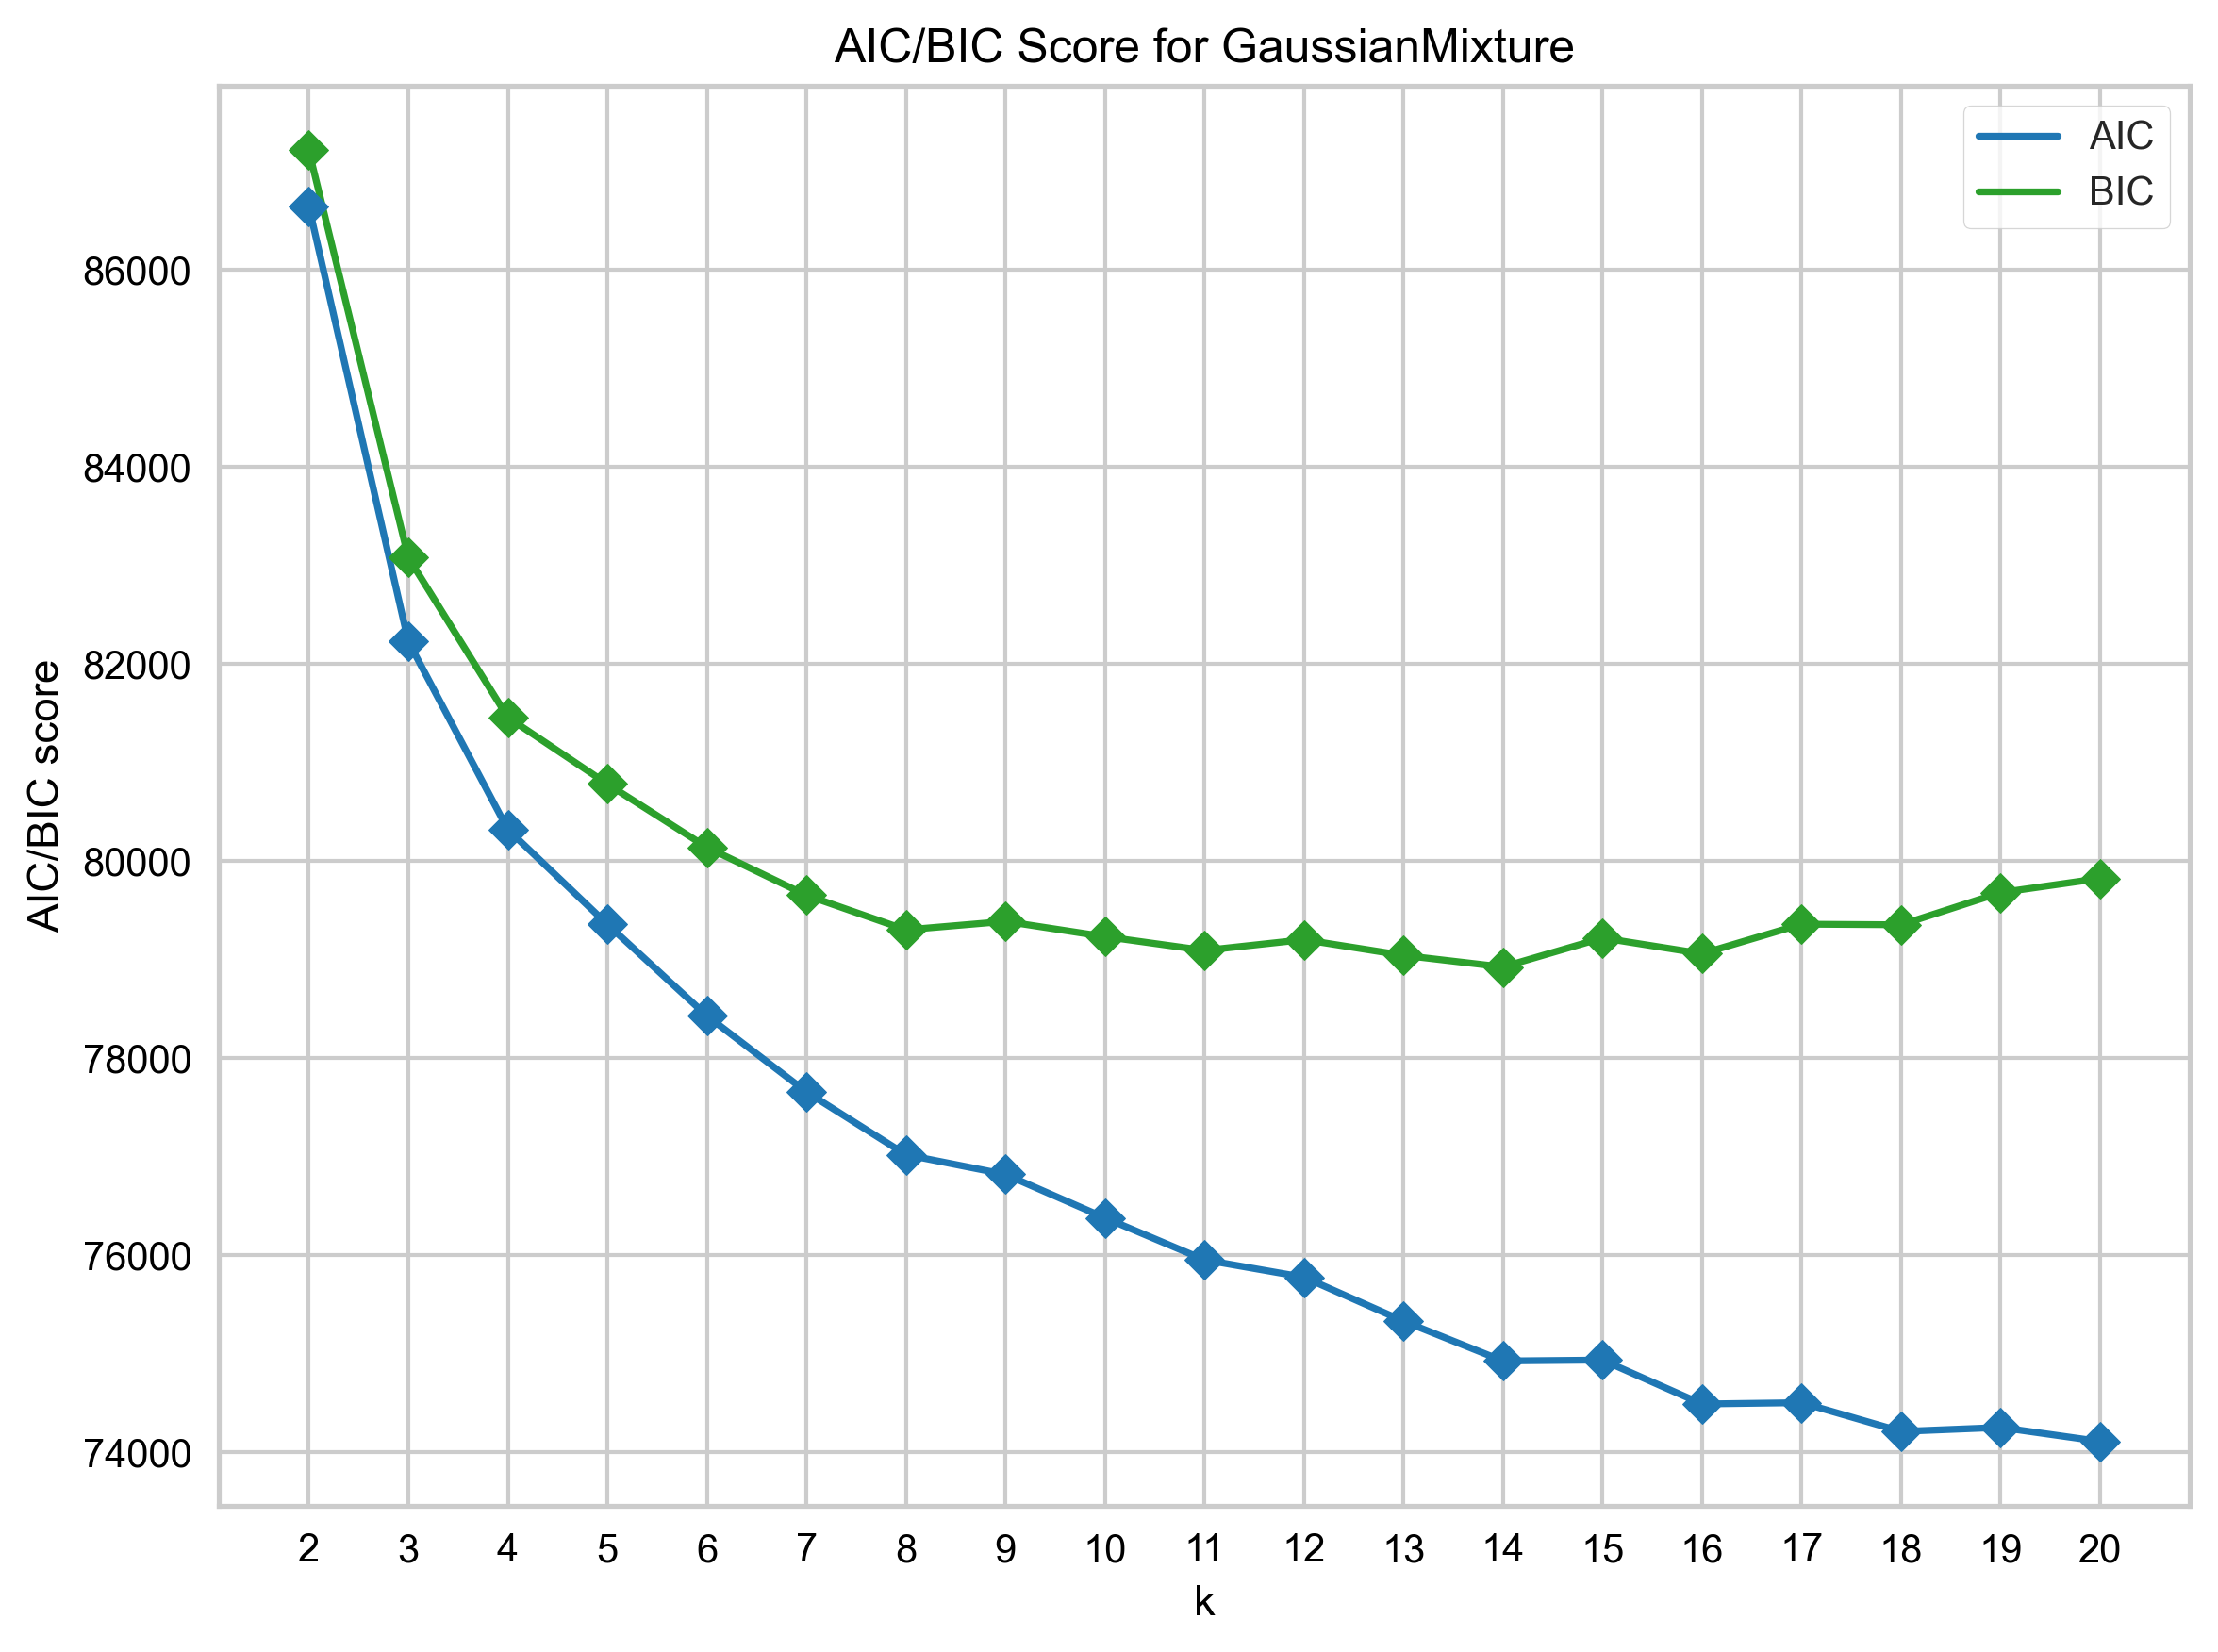

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


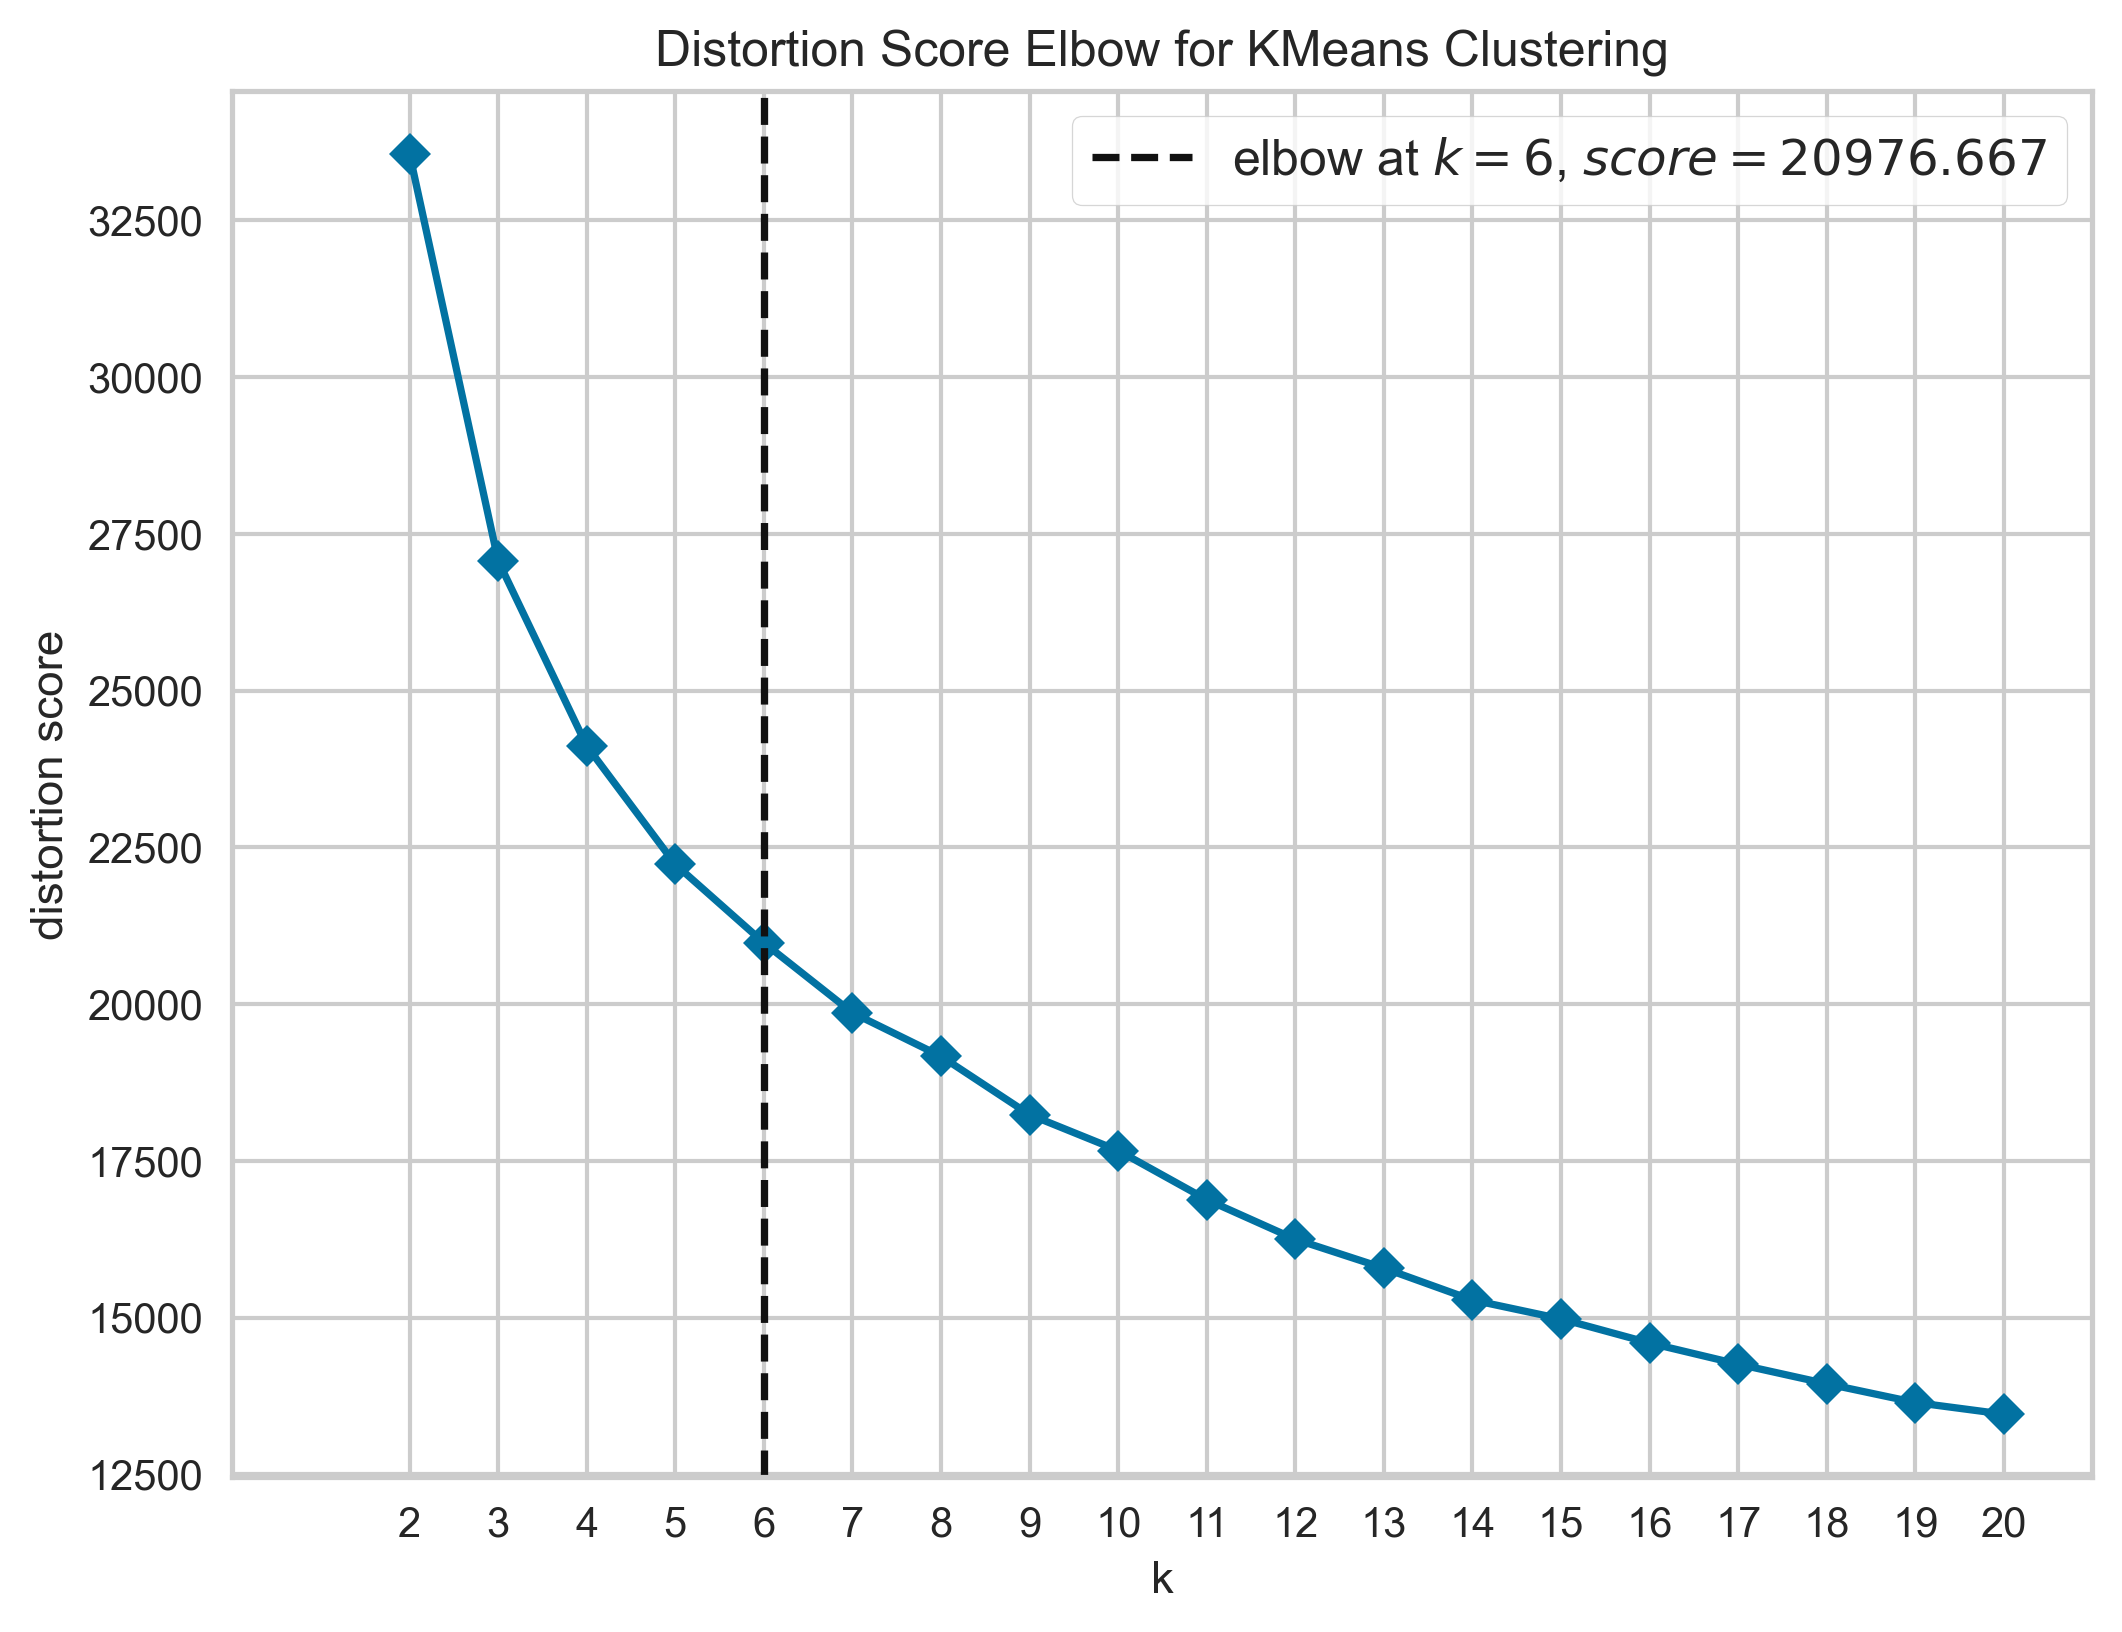

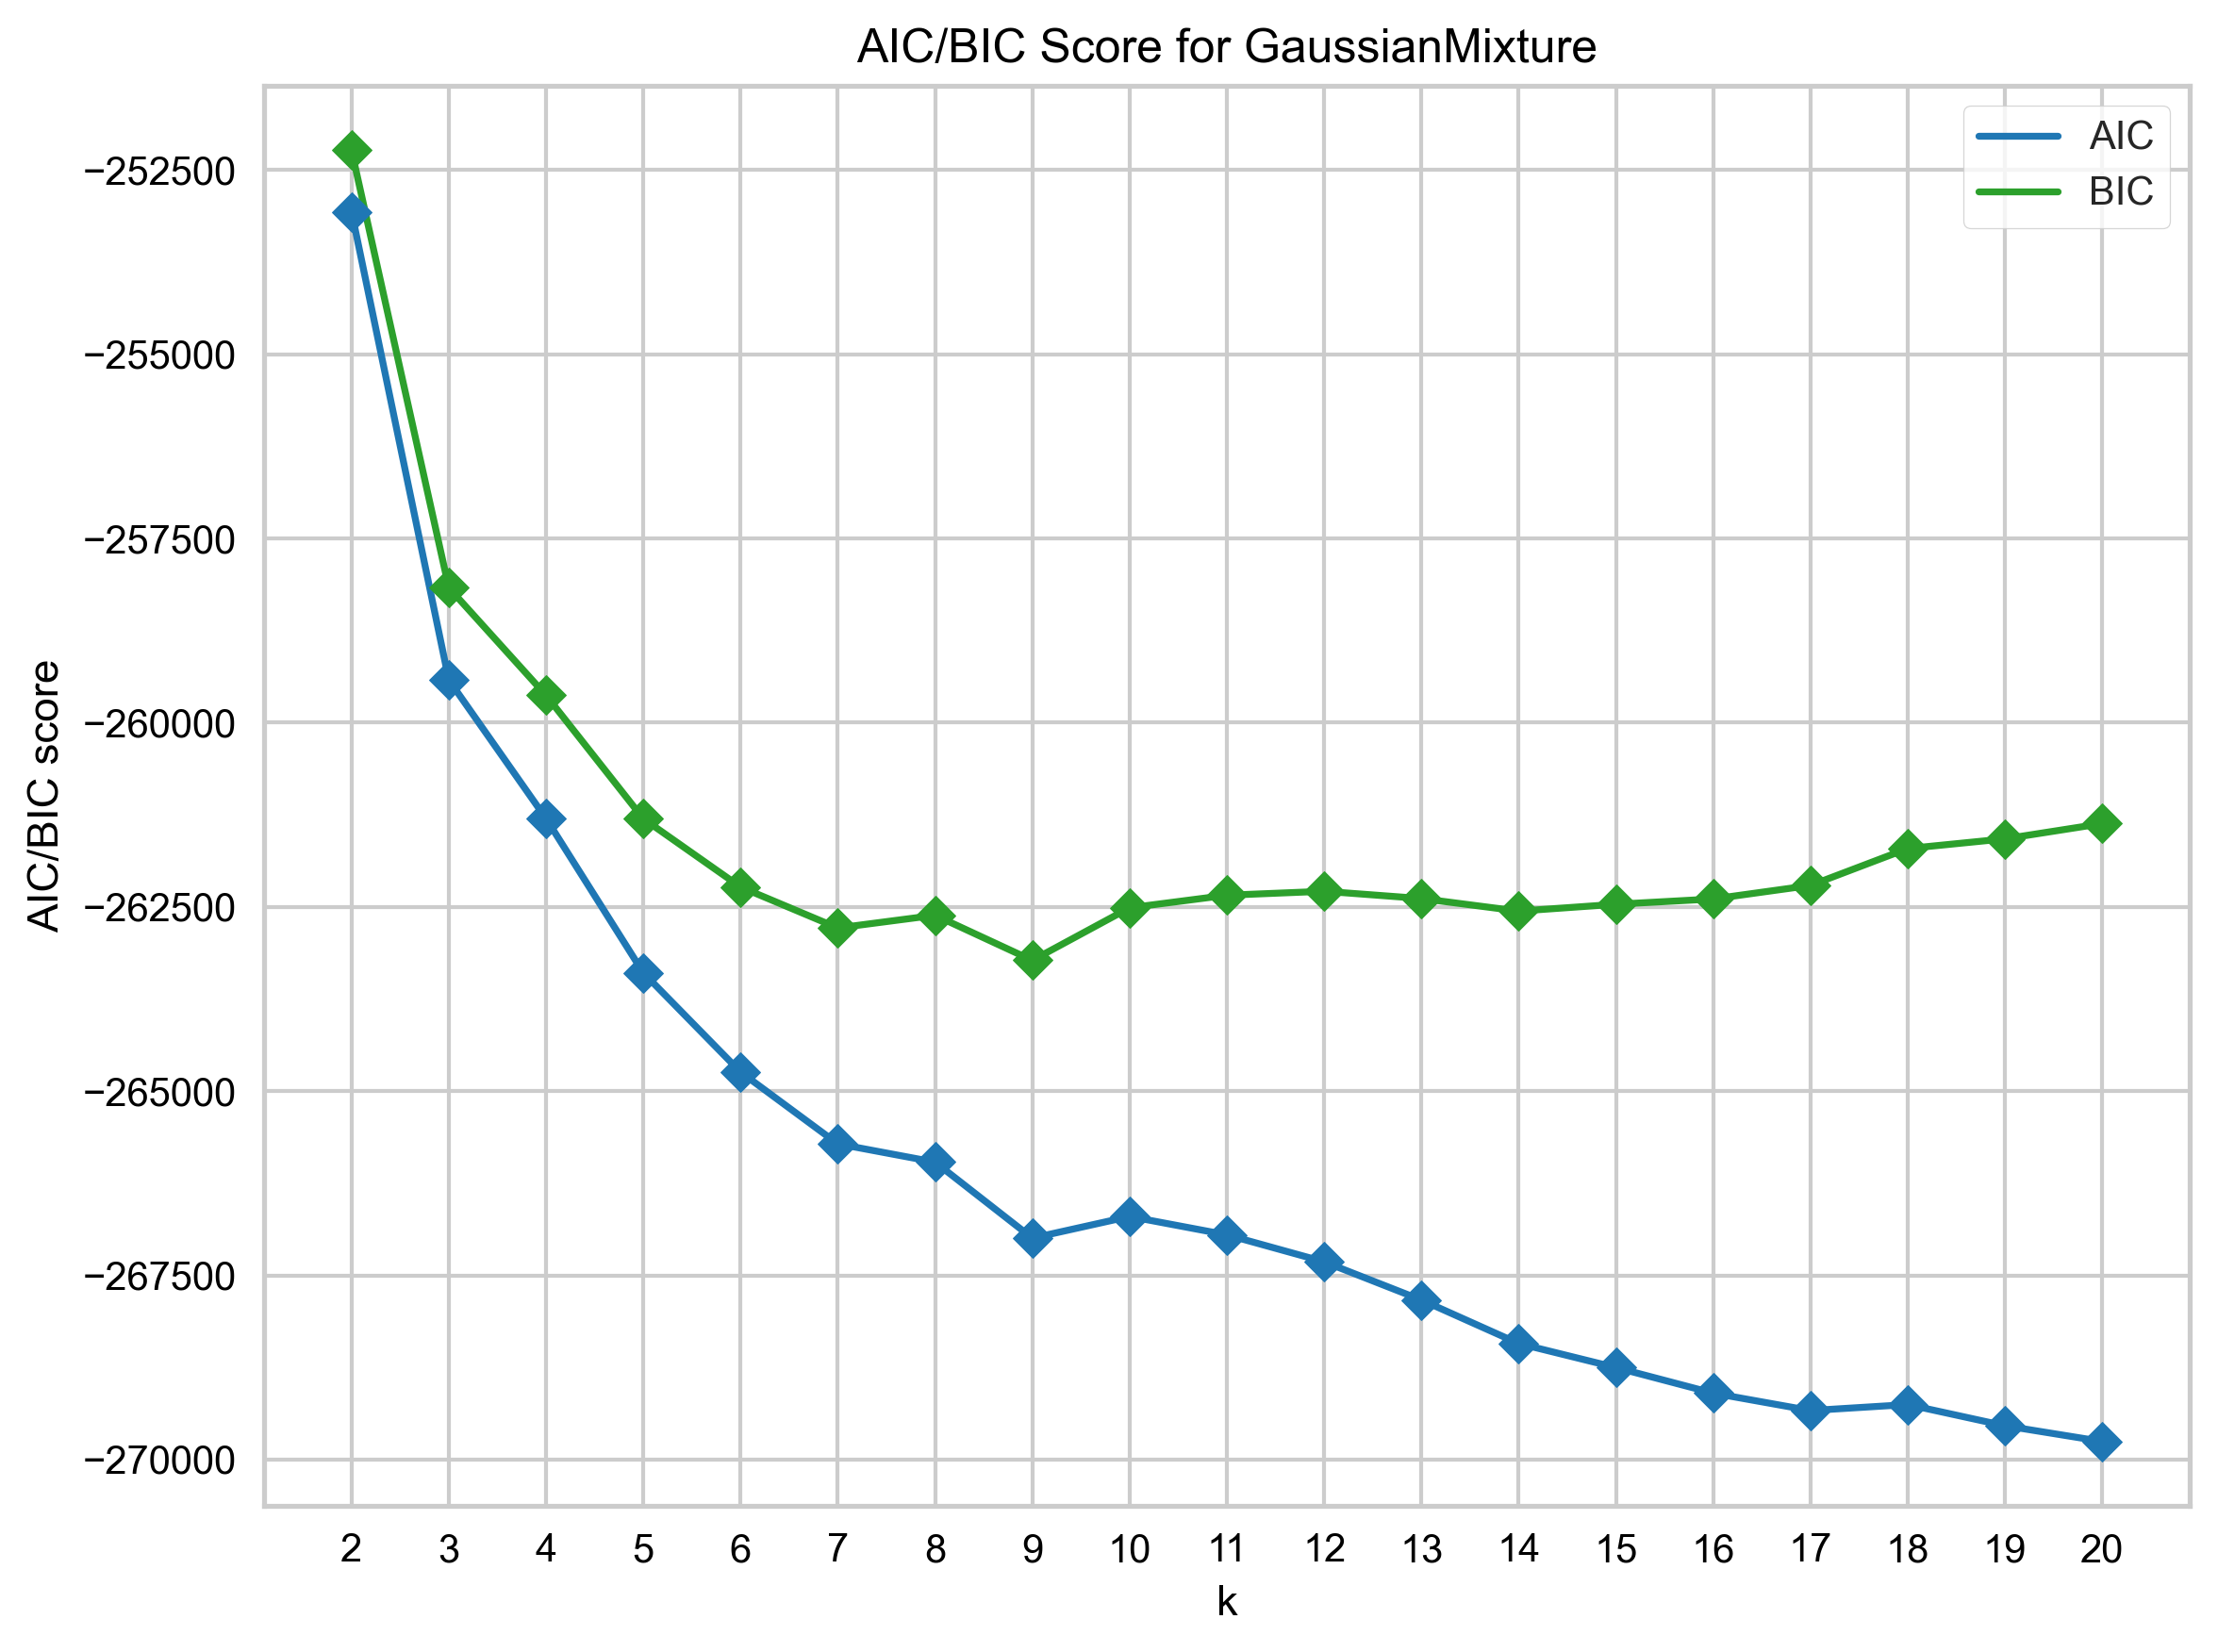

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


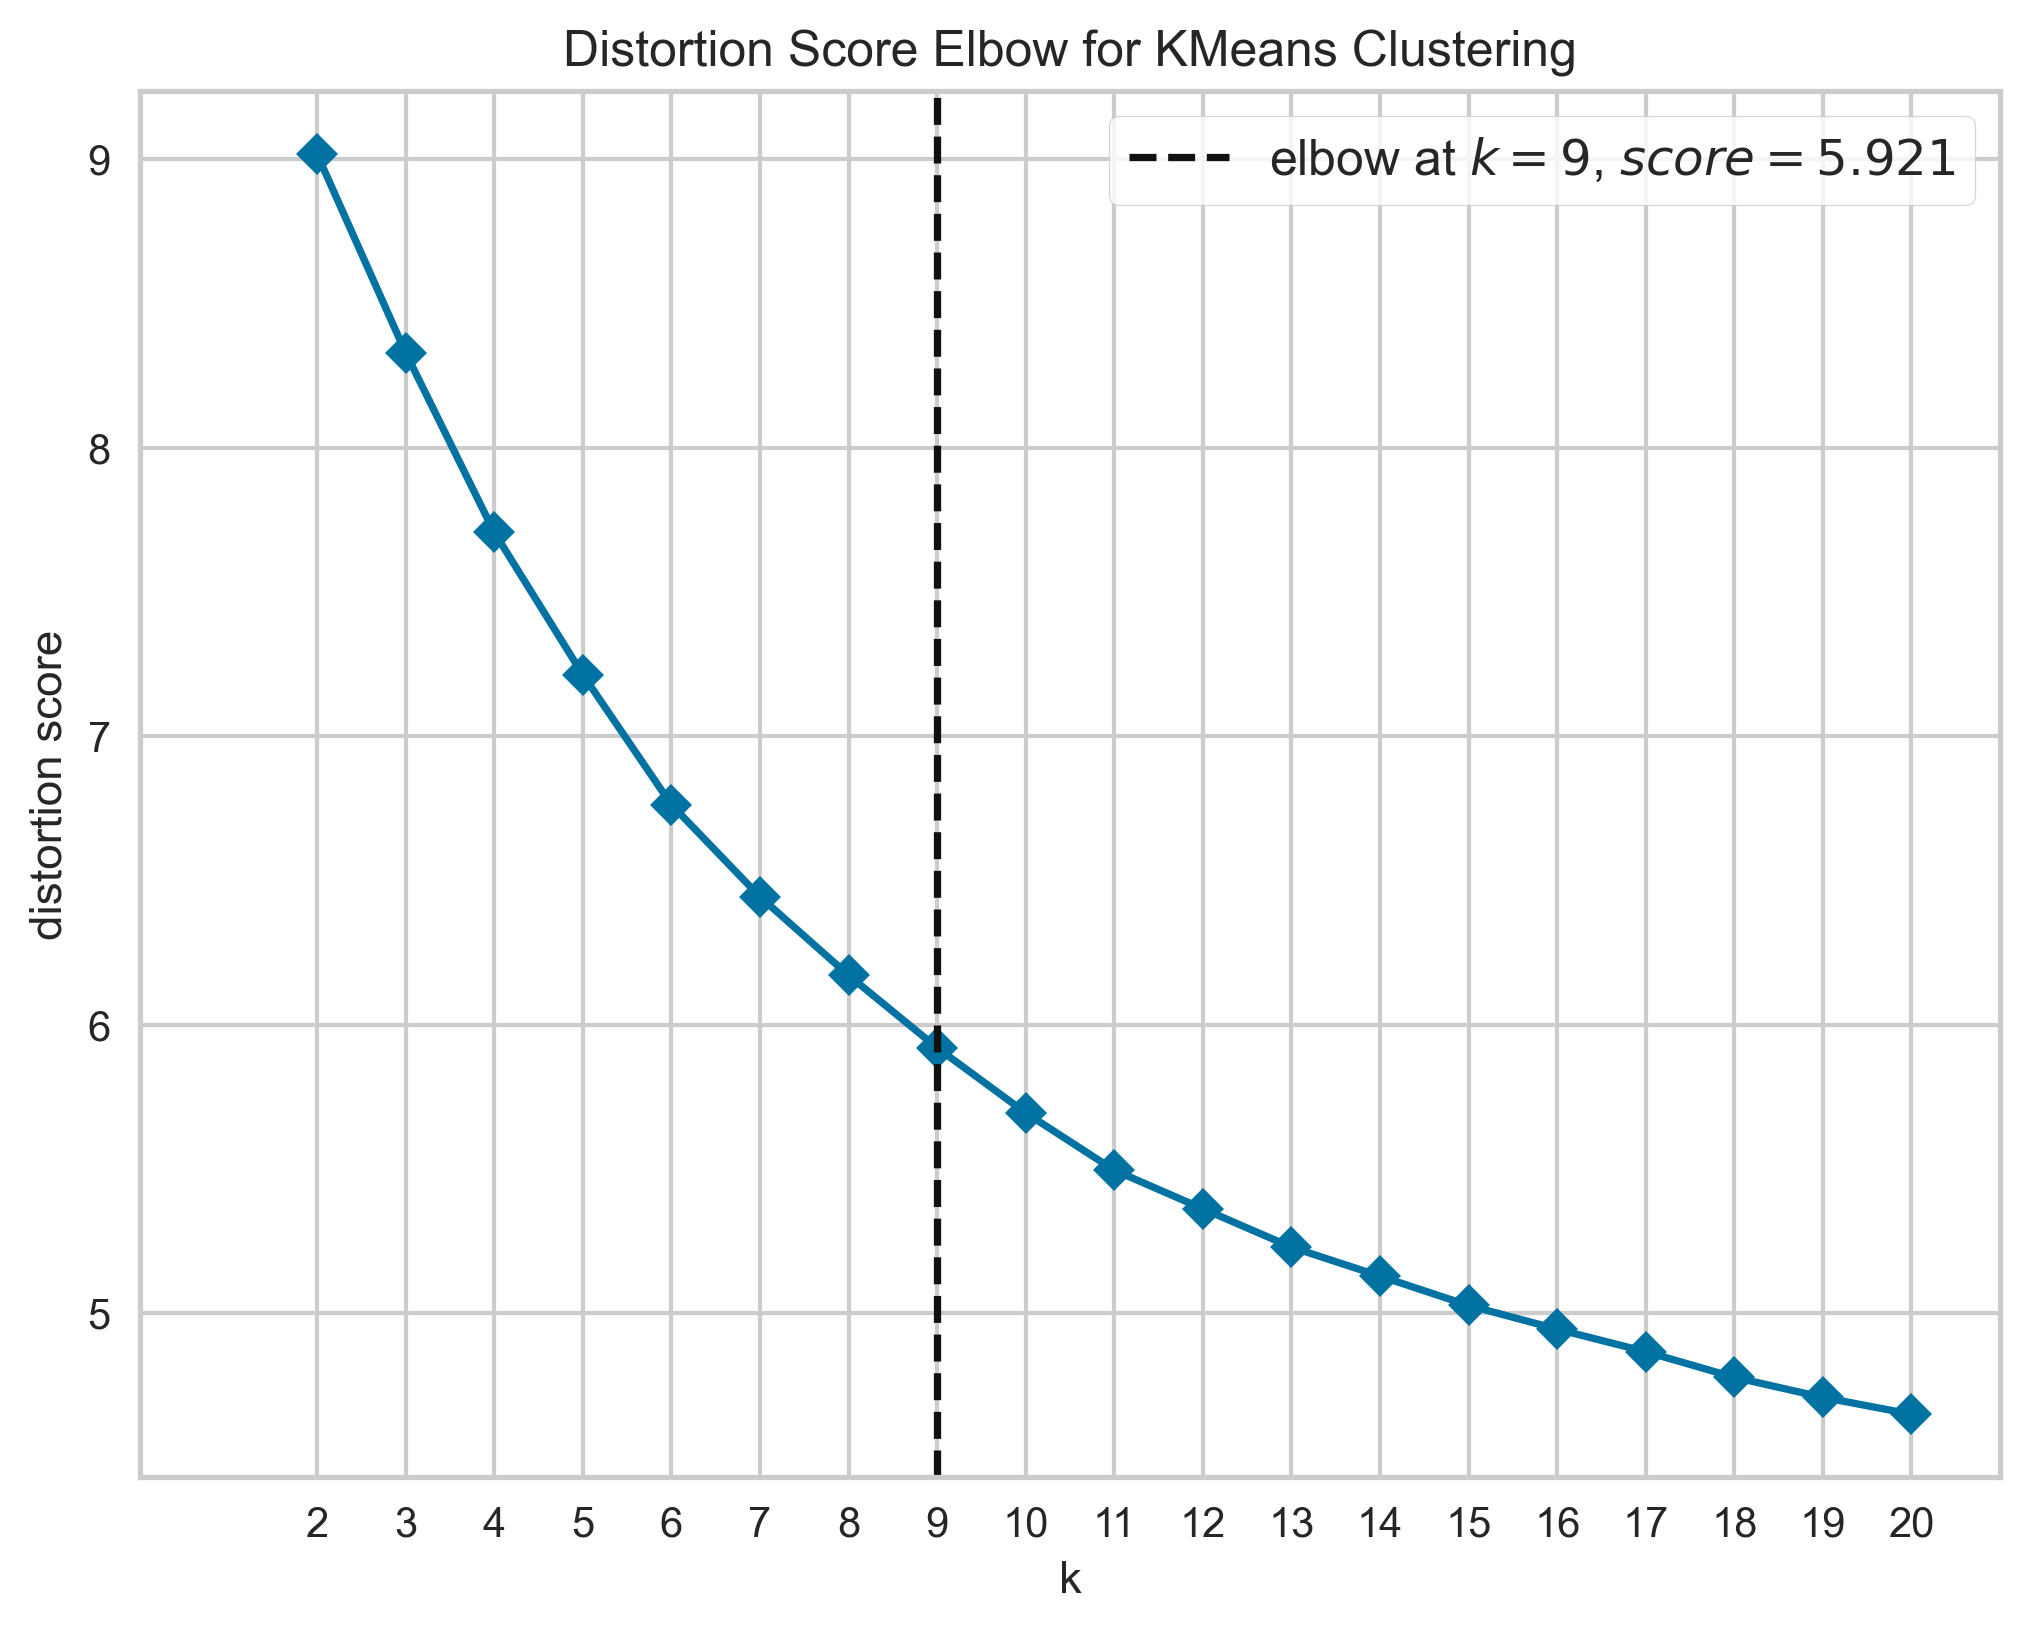

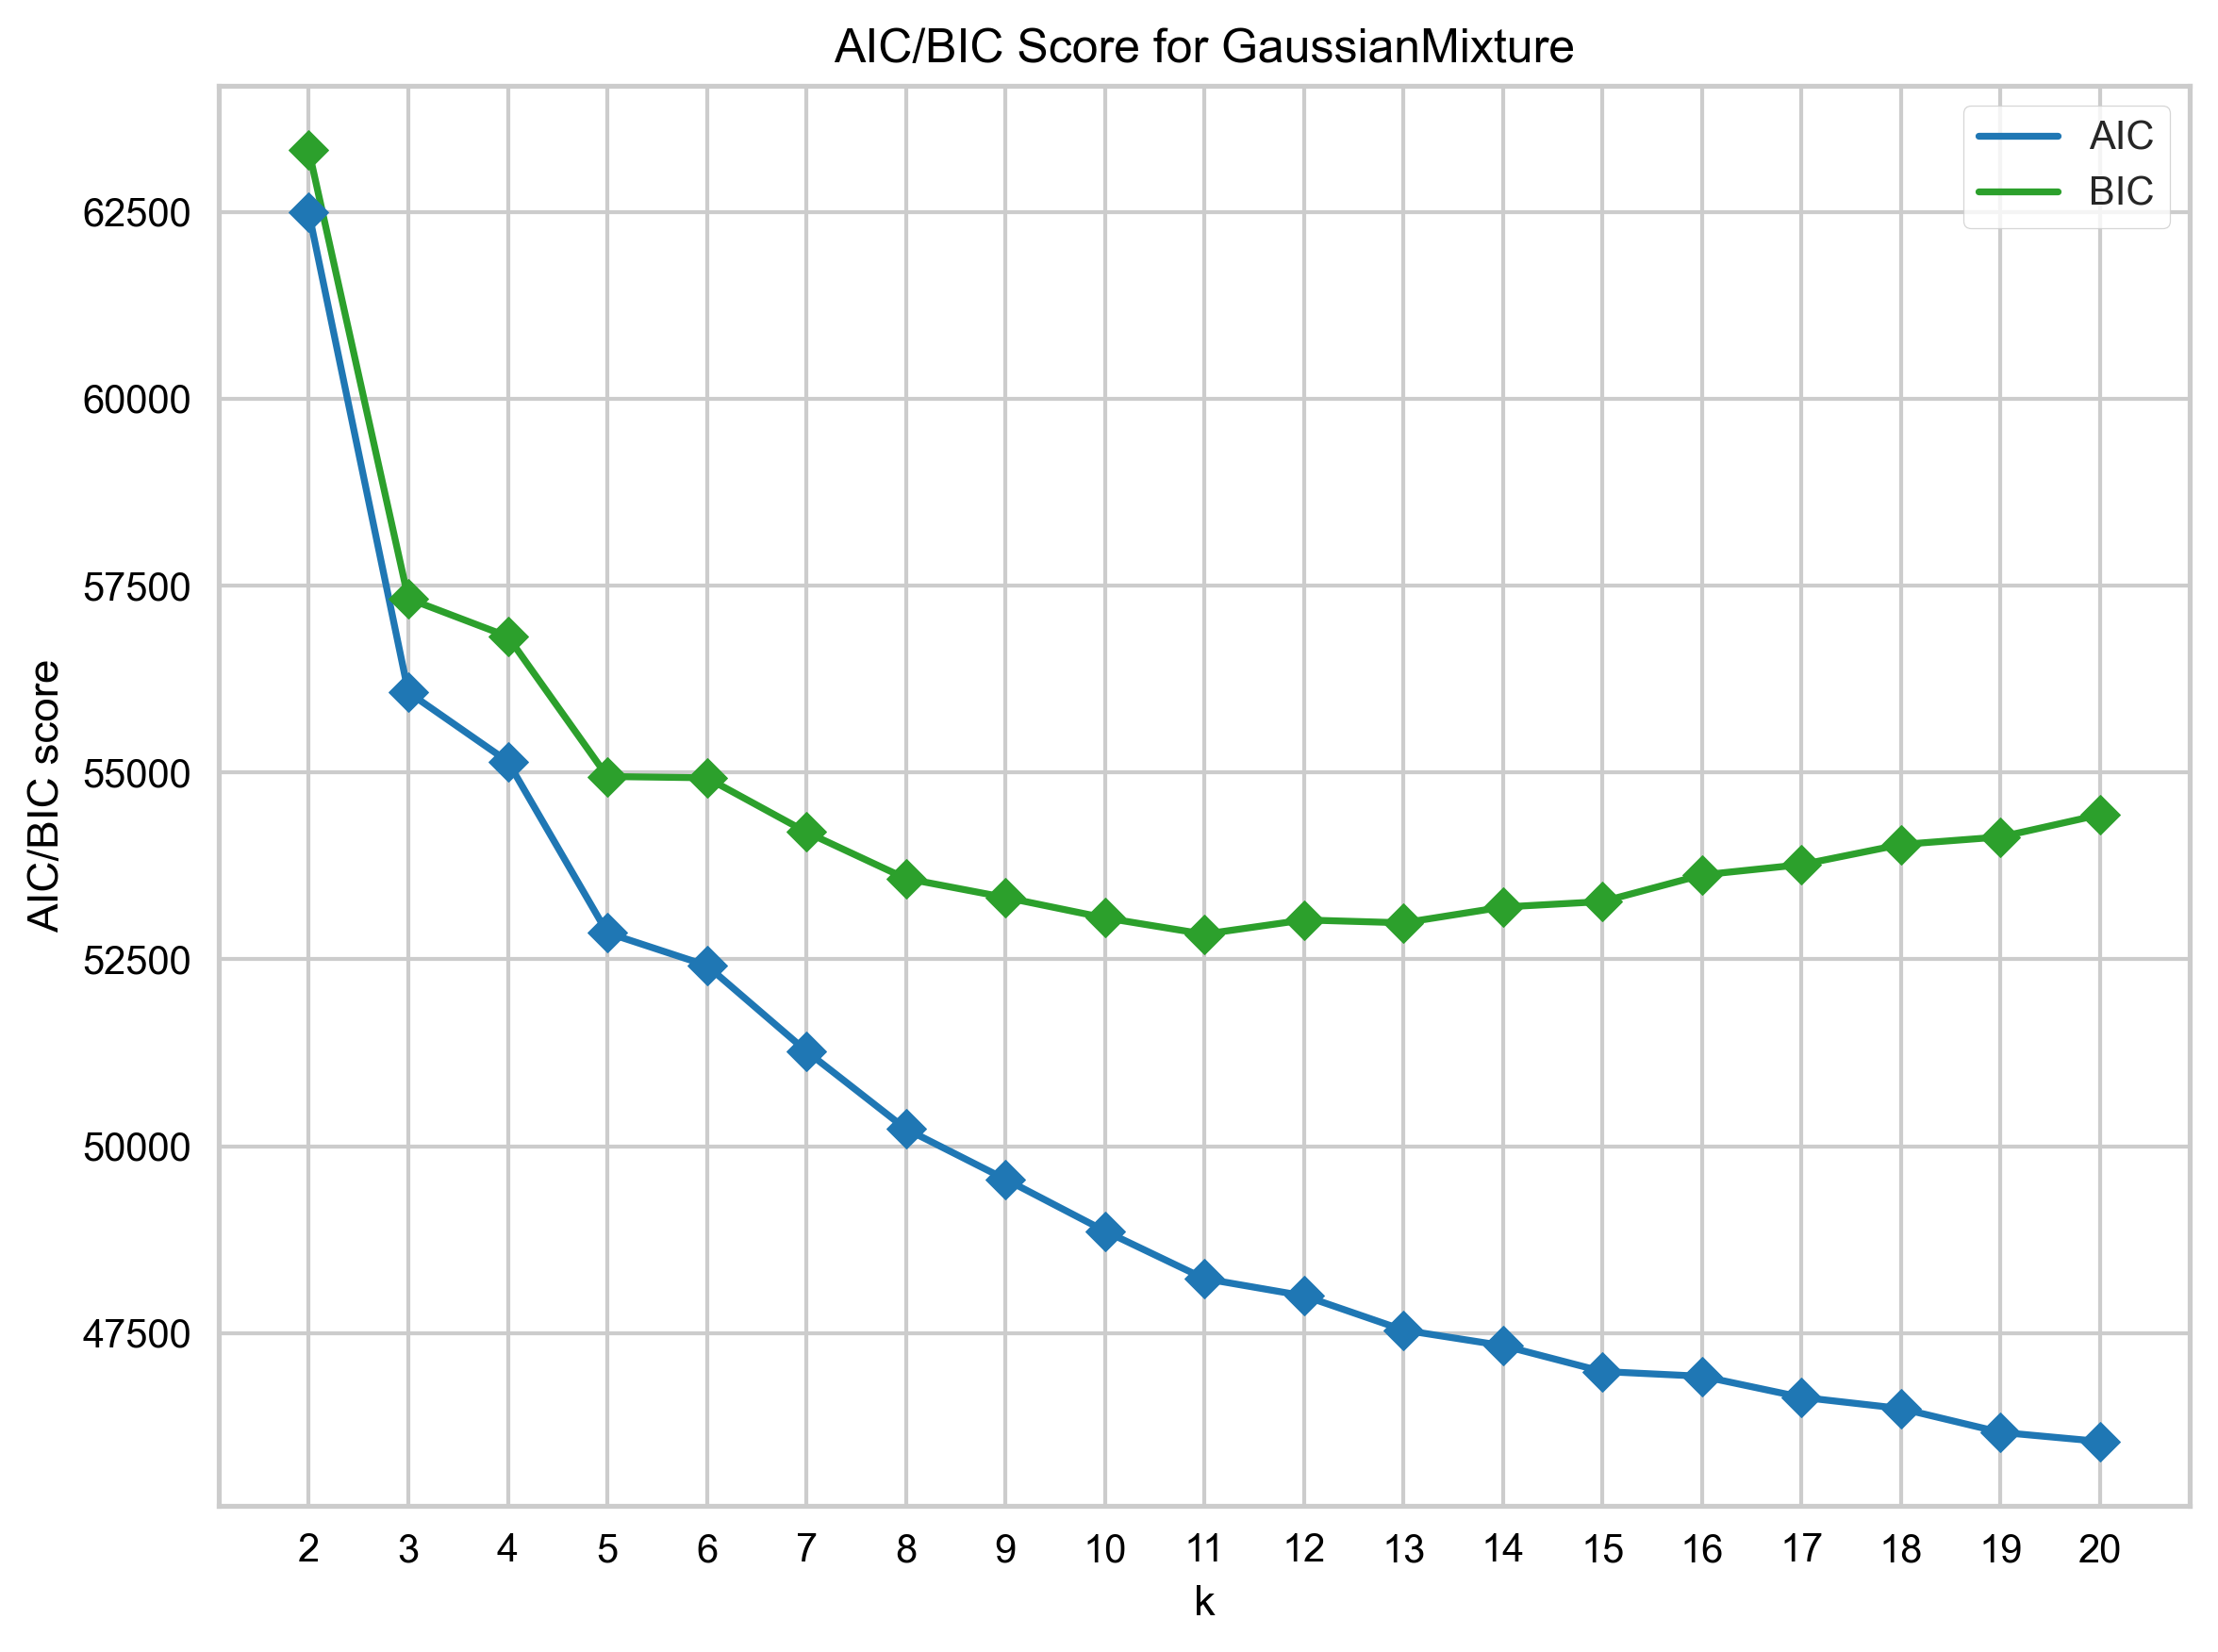

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


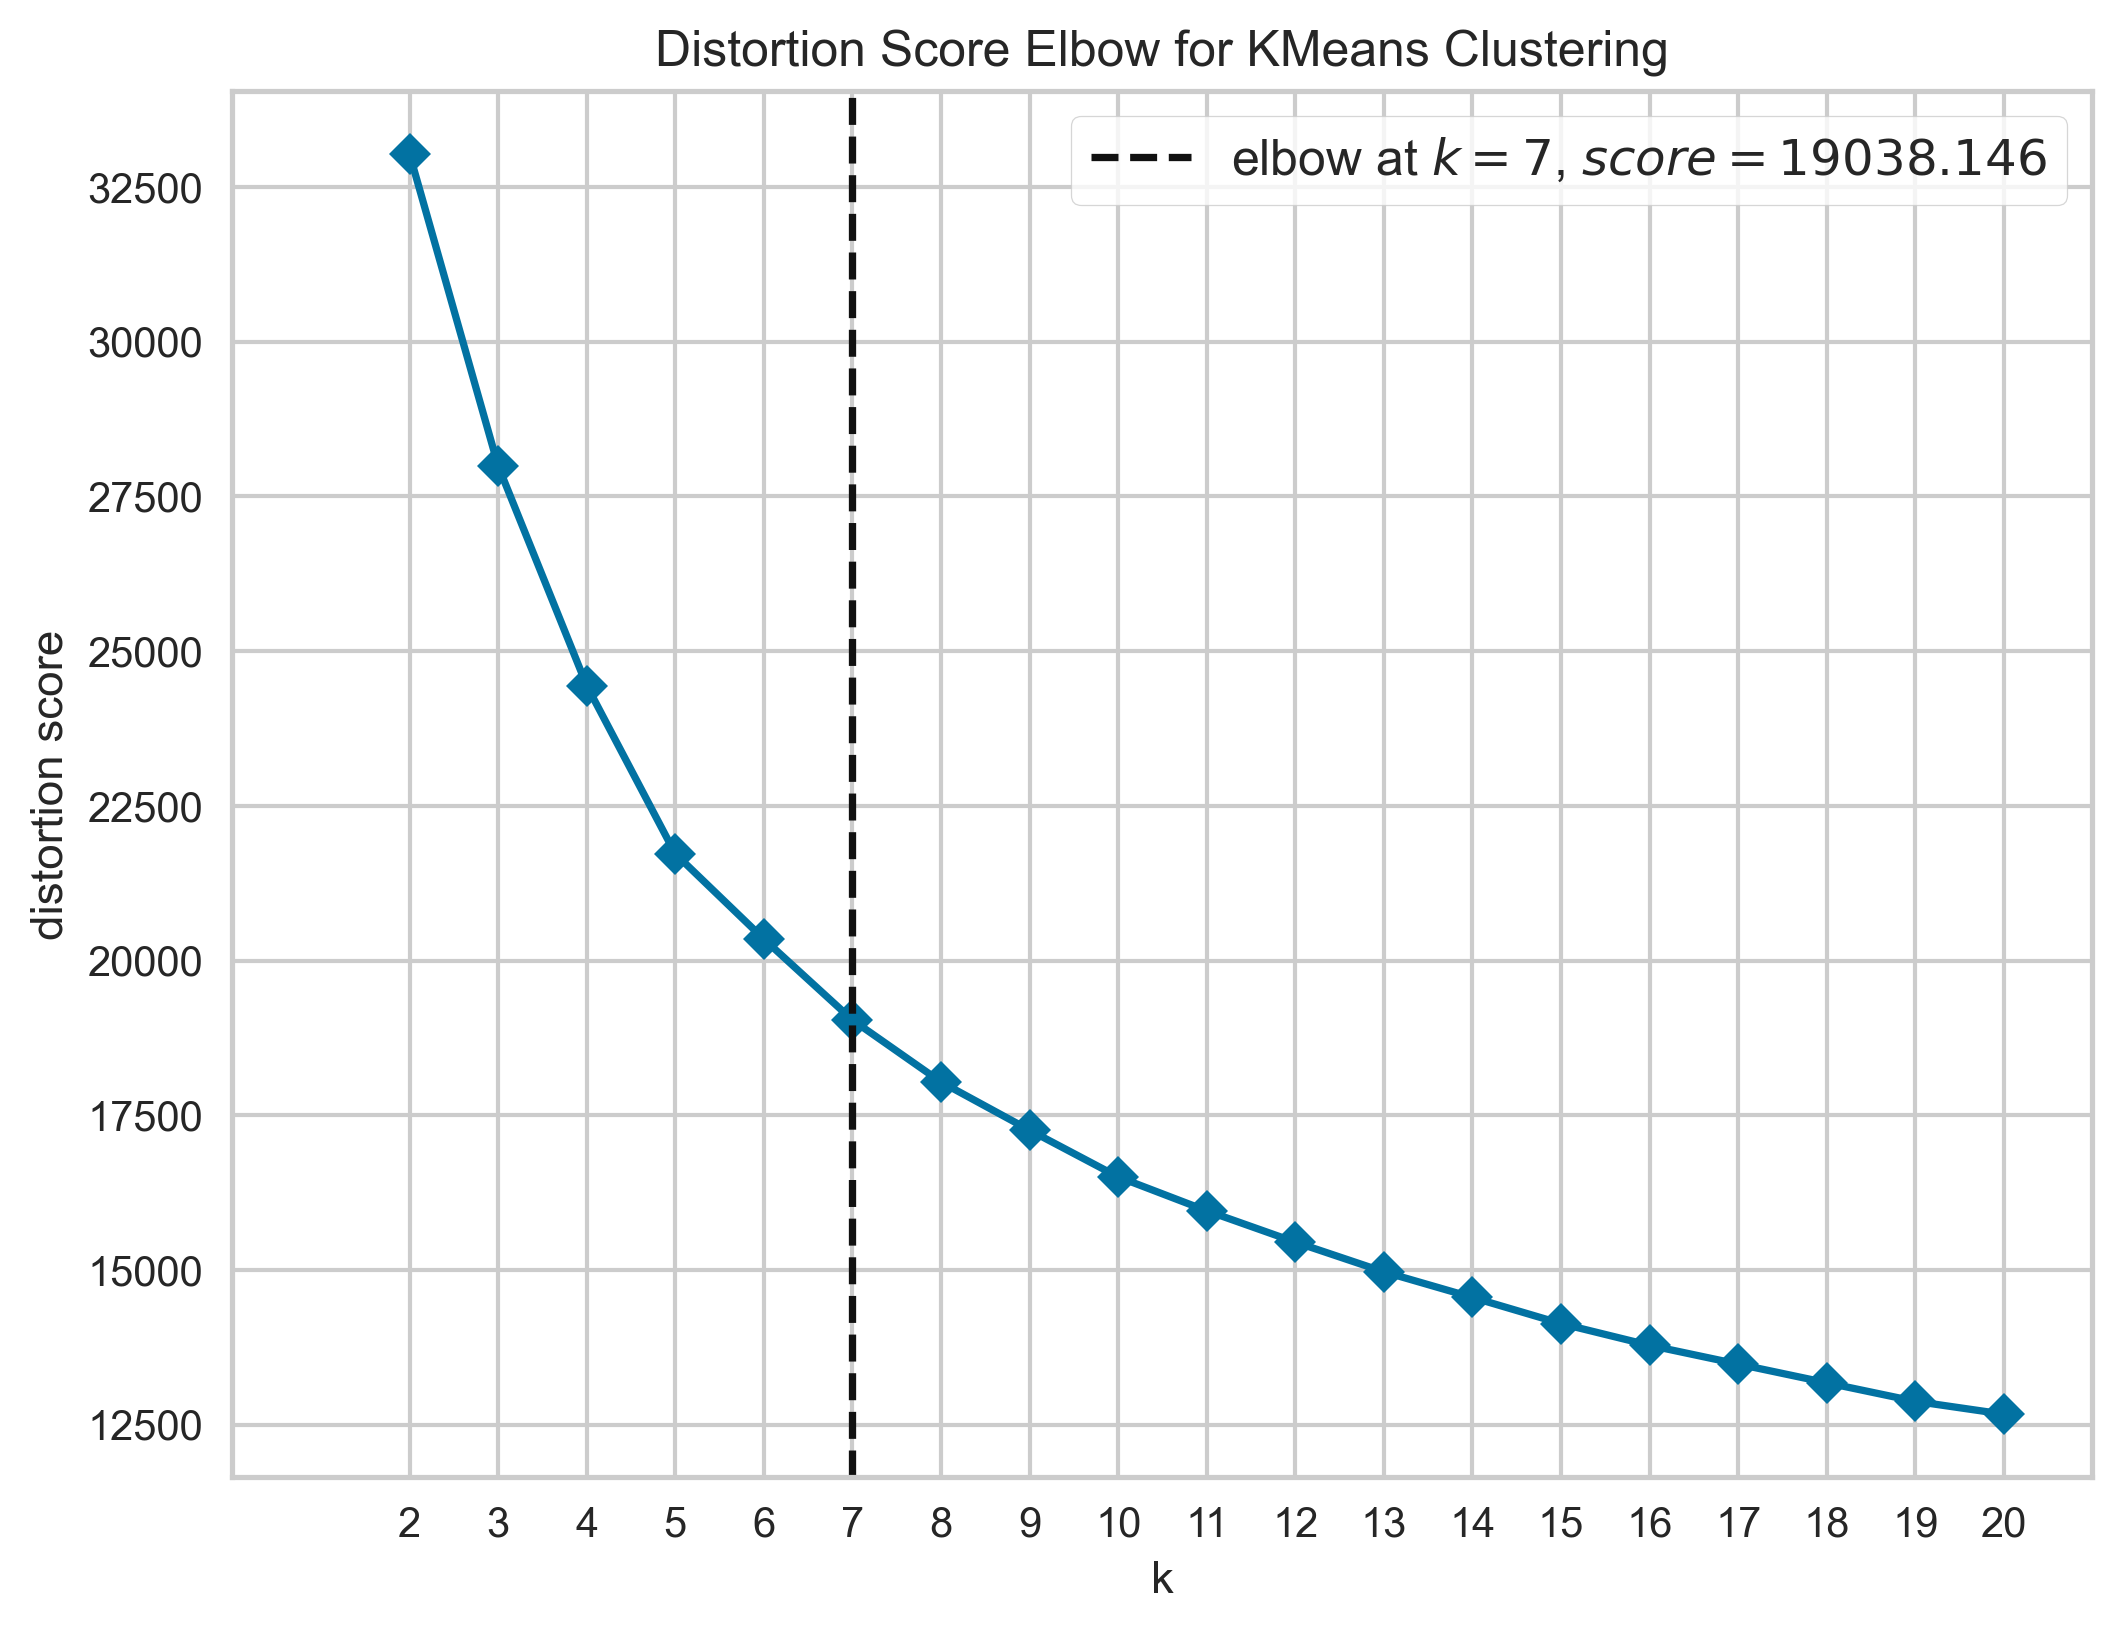

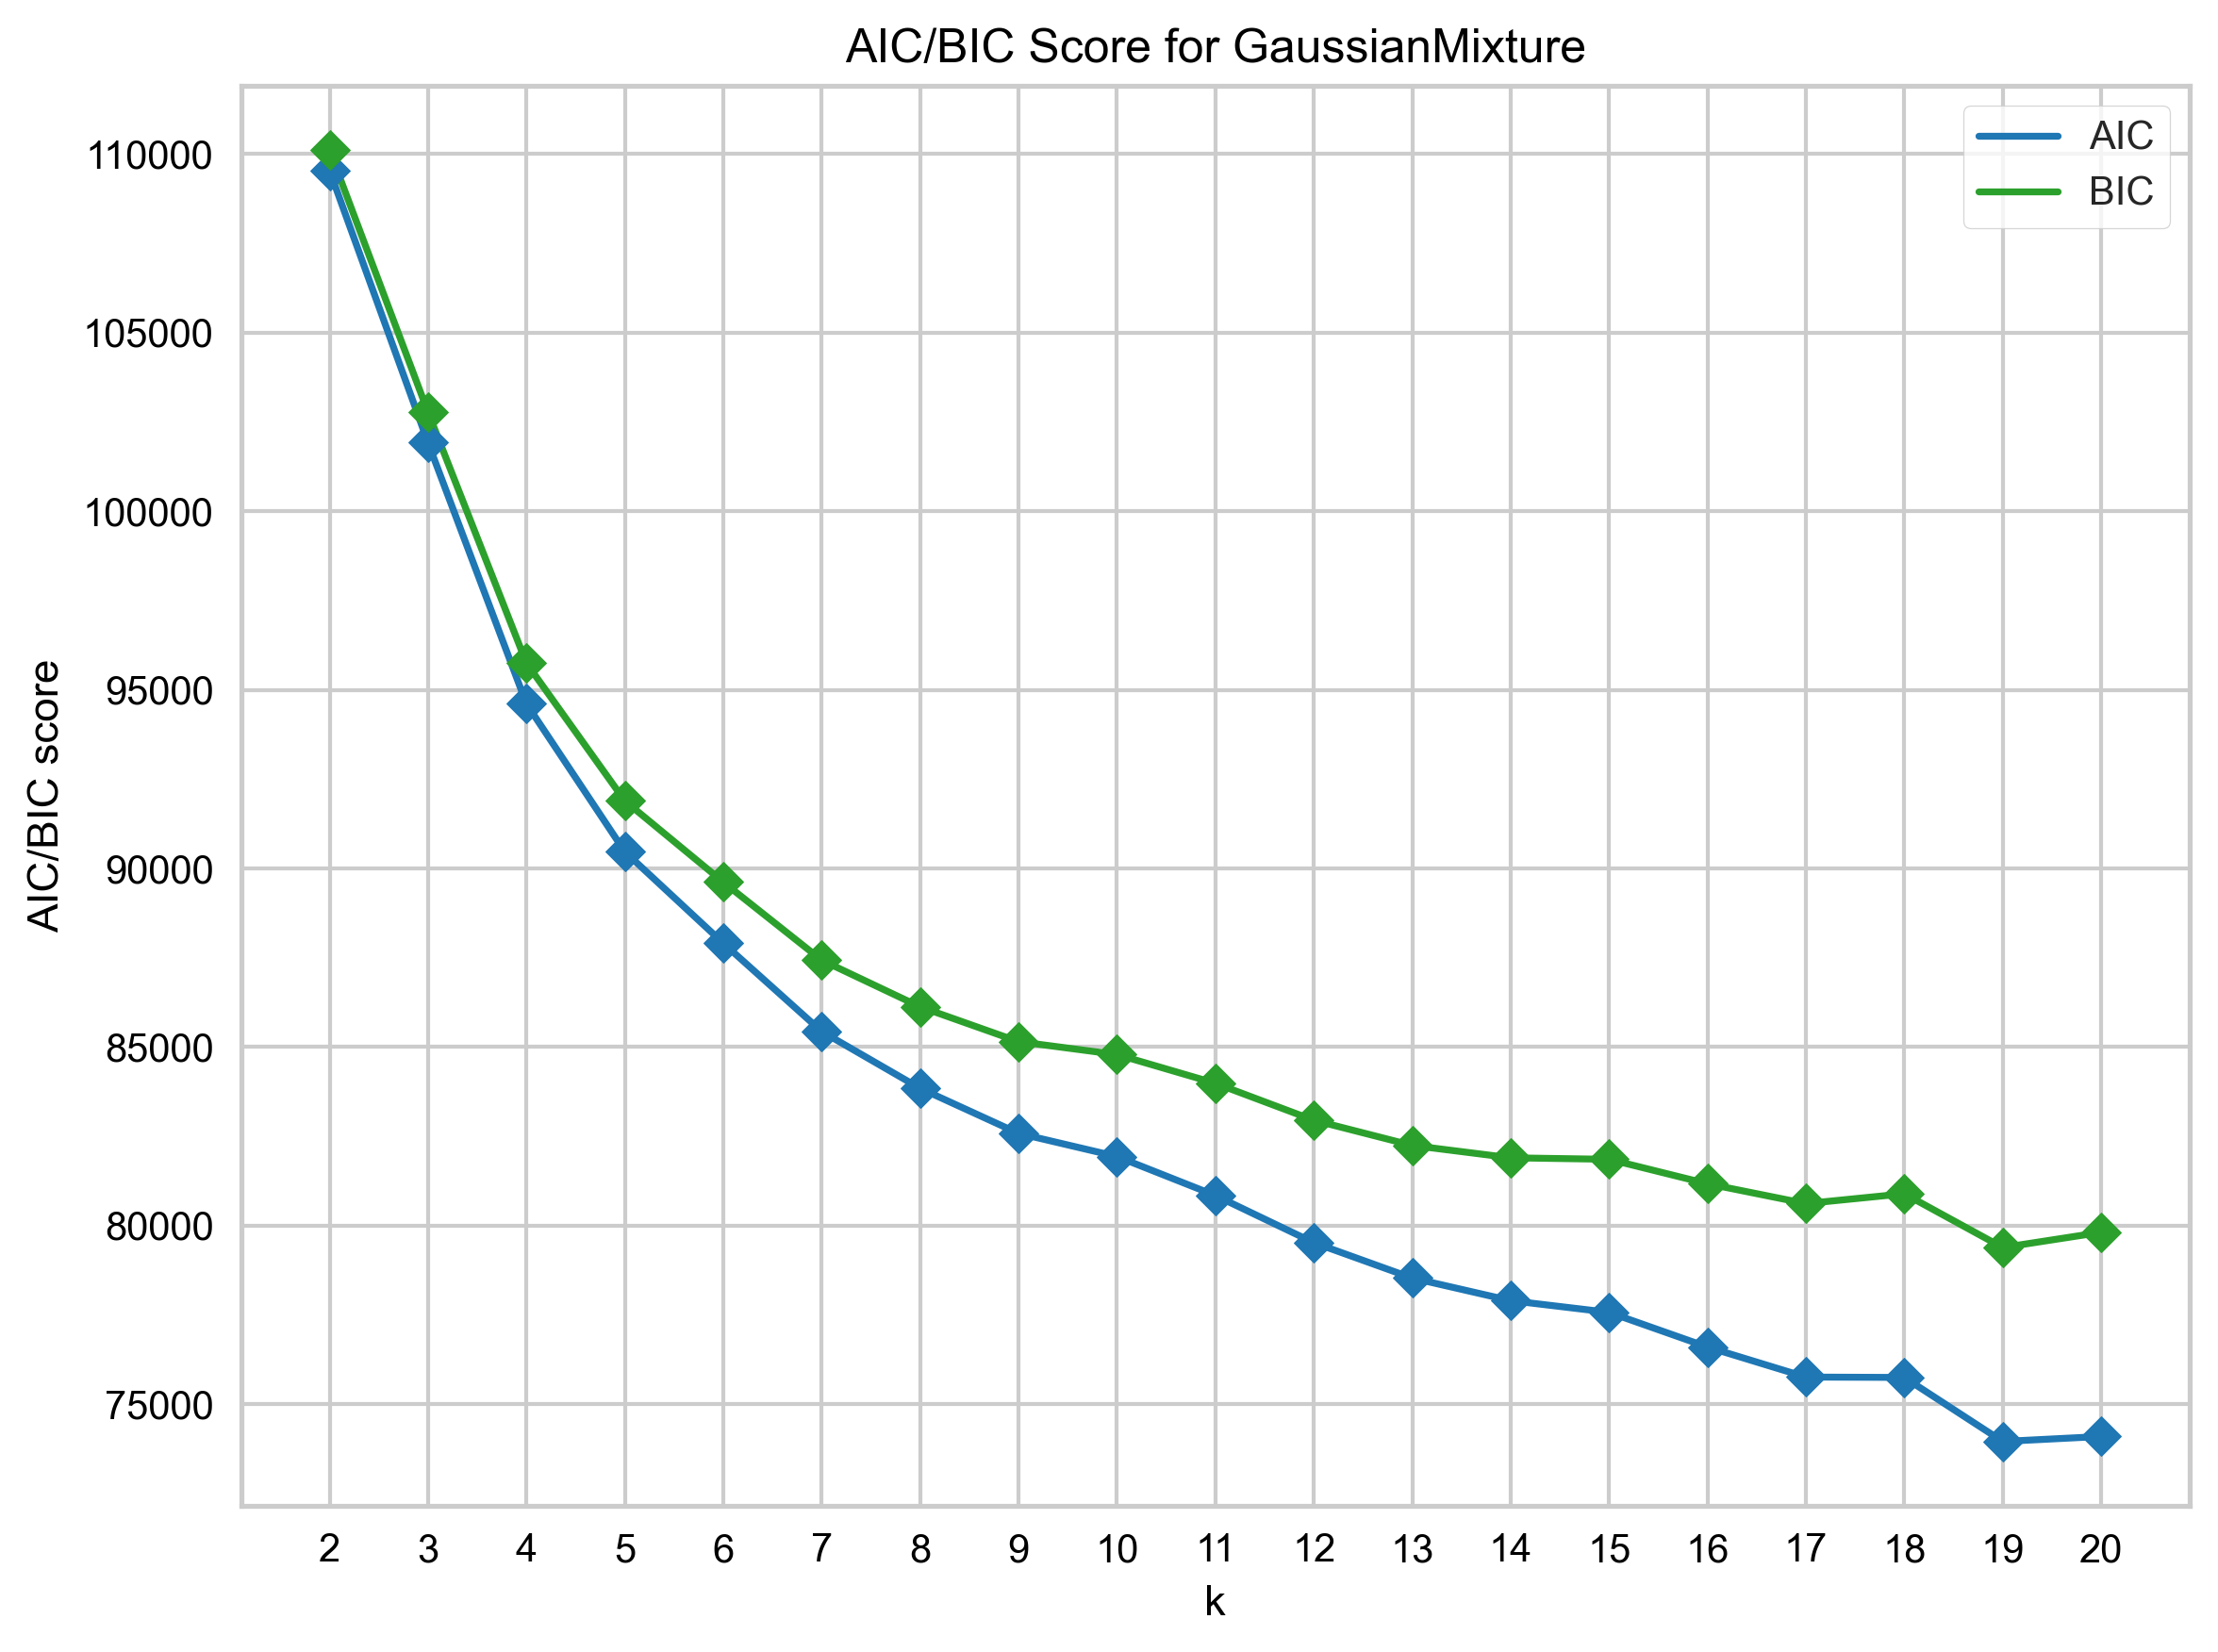

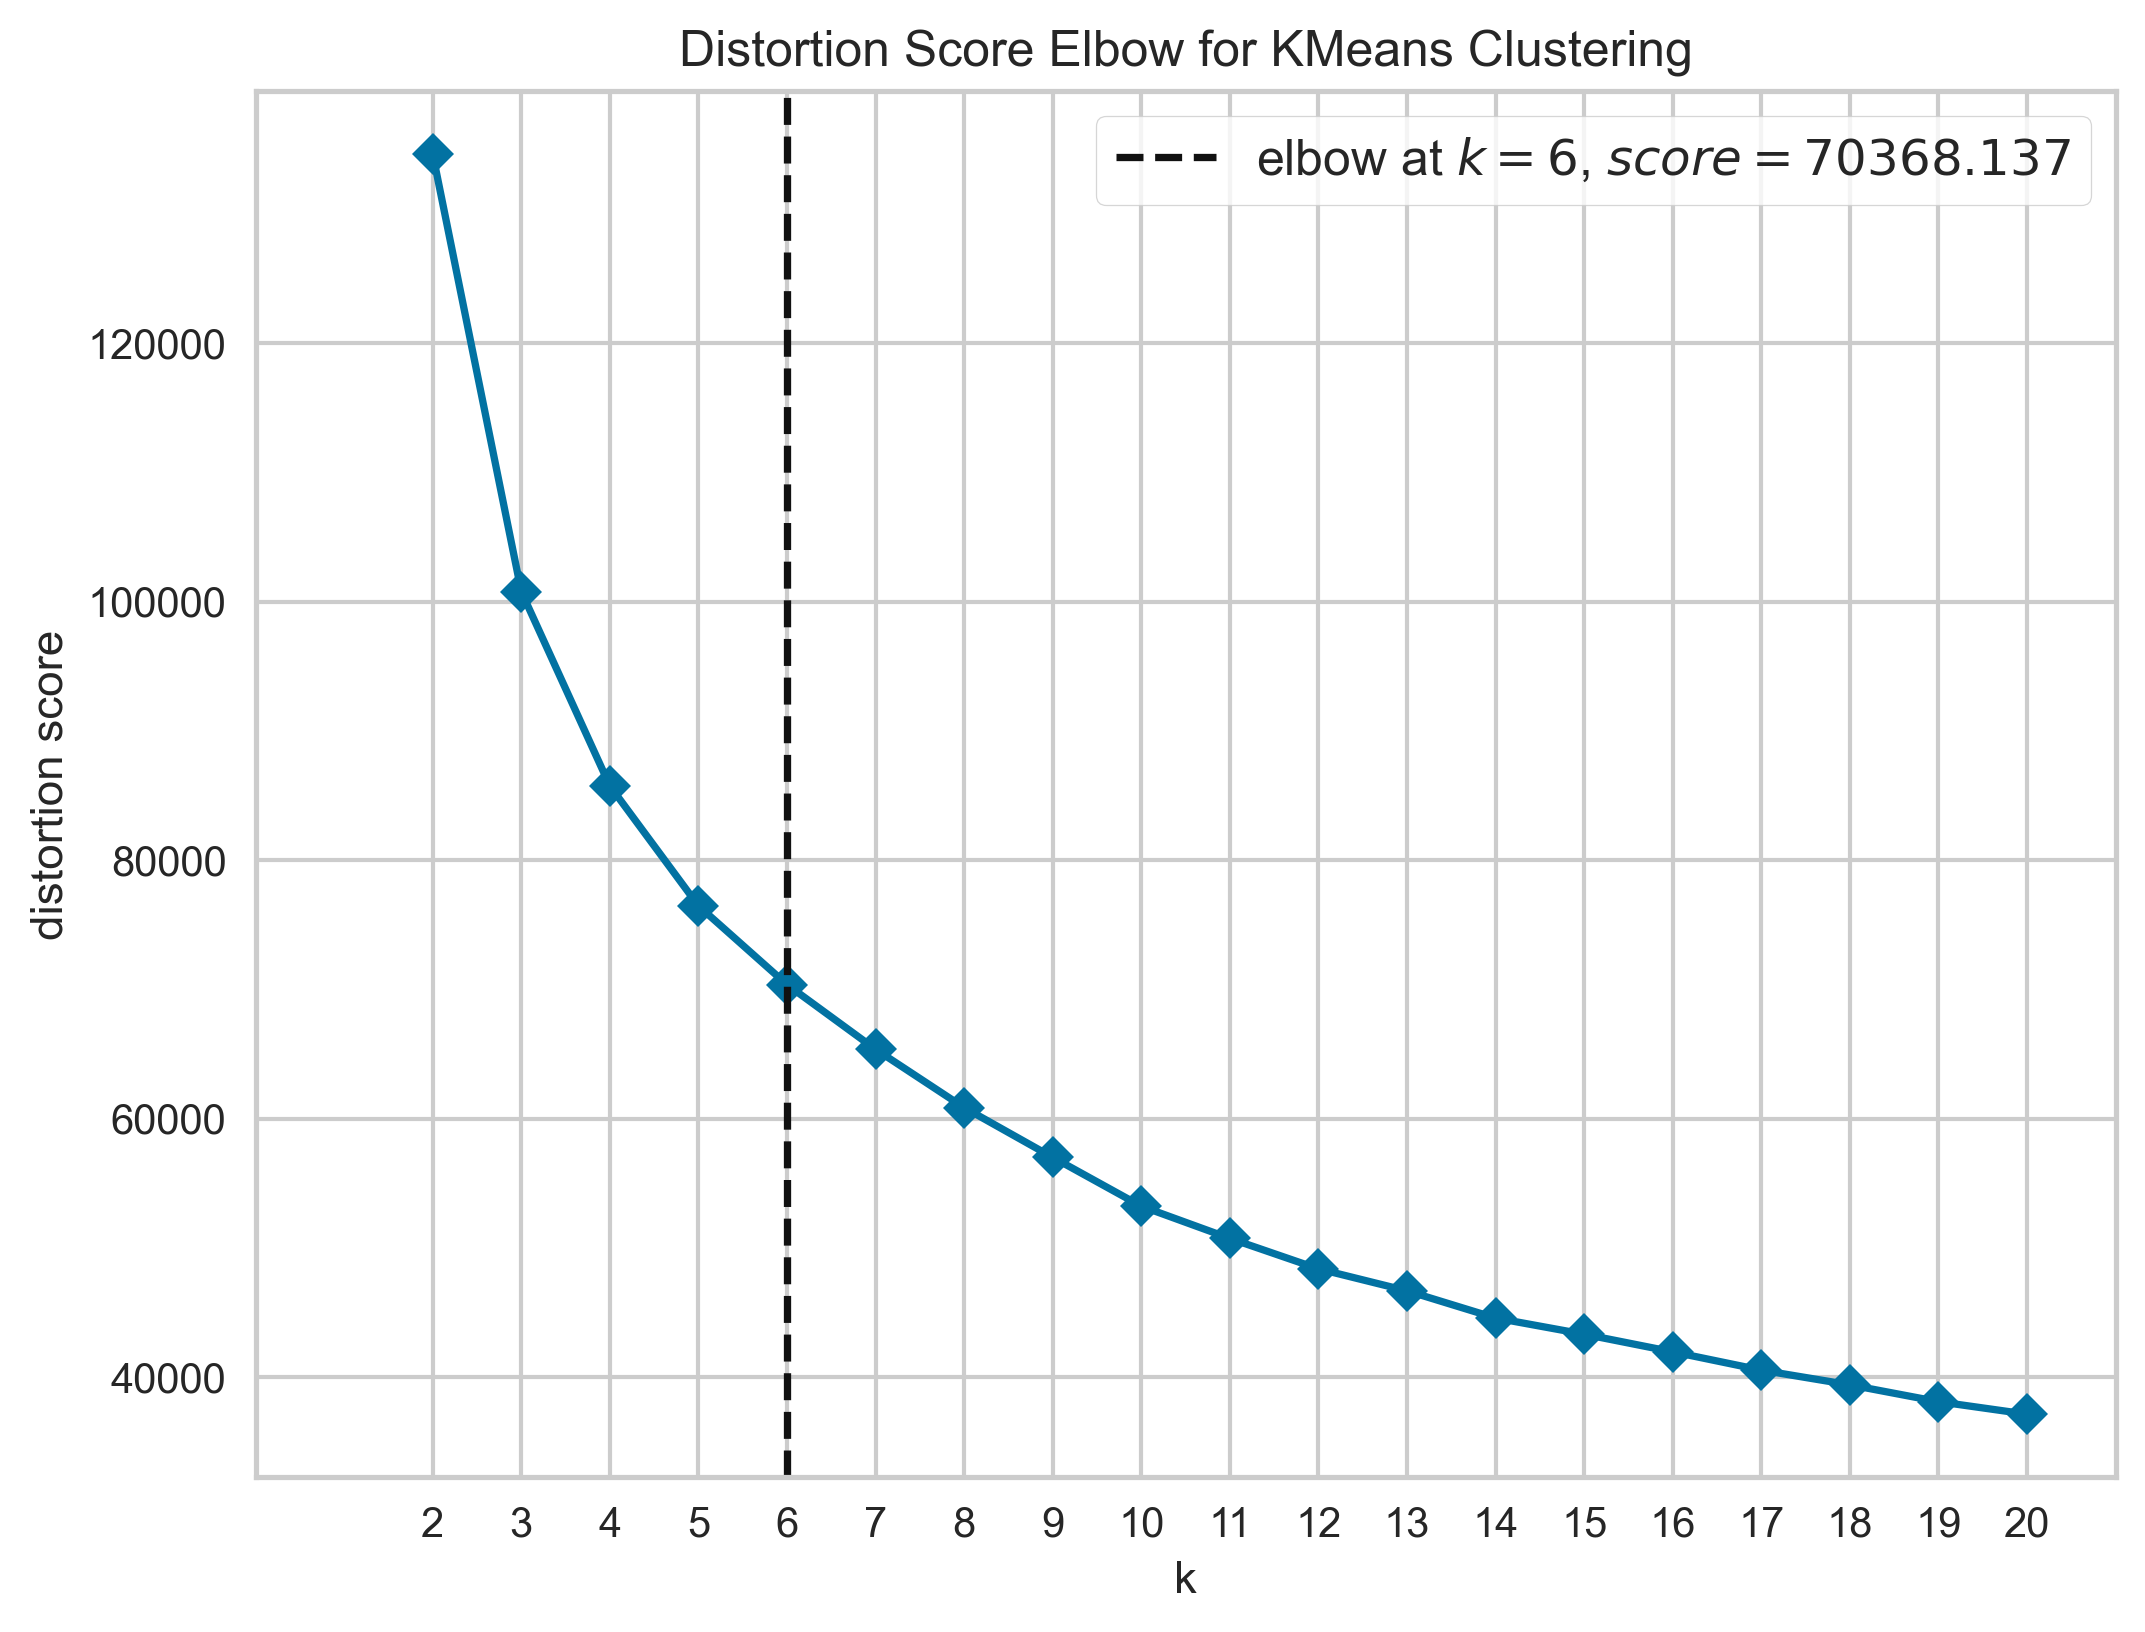

In [130]:
for projection in projections:
    short_name, name, transformer = projection
    X_train_transformed = transformer.fit_transform(X_train)

    charts.gmm_visualize_aic_bic(
        X_data=X_train_transformed,
        output_path=f"{STEP_3_PATH}/em_{short_name}_aic_bic.png",
        seed=SEED,
        k_max=20,
        n_init=10,
    )
    charts.k_means_visualize(
        X_data=X_train_transformed,
        output_path=f"{STEP_3_PATH}/k_means_{short_name}_distortion.png",
        seed=SEED,
        metric='distortion',
        locate_elbow=True
    )

In [140]:
importlib.reload(evals)

baseline_models = [
    ('Baseline, KMeans(k=7)', DummyTransformer(), KMeans(random_state=SEED, n_clusters=7)),
    ('Baseline, GMM(k=8)', DummyTransformer(), GaussianMixture(random_state=SEED, n_components=8, n_init=10)),
]

new_models = [
    ('PCA(n=8), KMeans(k=6)', PCA(n_components=8), KMeans(random_state=SEED, n_clusters=6)),
    ('PCA(n=8), GMM(k=14)', PCA(n_components=8), GaussianMixture(random_state=SEED, n_components=14, n_init=10)),

    ('ICA(n=10), KMeans(k=9)', FastICA(n_components=10), KMeans(random_state=SEED, n_clusters=9)),
    ('ICA(n=10), GMM(k=9)', FastICA(n_components=10), GaussianMixture(random_state=SEED, n_components=9, n_init=10)),

    ('RP(n=10), KMeans(k=7)', GaussianRandomProjection(n_components=10), KMeans(random_state=SEED, n_clusters=7)),
    ('RP(n=10), GMM(k=11)', GaussianRandomProjection(n_components=10),
     GaussianMixture(random_state=SEED, n_components=11, n_init=10)),

    ('Isomap(n=8), KMeans(k=6)', Isomap(n_components=8), KMeans(random_state=SEED, n_clusters=6)),
    ('Isomap(n=8), GMM(k=19)', Isomap(n_components=8), GaussianMixture(random_state=SEED, n_components=19, n_init=10)),
]

evals.evaluate_models_with_transformers(
    models=baseline_models + new_models,
    X_data=X_train,
    labels=y_train
)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Rand Index  V Measure  Mutual Information  \
Baseline, KMeans(k=7)    0    0.625605   0.060003            0.092530   
Baseline, GMM(k=8)       0    0.625141   0.063513            0.099790   
PCA(n=8), KMeans(k=6)    0    0.624920   0.058616            0.089494   
PCA(n=8), GMM(k=14)      0    0.648528   0.076618            0.141065   
ICA(n=10), KMeans(k=9)   0    0.636196   0.056540            0.095792   
ICA(n=10), GMM(k=9)      0    0.630880   0.062698            0.103191   
RP(n=10), KMeans(k=7)    0    0.629024   0.067891            0.106963   
RP(n=10), GMM(k=11)      0    0.637691   0.056693            0.098575   
Isomap(n=8), KMeans(k=6) 0    0.609530   0.059690            0.086342   
Isomap(n=8), GMM(k=19)   0    0.655683   0.063183            0.130106   

                            Fowlkes-Mallows index  
Baseline, KMeans(k=7)    0               0.262941  
Baseline, GMM(k=8)       0               0.269107  
PCA(n=8), KMeans(k=6)    0               0.264790  
PCA(n=8), GMM(k=14)      0               0.217982  
ICA(n=10), KMeans(k=9)   0               0.224844  
ICA(n=10), GMM(k=9)      0               0.247150  
RP(n=10), KMeans(k=7)    0               0.259199  
RP(n=10), GMM(k=11)      0               0.225928  
Isomap(n=8), KMeans(k=6) 0               0.293658  
Isomap(n=8), GMM(k=19)   0               0.161988

In [141]:
kmeans_baseline_clusters = KMeans(random_state=SEED, n_clusters=7).fit_predict(X_train)
gmm_baseline_clusters = GaussianMixture(random_state=SEED, n_components=8, n_init=10).fit_predict(X_train)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [142]:
# How new clusters are similar baseline KMeans
evals.evaluate_models_with_transformers(
    models=new_models,
    X_data=X_train,
    labels=kmeans_baseline_clusters
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Rand Index  V Measure  Mutual Information  \
PCA(n=8), KMeans(k=6)    0    0.962991   0.872985            1.557010   
PCA(n=8), GMM(k=14)      0    0.835283   0.482477            1.012181   
ICA(n=10), KMeans(k=9)   0    0.856166   0.526833            1.027843   
ICA(n=10), GMM(k=9)      0    0.821732   0.488231            0.928907   
RP(n=10), KMeans(k=7)    0    0.811588   0.430323            0.800068   
RP(n=10), GMM(k=11)      0    0.795287   0.438526            0.847829   
Isomap(n=8), KMeans(k=6) 0    0.851508   0.634159            1.080130   
Isomap(n=8), GMM(k=19)   0    0.839417   0.480075            1.111828   

                            Fowlkes-Mallows index  
PCA(n=8), KMeans(k=6)    0               0.892830  
PCA(n=8), GMM(k=14)      0               0.415456  
ICA(n=10), KMeans(k=9)   0               0.525716  
ICA(n=10), GMM(k=9)      0               0.449108  
RP(n=10), KMeans(k=7)    0               0.414779  
RP(n=10), GMM(k=11)      0               0.373463  
Isomap(n=8), KMeans(k=6) 0               0.626412  
Isomap(n=8), GMM(k=19)   0               0.355976

In [143]:
evals.evaluate_models_with_transformers(
    models=new_models,
    X_data=X_train,
    labels=gmm_baseline_clusters,
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Rand Index  V Measure  Mutual Information  \
PCA(n=8), KMeans(k=6)    0    0.818376   0.490265            0.888663   
PCA(n=8), GMM(k=14)      0    0.864131   0.592572            1.260375   
ICA(n=10), KMeans(k=9)   0    0.823884   0.454347            0.899632   
ICA(n=10), GMM(k=9)      0    0.892078   0.680846            1.315169   
RP(n=10), KMeans(k=7)    0    0.799923   0.445807            0.820211   
RP(n=10), GMM(k=11)      0    0.843468   0.555326            1.123467   
Isomap(n=8), KMeans(k=6) 0    0.822609   0.554610            0.960762   
Isomap(n=8), GMM(k=19)   0    0.834094   0.469626            1.101282   

                            Fowlkes-Mallows index  
PCA(n=8), KMeans(k=6)    0               0.482020  
PCA(n=8), GMM(k=14)      0               0.534948  
ICA(n=10), KMeans(k=9)   0               0.428362  
ICA(n=10), GMM(k=9)      0               0.673410  
RP(n=10), KMeans(k=7)    0               0.422330  
RP(n=10), GMM(k=11)      0               0.486350  
Isomap(n=8), KMeans(k=6) 0               0.557280  
Isomap(n=8), GMM(k=19)   0               0.350741

In [ ]:
# Let's look at GMM Isomap, because we got soooo many clusters
# Let's look at ICA KMeans, because it is the only KMeans combination that generated more clusters than the baseline.
# If we really-really need some other stuff, then let's plot silhouette scores for KMeans algo, t-SNE/Isomap visualization, etc.

# Step 4